# Compparing CIAA and DCFS

# Straightforward

In [268]:
import pandas as pd, networkx as nx, csv, matplotlib.pyplot as plt, community, matplotlib.cm as cm

ciaa = pd.read_csv('../data/cleaned/CIAA-CIAA_m2.csv', sep=';')
dcfs = pd.read_csv('../data/cleaned/DCFS-DCFS_m2.csv', sep=';')

# Only use data prior 2022
ciaa = ciaa.loc[ciaa['Year']<2022]
dcfs = dcfs.loc[dcfs['Year']<2022]

ciaa_author_dict = pd.read_csv('../data/processed/CIAA-authors.csv', sep=';')
dcfs_author_dict = pd.read_csv('../data/processed/DCFS-authors.csv', sep=';')

ciaa_author_dict2 = {ciaa_author_dict['URL'].to_list()[i]: ciaa_author_dict['Key'].to_list()[i] for i in range(len(ciaa_author_dict['URL'].to_list()))}
dcfs_author_dict2 = {dcfs_author_dict['URL'].to_list()[i]: dcfs_author_dict['Key'].to_list()[i] for i in range(len(dcfs_author_dict['URL'].to_list()))}

ciaa_author_dict = {ciaa_author_dict['URL'].to_list()[i]: ciaa_author_dict['Name'].to_list()[i] for i in range(len(ciaa_author_dict['URL'].to_list()))}
dcfs_author_dict = {dcfs_author_dict['URL'].to_list()[i]: dcfs_author_dict['Name'].to_list()[i] for i in range(len(dcfs_author_dict['URL'].to_list()))}

ciaa_authors = ciaa['Author'].to_list()
ciaa_co_authors = ciaa['Co-Authors'].to_list()
dcfs_authors = dcfs['Author'].to_list()
dcfs_co_authors = dcfs['Co-Authors'].to_list()

ciaa_co_author_list = []
for l in ciaa_co_authors:
    l = l.replace('[','').replace(']','').replace('"','').replace("'",'') 
    l = l.split(', ')
    ciaa_co_author_list.append(l)

dcfs_co_author_list = []
for l in dcfs_co_authors:
    l = l.replace('[','').replace(']','').replace('"','').replace("'",'') 
    l = l.split(', ')
    dcfs_co_author_list.append(l)

G = nx.Graph() #CIAA graph
H = nx.Graph() #DCFS graph

def list_to_csv(data_list, file_path):
    with open(file_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for item in data_list:
            writer.writerow(item)

def get_Name(url, venue):
    if venue == 'CIAA': return ciaa_author_dict[url]
    elif venue == 'DCFS': return dcfs_author_dict[url]
    else: return 'ERROR'

In [269]:
G.add_nodes_from(set(ciaa_authors))

for i in range(len(ciaa_authors)):    
    entries = ciaa_co_authors[i].replace('[','').replace(']','').replace('"','').replace("'",'') 
    if entries != '':
        entries = entries.split(', ')
        for entry in entries:
            G.add_edge(ciaa_authors[i],entry)

H.add_nodes_from(set(dcfs_authors))

for i in range(len(dcfs_authors)):    
    entries = dcfs_co_authors[i].replace('[','').replace(']','').replace('"','').replace("'",'') 
    if entries != '':
        entries = entries.split(', ')
        for entry in entries:
            H.add_edge(dcfs_authors[i],entry)

In [270]:
largest_component = sorted(list(nx.connected_components(G)), key=len, reverse=True)[0]
G_component = G.subgraph(largest_component)
largest_component = sorted(list(nx.connected_components(H)), key=len, reverse=True)[0]
H_component = H.subgraph(largest_component)
ciaa_model = [(ciaa_author_dict2[edge[0]],ciaa_author_dict2[edge[1]]) for edge in G_component.edges()]
dcfs_model = [(dcfs_author_dict2[edge[0]],dcfs_author_dict2[edge[1]]) for edge in H_component.edges()]

with open('../../ciaa_model.txt','w') as f:
    for entry in ciaa_model:
        f.write(str(entry[0])+' '+str(entry[1])+'\n')

with open('../../dcfs_model.txt','w') as f:
    for entry in dcfs_model:
        f.write(str(entry[0])+' '+str(entry[1])+'\n')

In [271]:
def sort_by_lastname(full_name):
    lastname = full_name.split( )[-1]
    return lastname

g_components = nx.connected_components(G)
g_components = sorted(list(g_components),key=len,reverse=True)
g_components = [sorted([get_Name(author,'CIAA') for author in entry],key=sort_by_lastname) for entry in g_components]
result_dict = {}
for index, sublist in enumerate(g_components):
    for entry in sublist:
        result_dict[entry] = index
result_dict = {key: result_dict[key] for key in sorted(result_dict,key=sort_by_lastname)}
dict1 = result_dict
# Create a LaTeX table
latex_table = "\\begin{tabular}{|c|c|}\n\\hline\nKey & Value \\\\\n\\hline\n"
for key, value in result_dict.items():
    latex_table += f"{key} & {value} \\\\\n"
latex_table += "\\hline\n\\end{tabular}"

# Print the LaTeX table
print(latex_table)
# with open('../../ciaa_components.csv','w') as f:
#     f.write('Component;Authors\n')
#     for i in range(len(g_components)):
#         for entry in g_components[i]:
#             f.write(str(i)+';'+str(entry)+'\n')

\begin{tabular}{|c|c|}
\hline
Key & Value \\
\hline
Houda Abbad & 0 \\
Parosh Aziz Abdulla & 0 \\
Luca Aceto & 25 \\
Antonis Achilleos & 25 \\
Margareta Ackerman & 1 \\
Abejide Ade-Ibijola & 0 \\
Abhijin Adiga & 23 \\
Vikas Aggarwal & 27 \\
Jae-Hee Ahn & 0 \\
Jürgen Albert & 0 \\
Iñaki Alegria & 30 \\
Cyril Allauzen & 8 \\
André Almeida & 0 \\
Marco Almeida & 0 \\
José Bacelar Almeida & 0 \\
Miguel A. Alonso & 6 \\
Christoph Schulte Althoff & 29 \\
Gloria Inés Alvarez & 33 \\
José Alves & 0 \\
Mirian Halfeld Ferrari Alves & 48 \\
Ahmed Amarni & 4 \\
Joshua Amavi & 48 \\
Jérôme Amilhastre & 62 \\
Ivone Amorim & 0 \\
Philippe Andary & 0 \\
Gloria Andrade & 6 \\
Marcella Anselmo & 0 \\
Pavlos Antoniou & 1 \\
Jan Antos & 1 \\
Maxux J. Aranzabe & 30 \\
Guy Arbitman & 1 \\
Kazuyuki Asada & 64 \\
Mohamed Faouzi Atig & 0 \\
Samira Attou & 0 \\
Xavier Augros & 182 \\
Holger Bock Axelsen & 0 \\
Manuel Baclet & 98 \\
Andrew Badr & 151 \\
Christof Baeijs & 0 \\
Christel Baier & 93 \\
Arnaud Bailly

In [272]:
h_components = nx.connected_components(H)
h_components = sorted(list(h_components),key=len,reverse=True)
h_components = [sorted([get_Name(author,'DCFS') for author in entry],key=sort_by_lastname) for entry in h_components]
result_dict = {}
for index, sublist in enumerate(h_components):
    for entry in sublist:
        result_dict[entry] = index
result_dict = {key: result_dict[key] for key in sorted(result_dict,key=sort_by_lastname)}
dict2 = result_dict
# Create a LaTeX table
latex_table = "\\begin{tabular}{|c|c|}\n\\hline\nKey & Value \\\\\n\\hline\n"
for key, value in result_dict.items():
    latex_table += f"{key} & {value} \\\\\n"
latex_table += "\\hline\n\\end{tabular}"

# Print the LaTeX table
print(latex_table)
# with open('../../ciaa_components.csv','w') as f:
#     f.write('Component;Authors\n')
#     for i in range(len(g_components)):
#         for entry in g_components[i]:
#             f.write(str(i)+';'+str(entry)+'\n')

\begin{tabular}{|c|c|}
\hline
Key & Value \\
\hline
Scott Aaronson & 8 \\
Farid M. Ablayev & 0 \\
Marat Ablayev & 0 \\
Henry N. Adorna & 89 \\
Tanbir Ahmed & 42 \\
Selim G. Akl & 0 \\
Pavel Alaev & 3 \\
Artiom Alhazov & 0 \\
Eric Allender & 84 \\
Shaull Almagor & 5 \\
Marco Almeida & 0 \\
Ravid Alon & 5 \\
Levent Alpoge & 0 \\
Bogdan Aman & 0 \\
Andris Ambainis & 80 \\
Thomas Ang & 0 \\
Marcella Anselmo & 15 \\
Luis Filipe Coelho Antunes & 8 \\
Kostyantyn Archangelsky & 74 \\
Fernando Arroyo & 0 \\
K. Arthi & 0 \\
Christel Baier & 18 \\
M. Sakthi Balan & 88 \\
Rafaela Bastos & 0 \\
Zuzana Bednárová & 0 \\
Simon Beier & 0 \\
Fevzi Belli & 50 \\
Suna Bensch & 45 \\
Alberto Bertoni & 0 \\
Nathalie Bertrand & 18 \\
Mutlu Beyazit & 50 \\
Maria Paola Bianchi & 0 \\
Franziska Biegler & 0 \\
Francine Blanchet-Sadri & 56 \\
Cosmin Bonchis & 24 \\
Eugenija A. Bondar & 31 \\
Henning Bordihn & 0 \\
Angelo Borsotti & 9 \\
Luca Breveglieri & 9 \\
Sabine Broda & 0 \\
Tara Brough & 78 \\
Janusz A. Brz

In [273]:
# Combine dictionaries and extract last names
all_keys = set(list(dict1.keys()) + list(dict2.keys()))
last_names = [key.split()[-1] for key in all_keys]

# Sort keys based on last names
sorted_keys = [key for _, key in sorted(zip(last_names, all_keys))]

# Create a LaTeX table
latex_table = "\\begin{tabular}{|c|c|c|}\n\\hline\nName & Value in Dict1 & Value in Dict2 \\\\\n\\hline\n"

for key in sorted_keys:
    value1 = dict1.get(key, '-')
    value2 = dict2.get(key, '-')
    latex_table += f"{key} & {value1} & {value2} \\\\\n"

latex_table += "\\hline\n\\end{tabular}"

# Print the LaTeX table
print(latex_table)

\begin{tabular}{|c|c|c|}
\hline
Name & Value in Dict1 & Value in Dict2 \\
\hline
Scott Aaronson & - & 8 \\
Houda Abbad & 0 & - \\
Parosh Aziz Abdulla & 0 & - \\
Farid M. Ablayev & - & 0 \\
Marat Ablayev & - & 0 \\
Luca Aceto & 25 & - \\
Antonis Achilleos & 25 & - \\
Margareta Ackerman & 1 & - \\
Abejide Ade-Ibijola & 0 & - \\
Abhijin Adiga & 23 & - \\
Henry N. Adorna & - & 89 \\
Vikas Aggarwal & 27 & - \\
Tanbir Ahmed & - & 42 \\
Jae-Hee Ahn & 0 & - \\
Selim G. Akl & - & 0 \\
Pavel Alaev & - & 3 \\
Jürgen Albert & 0 & - \\
Iñaki Alegria & 30 & - \\
Artiom Alhazov & - & 0 \\
Cyril Allauzen & 8 & - \\
Eric Allender & - & 84 \\
Shaull Almagor & - & 5 \\
André Almeida & 0 & - \\
José Bacelar Almeida & 0 & - \\
Marco Almeida & 0 & 0 \\
Ravid Alon & - & 5 \\
Miguel A. Alonso & 6 & - \\
Levent Alpoge & - & 0 \\
Christoph Schulte Althoff & 29 & - \\
Gloria Inés Alvarez & 33 & - \\
José Alves & 0 & - \\
Mirian Halfeld Ferrari Alves & 48 & - \\
Bogdan Aman & - & 0 \\
Ahmed Amarni & 4 & - \\
Josh

## Compare whole graph

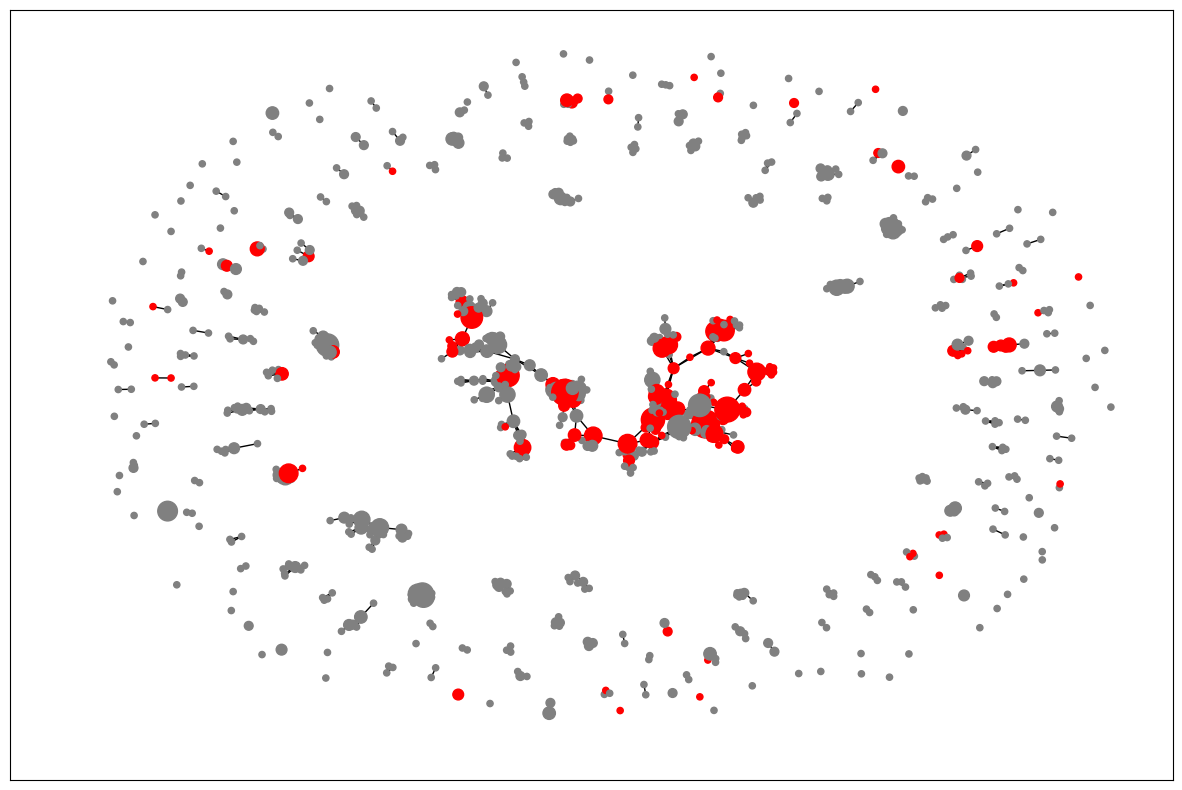

In [274]:
pos_G = nx.spring_layout(G)

weight = {node: ciaa_authors.count(node) for node in G.nodes()}
nx.set_node_attributes(G, weight, 'weight')
node_sizes = [20 * G.nodes[node]['weight'] for node in G.nodes()]

colors_G = ['red' if node in H.nodes() else 'gray' for node in G.nodes()]

plt.figure(figsize=(15,10))
nx.draw_networkx(G, pos_G, node_color=colors_G, node_size=node_sizes, with_labels=False)
plt.savefig('../../Figures/CIAA_compare.png', bbox_inches='tight')

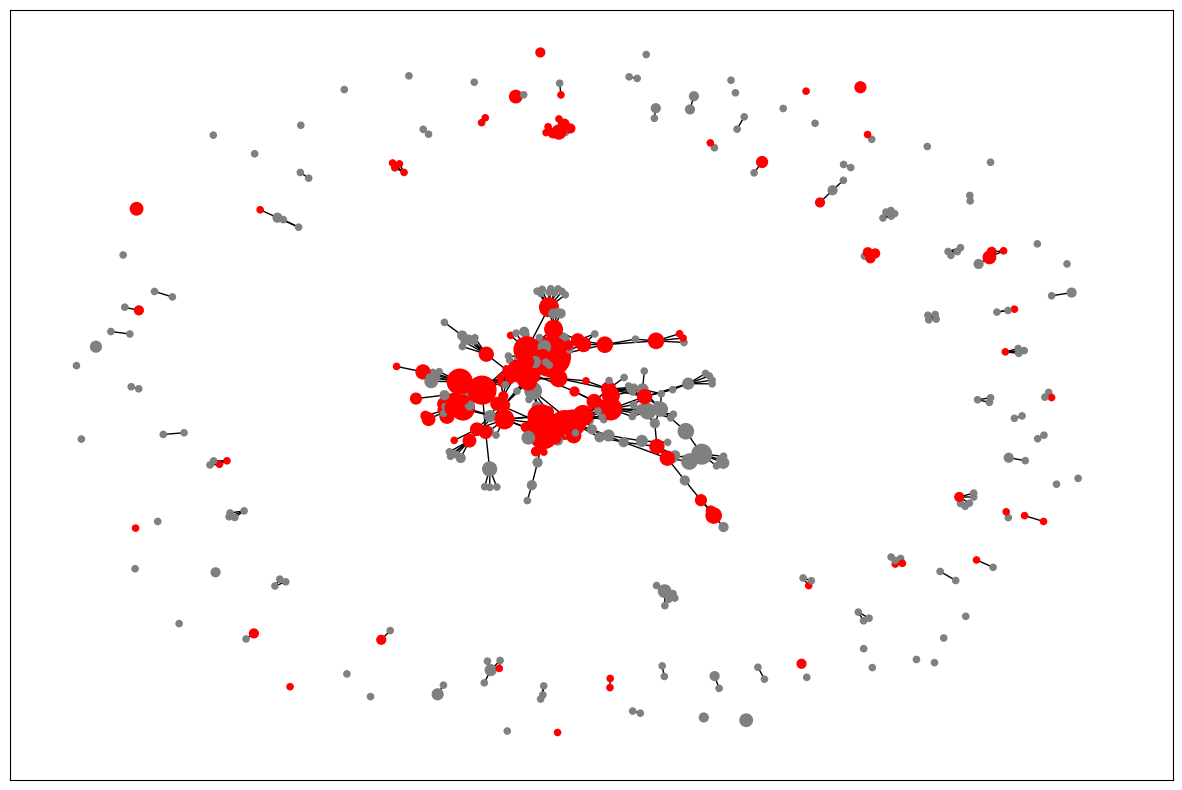

In [275]:
pos_H = nx.spring_layout(H)

weight = {node: dcfs_authors.count(node) for node in H.nodes()}
nx.set_node_attributes(H, weight, 'weight')
node_sizes = [20 * H.nodes[node]['weight'] for node in H.nodes()]

colors_H = ['red' if node in G.nodes() else 'gray' for node in H.nodes()]

plt.figure(figsize=(15,10))
nx.draw_networkx(H, pos_H, node_color=colors_H, node_size=node_sizes, with_labels=False)
plt.savefig('../../Figures/DCFS_compare.png', bbox_inches='tight')

Likeness of CIAA and DCFS

In [276]:
len(set(ciaa_authors) & set(dcfs_authors))/len(set(ciaa_authors)|set(dcfs_authors))

0.12321428571428572

## Comparing comoponents

In [277]:
ciaa_components = sorted(list(nx.connected_components(G)), key=len, reverse=True)
list_to_csv(ciaa_components, '../data/cleaned/CIAA_components.csv')
dcfs_components = sorted(list(nx.connected_components(H)), key=len, reverse=True)
list_to_csv(dcfs_components, '../data/cleaned/DCFS_components.csv')

In [278]:
print('DCFS component number: '+str(len(dcfs_components)))
print('CIAA component number: '+str(len(ciaa_components)))

import decimal

def round_to_sigfigs(number, sigfigs):
    if number == 0:
        return 0
    exponent = decimal.Decimal(str(number)).adjusted()
    scale = 10 ** (sigfigs - exponent - 1)
    rounded_number = round(decimal.Decimal(number) * scale) / scale
    return rounded_number

matrix = []
for i in range(len(dcfs_components)):
    matrix_entry = []
    for j in range(len(ciaa_components)):
        res = 0   
        for d in dcfs_components[i]:
            if len(ciaa_components[j]) > 5 and len(dcfs_components[i]) > 5 or True:     
                if d in ciaa_components[j]:
                    res += 1
                res = res/(len(set(dcfs_components[i]) | set(ciaa_components[j])))
            matrix_entry.append(round_to_sigfigs(res,3))
    matrix.append(matrix_entry)

matrix = []
for i in dcfs_components:
    matrix_entry = []
    for j in ciaa_components:
        matrix_entry.append(len(i&j)/len(i|j))
    matrix.append(matrix_entry)

# make matrix results visible
component_likeness = {}
#component_likeness[('DCFS','CIAA')] = 'likeness'
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] != 0:
            component_likeness[(i,j)] = matrix[i][j]

sorted_component_likeness = sorted(component_likeness.items(), key=lambda item: item[1], reverse=True)
sorted_component_likeness

DCFS component number: 104
CIAA component number: 219


[((50, 110), 1.0),
 ((60, 146), 1.0),
 ((63, 153), 1.0),
 ((9, 26), 0.8),
 ((25, 134), 0.5),
 ((58, 208), 0.5),
 ((76, 90), 0.5),
 ((23, 205), 0.3333333333333333),
 ((31, 103), 0.3333333333333333),
 ((38, 89), 0.3333333333333333),
 ((14, 199), 0.25),
 ((18, 93), 0.25),
 ((22, 100), 0.25),
 ((29, 55), 0.25),
 ((10, 129), 0.2),
 ((95, 31), 0.2),
 ((0, 0), 0.17595307917888564),
 ((12, 54), 0.16666666666666666),
 ((12, 67), 0.16666666666666666),
 ((20, 42), 0.16666666666666666),
 ((41, 31), 0.16666666666666666),
 ((53, 4), 0.16666666666666666),
 ((56, 19), 0.14285714285714285),
 ((5, 46), 0.125),
 ((11, 22), 0.1111111111111111),
 ((2, 16), 0.08333333333333333),
 ((12, 7), 0.07142857142857142),
 ((4, 1), 0.045454545454545456),
 ((92, 3), 0.041666666666666664),
 ((1, 0), 0.03626943005181347),
 ((0, 3), 0.02643171806167401),
 ((15, 0), 0.015544041450777202),
 ((0, 16), 0.014084507042253521),
 ((0, 1), 0.012145748987854251),
 ((27, 0), 0.010416666666666666),
 ((0, 44), 0.009478672985781991),
 

In [279]:
list(G.edges())[0][0]

'https://dblp.uni-trier.de/pid/41/1330.html'

### Node-wise

New components:26 9: 0.8
CIAA


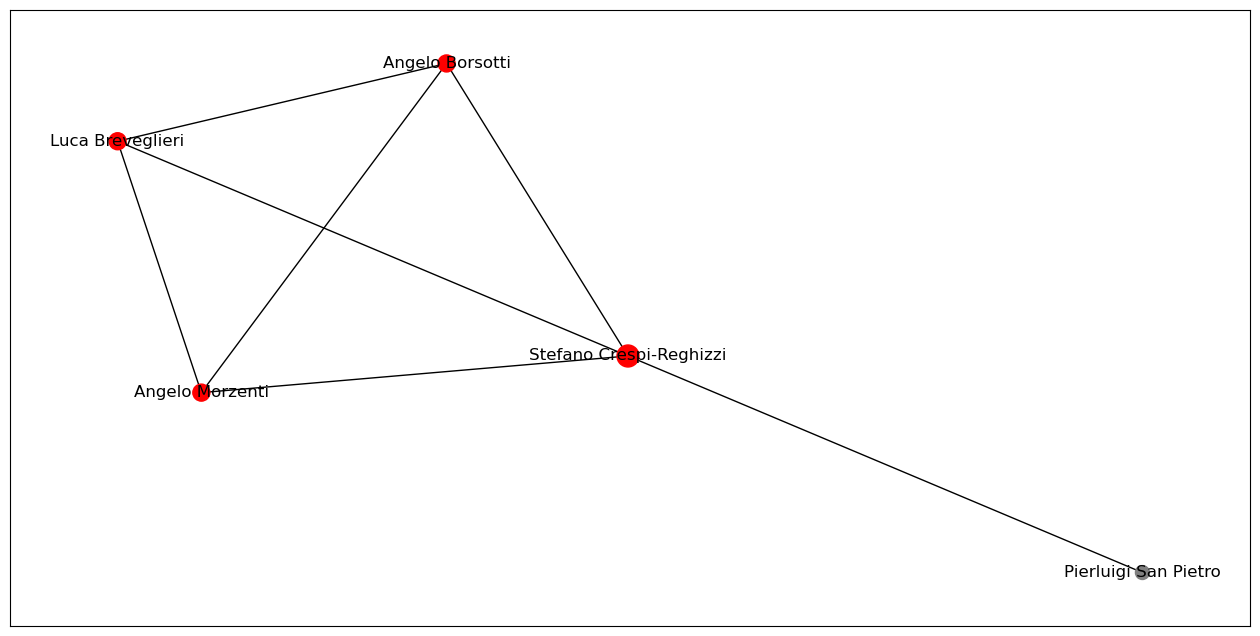

DCFS


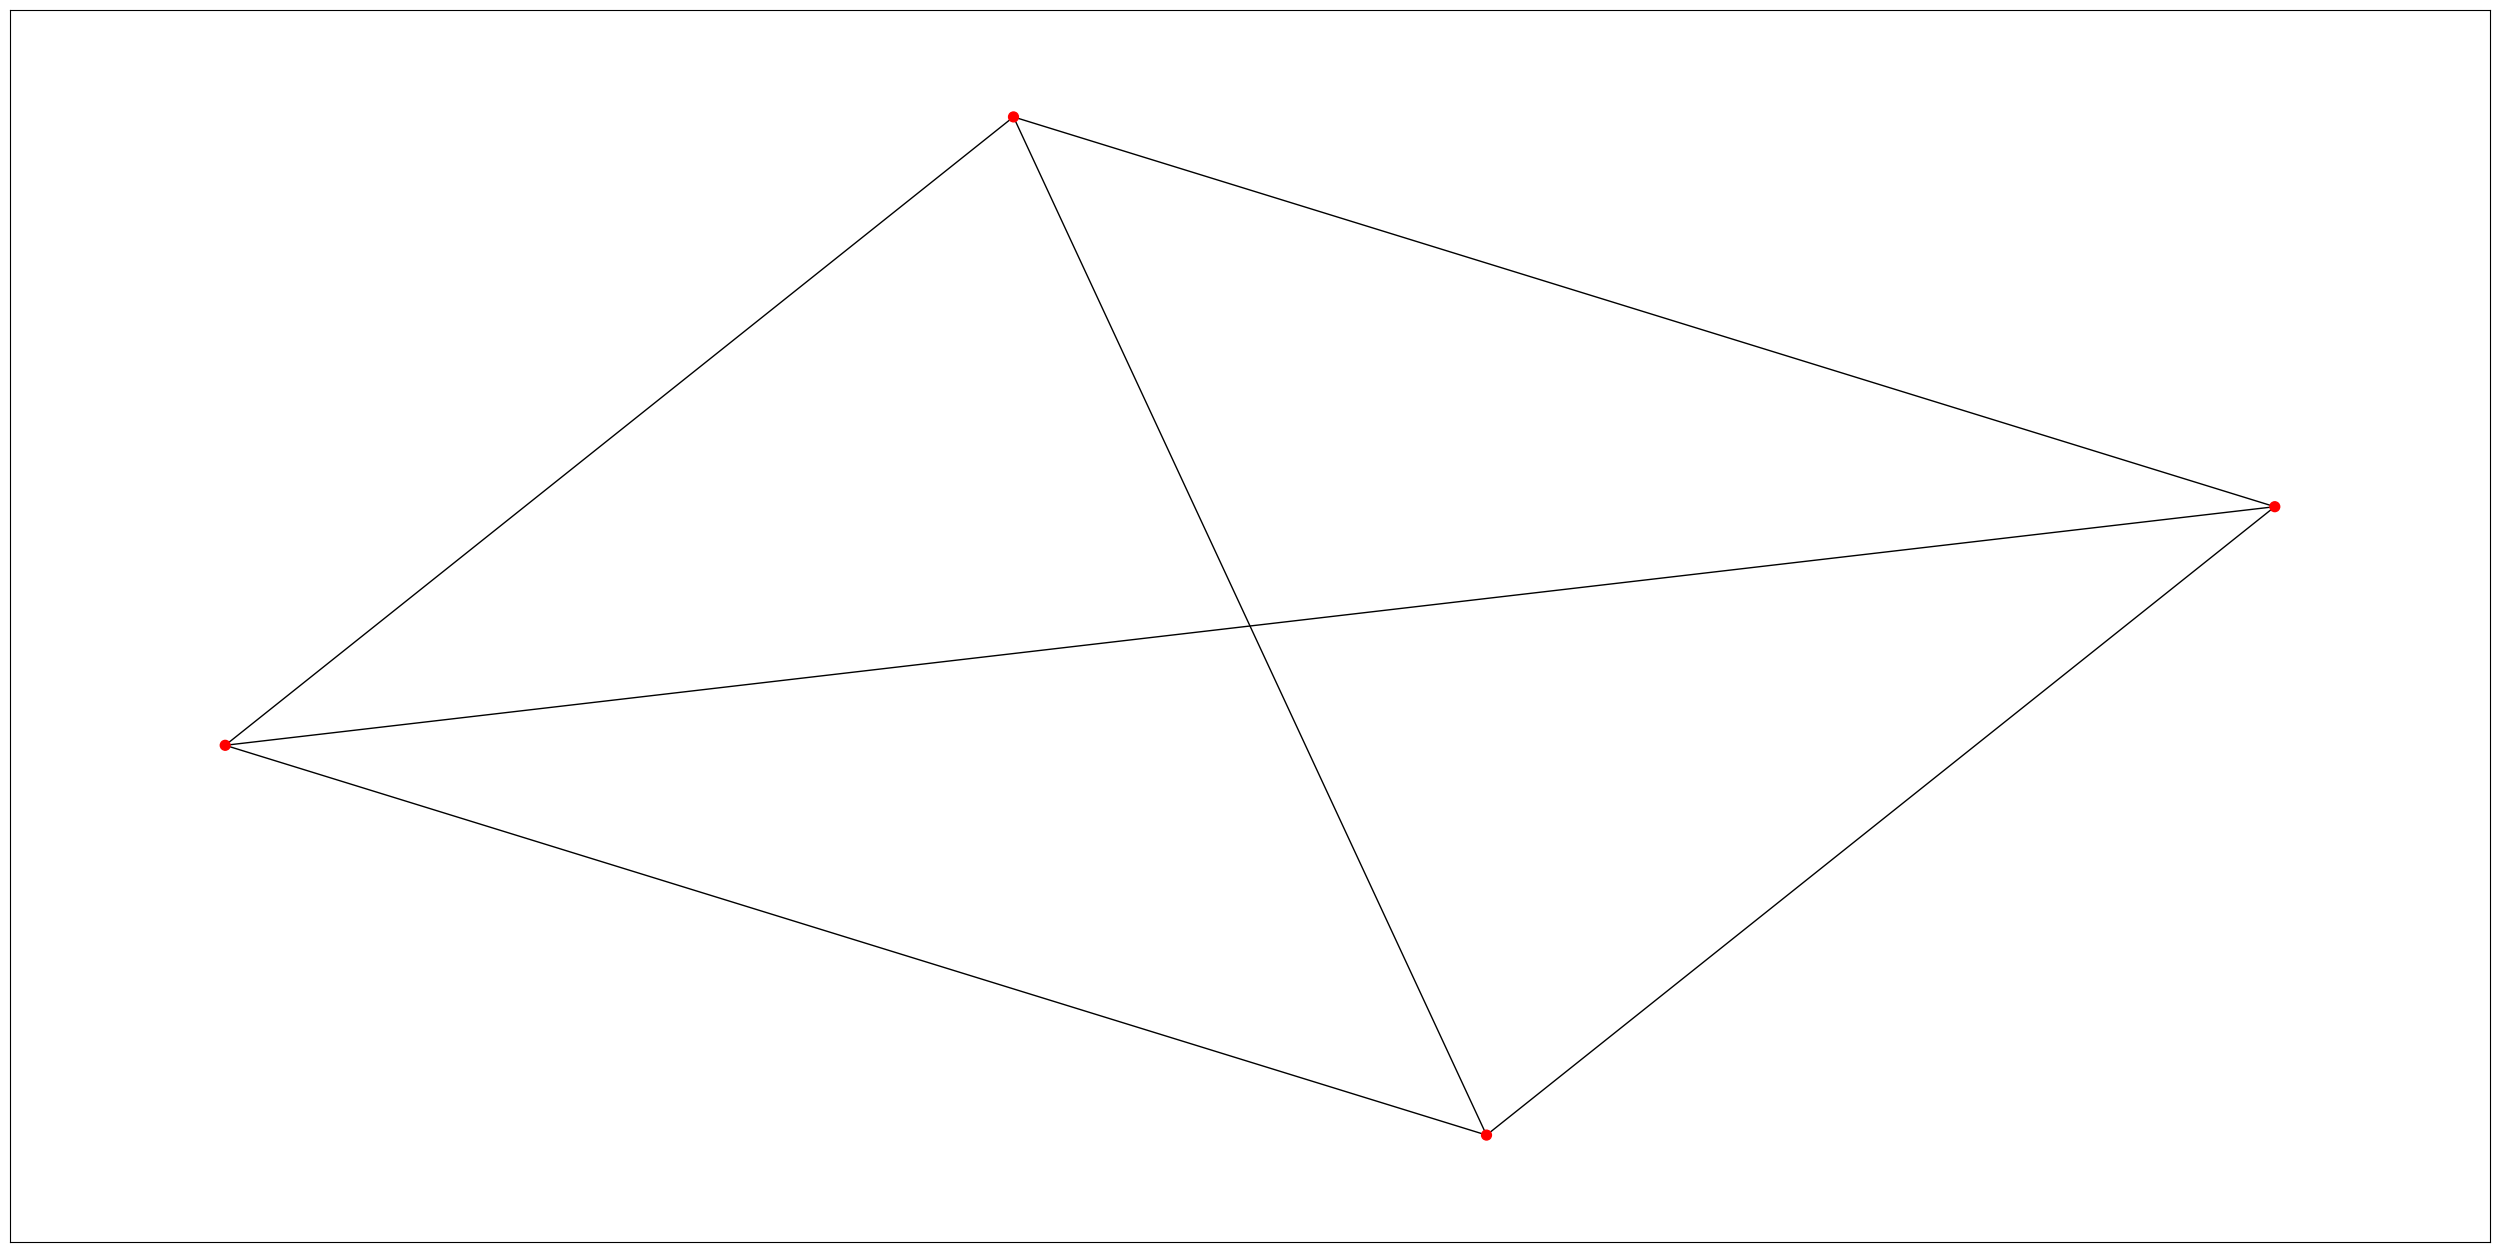

New components:0 0: 0.17595307917888564
CIAA


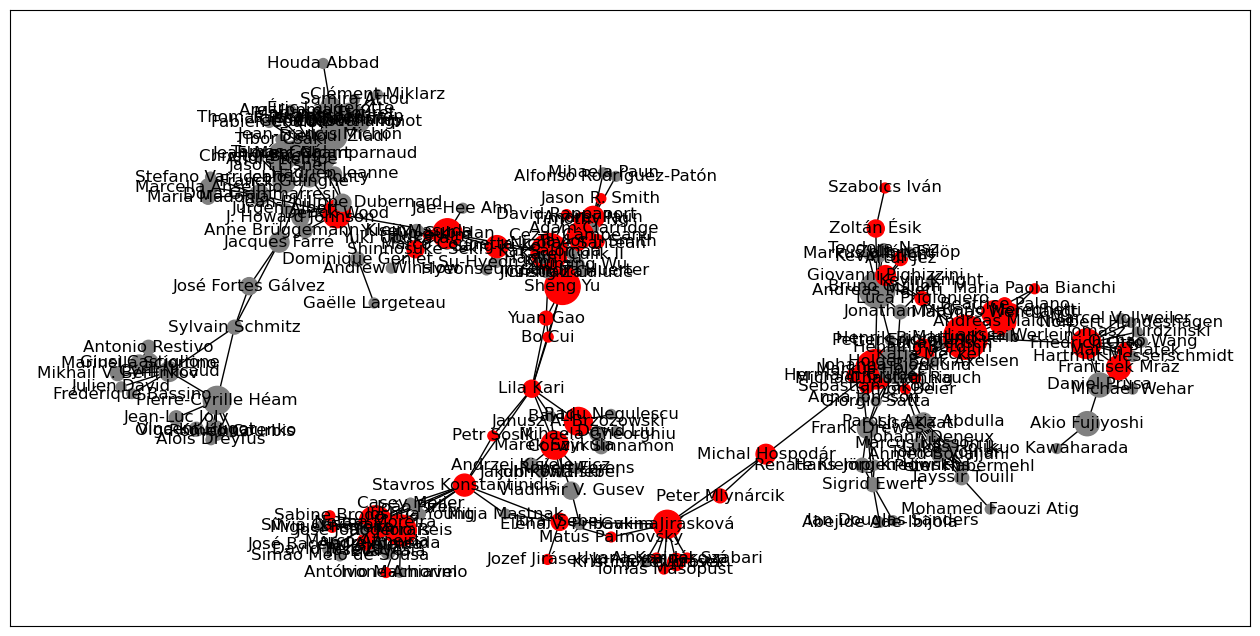

DCFS


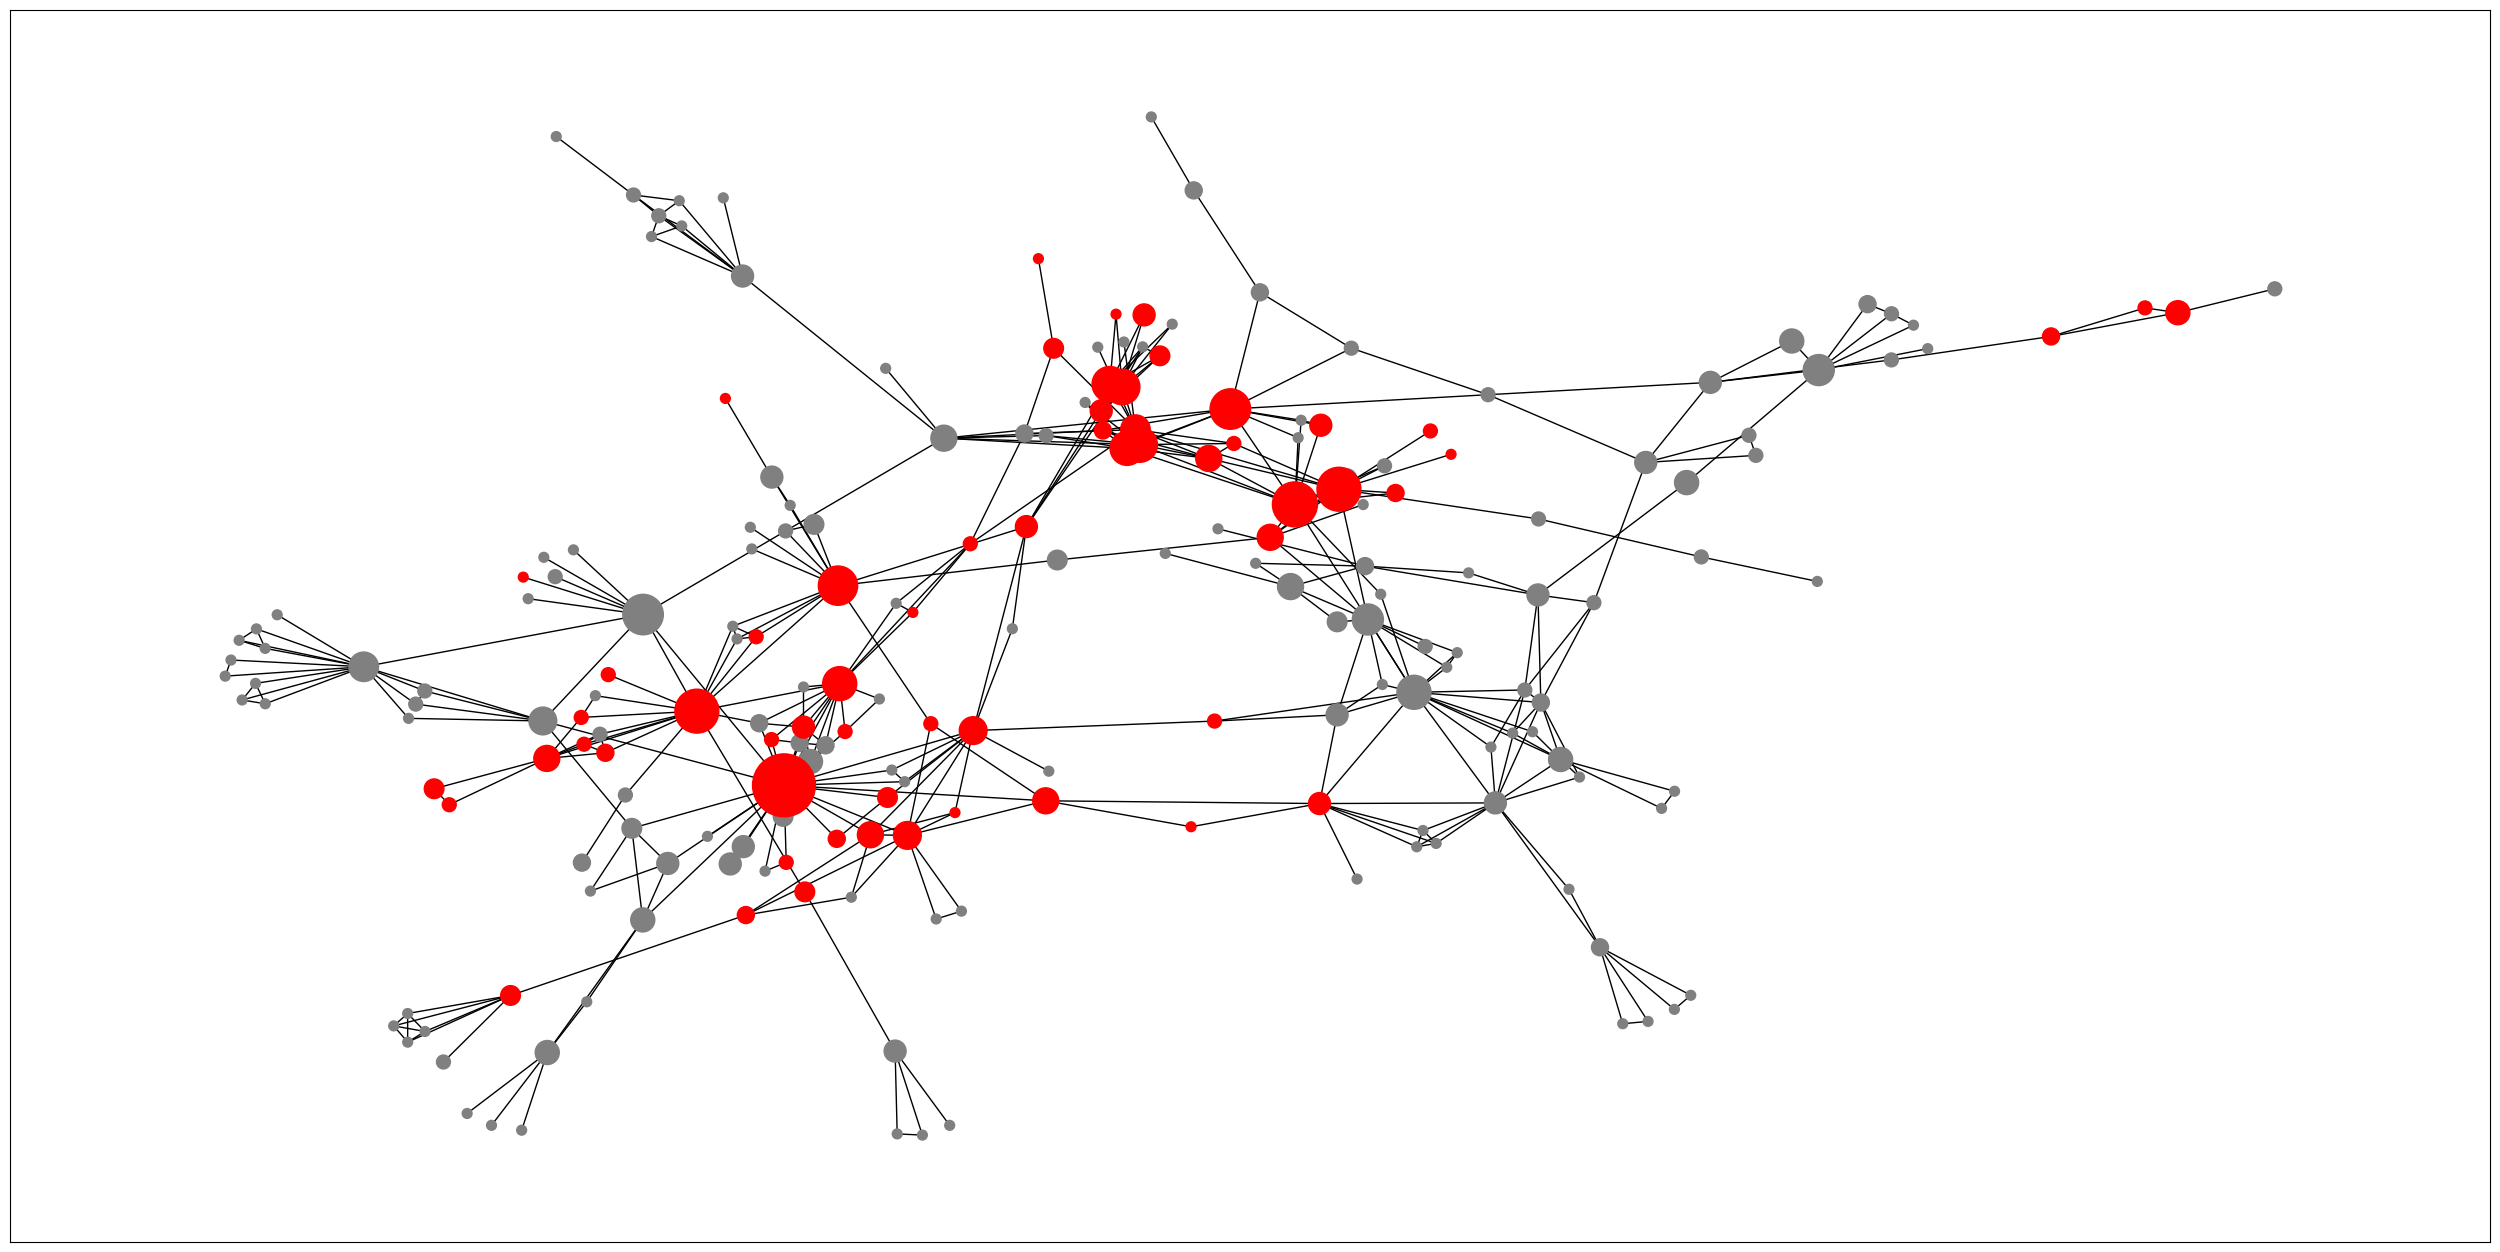

New components:0 1: 0.03626943005181347
CIAA


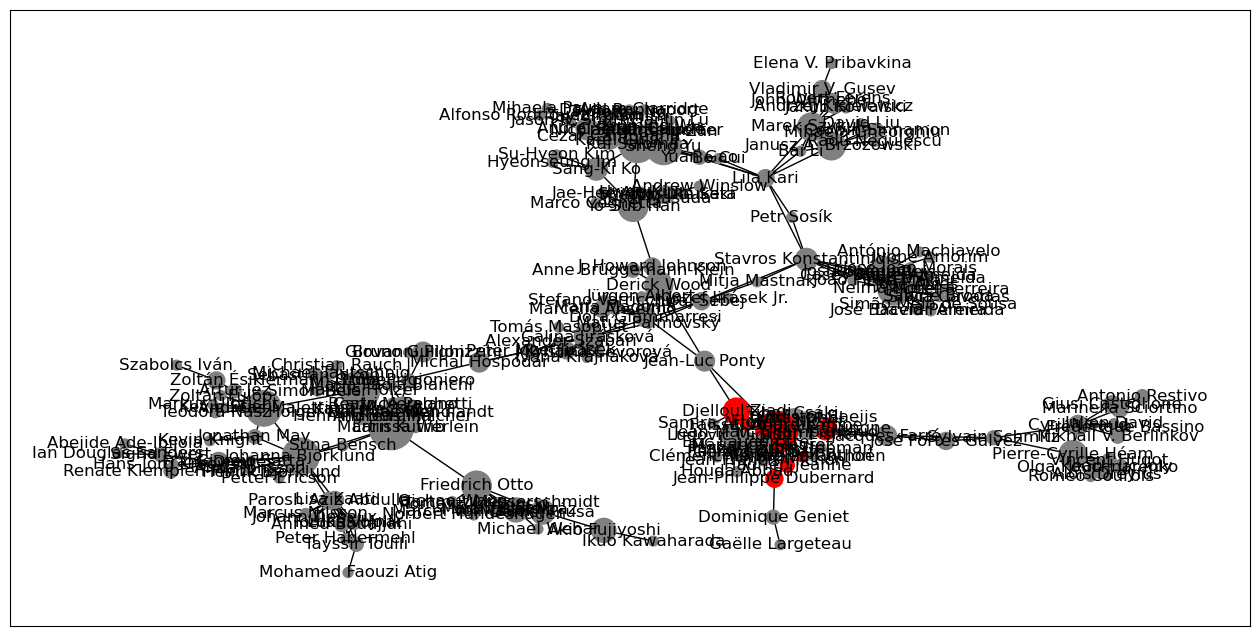

DCFS


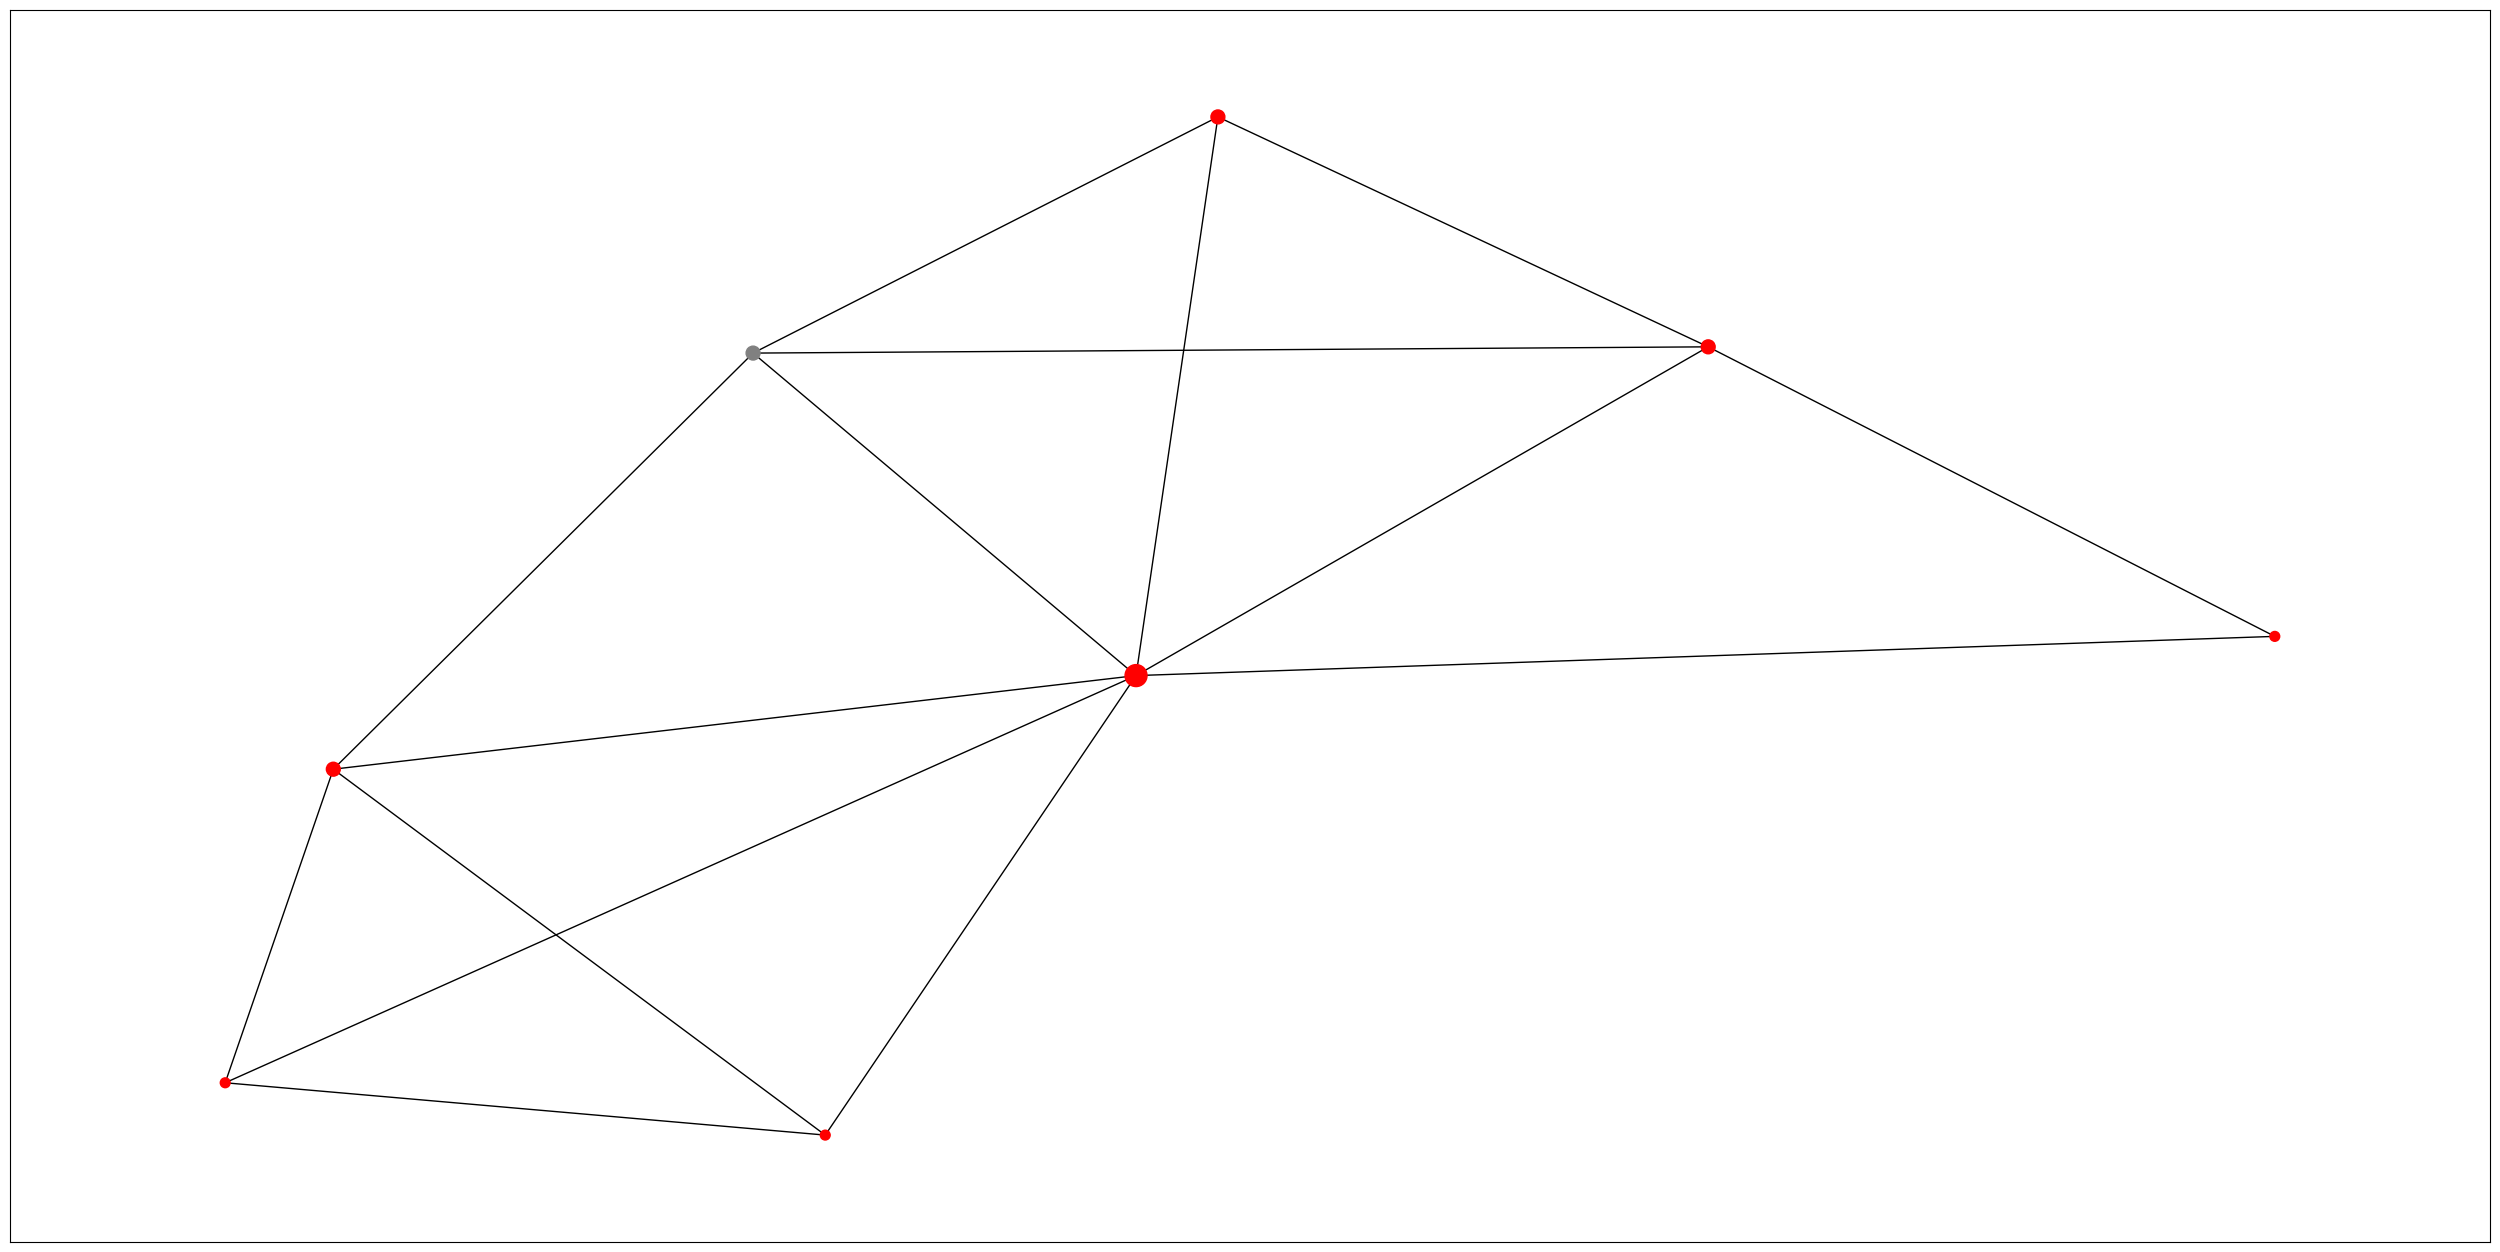

New components:3 0: 0.02643171806167401
CIAA


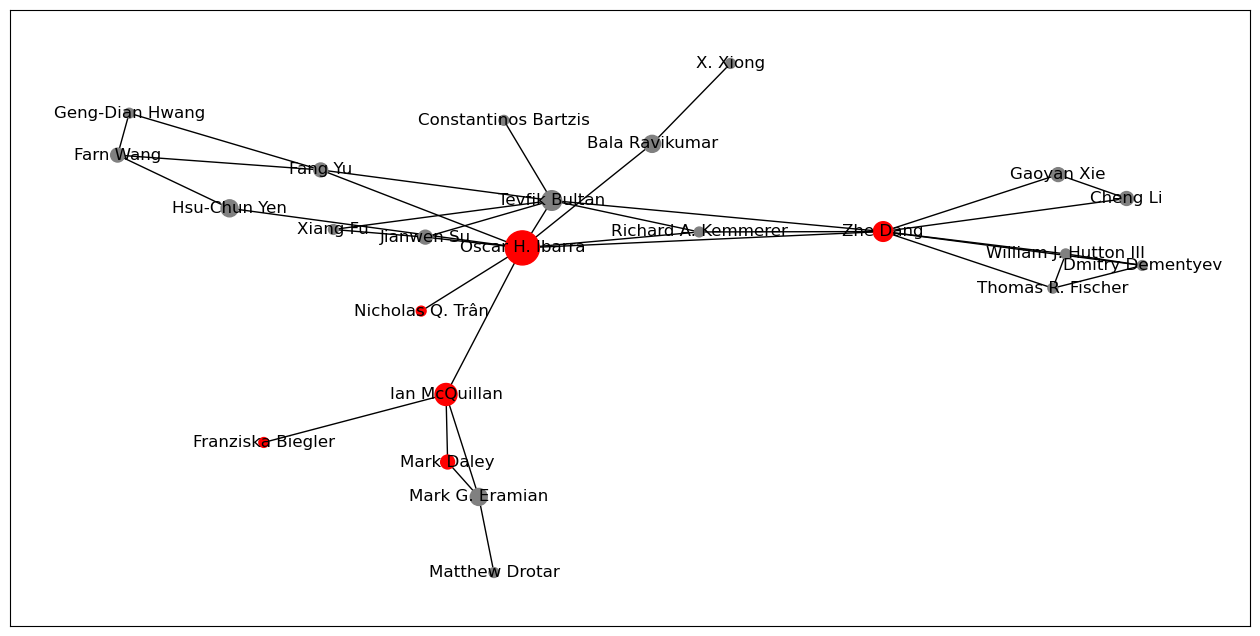

DCFS


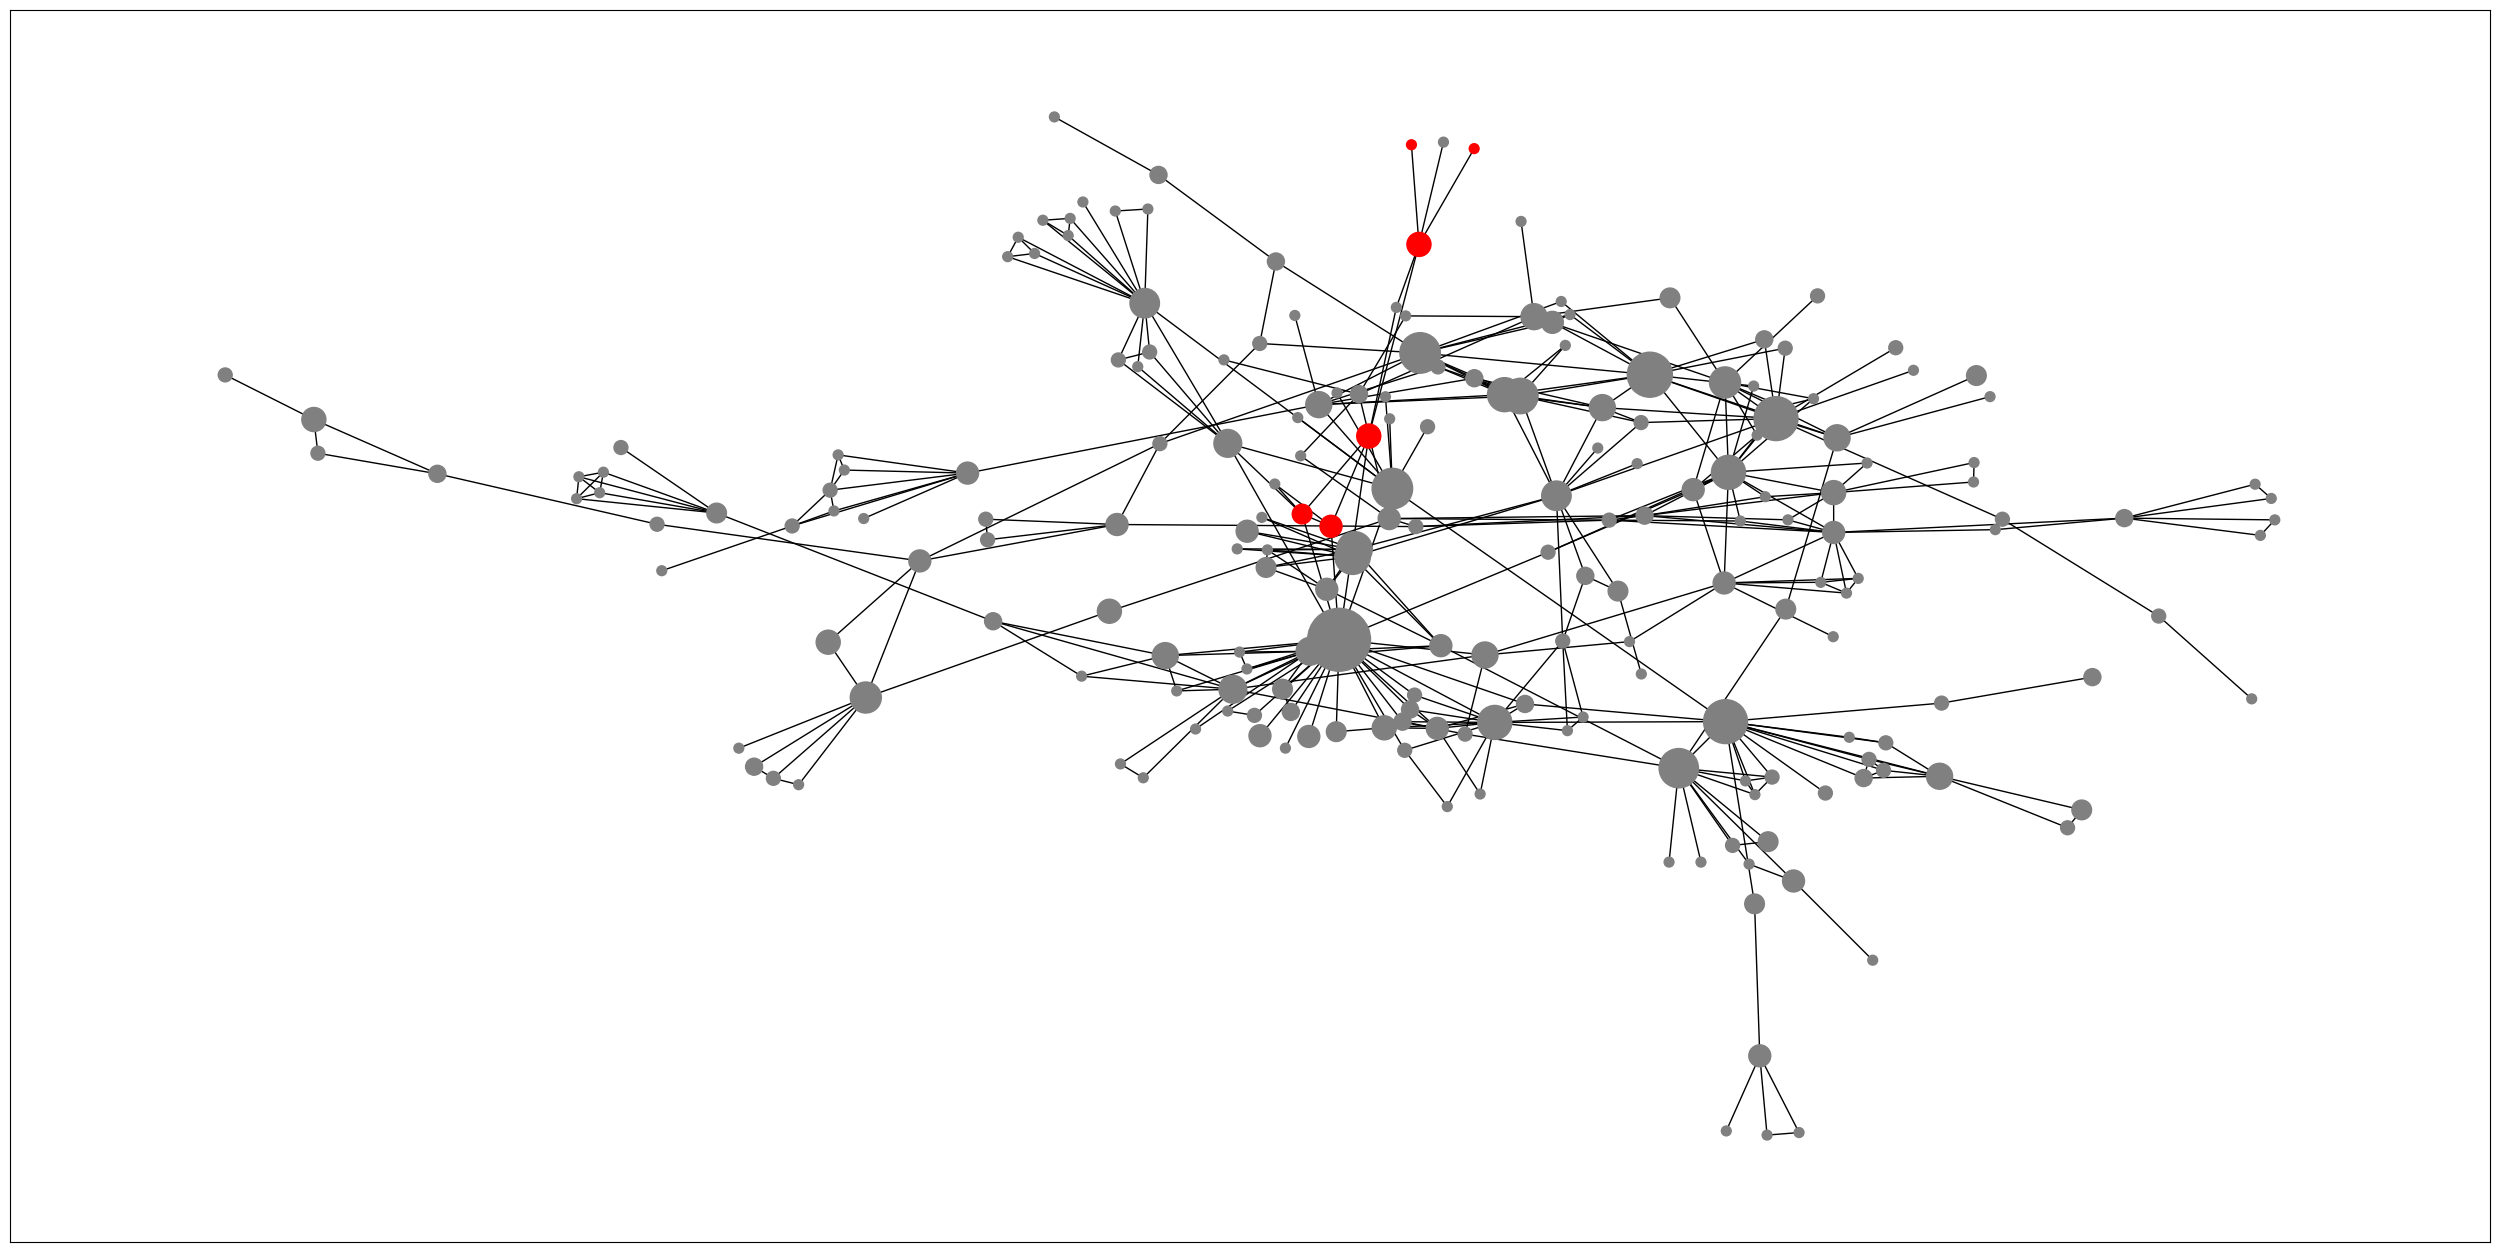

In [280]:
for entry in sorted_component_likeness:
    g = G.subgraph(ciaa_components[entry[0][1]])
    h = H.subgraph(dcfs_components[entry[0][0]])
    if len(g.nodes()) > 5 or len(h.nodes()) > 5 or True:
        g_labels = {node: get_Name(node,'CIAA') for node in g.nodes()}
        h_labels = {node: get_Name(node,'DCFS') for node in h.nodes()}
        nx.set_node_attributes(g, g_labels, 'label')
        nx.set_node_attributes(h, h_labels, 'label')
        g_color_map = ['red' if node in h.nodes() else 'gray' for node in g.nodes()]
        h_color_map = ['red' if node in g.nodes() else 'gray' for node in h.nodes()]
        if  h_color_map.count('red')>3:
            pos_g = nx.spring_layout(g)
            pos_h = nx.spring_layout(h)
            # pos_g = nx.random_layout(g)
            # pos_h = nx.random_layout(h)
            
            # compute node weights
            weight = {node: ciaa_authors.count(node) for node in g.nodes()}
            nx.set_node_attributes(g, weight, 'weight')
            g_node_sizes = [50 * g.nodes[node]['weight'] for node in g.nodes()]   
            weight = {node: dcfs_authors.count(node) for node in h.nodes()}
            nx.set_node_attributes(h, weight, 'weight')
            h_node_sizes = [50 * h.nodes[node]['weight'] for node in h.nodes()]

            # compute edge weights
            # edge_weight = []
            # for edge in list(g.edges()):
            #     paper_keys = [i for i in range(len(ciaa_authors)) if ciaa_authors[i]==edge[0]]
            #     for i in paper_keys:
            #         if edge[1] in ciaa_co_author_list[i]: res += 1
            #     edge_weight.append(res)
            # edge_weight = [weight/max(edge_weight) for weight in edge_weight]
            # nx.set_edge_attributes(g, edge_weight, 'weight')
            # g_edge_weights = [g.edges[edge]['weight'] for edge in g.edges()]
            # edge_weight = []
            # for edge in list(h.edges()):
            #     paper_keys = [i for i in range(len(dcfs_authors)) if dcfs_authors[i]==edge[0]]
            #     for i in paper_keys:
            #         if edge[1] in dcfs_co_author_list[i]: res += 1
            #     edge_weight.append(res)
            # nx.set_edge_attributes(h, edge_weight, 'weight')
            # h_edge_weights = [h.edges[edge]['weight'] for edge in h.edges()]

            # Print components
            print('New components:'+str(entry[0][1])+' '+str(entry[0][0])+': '+str(entry[1]))
            print('CIAA')
            plt.figure(figsize=(16,8))
            # nx.draw_networkx(g,pos_g,labels=g_labels,node_color=g_color_map,node_size=g_node_sizes,width=g_edge_weights)
            nx.draw_networkx(g,pos_g,labels=g_labels,node_color=g_color_map,node_size=g_node_sizes,with_labels=True)
            plt.show()
            print('DCFS')
            plt.figure(figsize=(32,16))
            nx.draw_networkx(h,pos_h,labels=h_labels,node_color=h_color_map,node_size=h_node_sizes,with_labels=False)
            # nx.draw_networkx(h,pos_h,labels=h_labels,node_color=h_color_map,node_size=h_node_sizes,width=h_edge_weights)
            plt.show()

### Edge-wise

In [281]:
ciaa_subgraphs = [G.subgraph(ciaa_components[i]) for i in range(len(ciaa_components))]
dcfs_subgraphs = [H.subgraph(dcfs_components[i]) for i in range(len(dcfs_components))]

ciaa_edges = [set(g.edges()) for g in ciaa_subgraphs]
dcfs_edges = [set(h.edges()) for h in dcfs_subgraphs]

matrix = []
for i in dcfs_edges:
    matrix_entry = []
    for j in ciaa_edges:
        if len(i|j) != 0:
            matrix_entry.append(len(i&j)/(len(i|j)))
        else:
            matrix_entry.append(0)
    matrix.append(matrix_entry)

# make matrix results visible
component_likeness = {}
#component_likeness[('DCFS','CIAA')] = 'likeness'
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] != 0:
            component_likeness[(i,j)] = matrix[i][j]

sorted_component_likeness = sorted(component_likeness.items(), key=lambda item: item[1], reverse=True)
sorted_component_likeness

[((50, 110), 1.0),
 ((0, 0), 0.10074074074074074),
 ((9, 26), 0.08333333333333333),
 ((0, 3), 0.009280742459396751),
 ((15, 0), 0.008645533141210375),
 ((1, 0), 0.008426966292134831),
 ((0, 16), 0.0024630541871921183)]

New components:0 0: 0.10074074074074074
CIAA


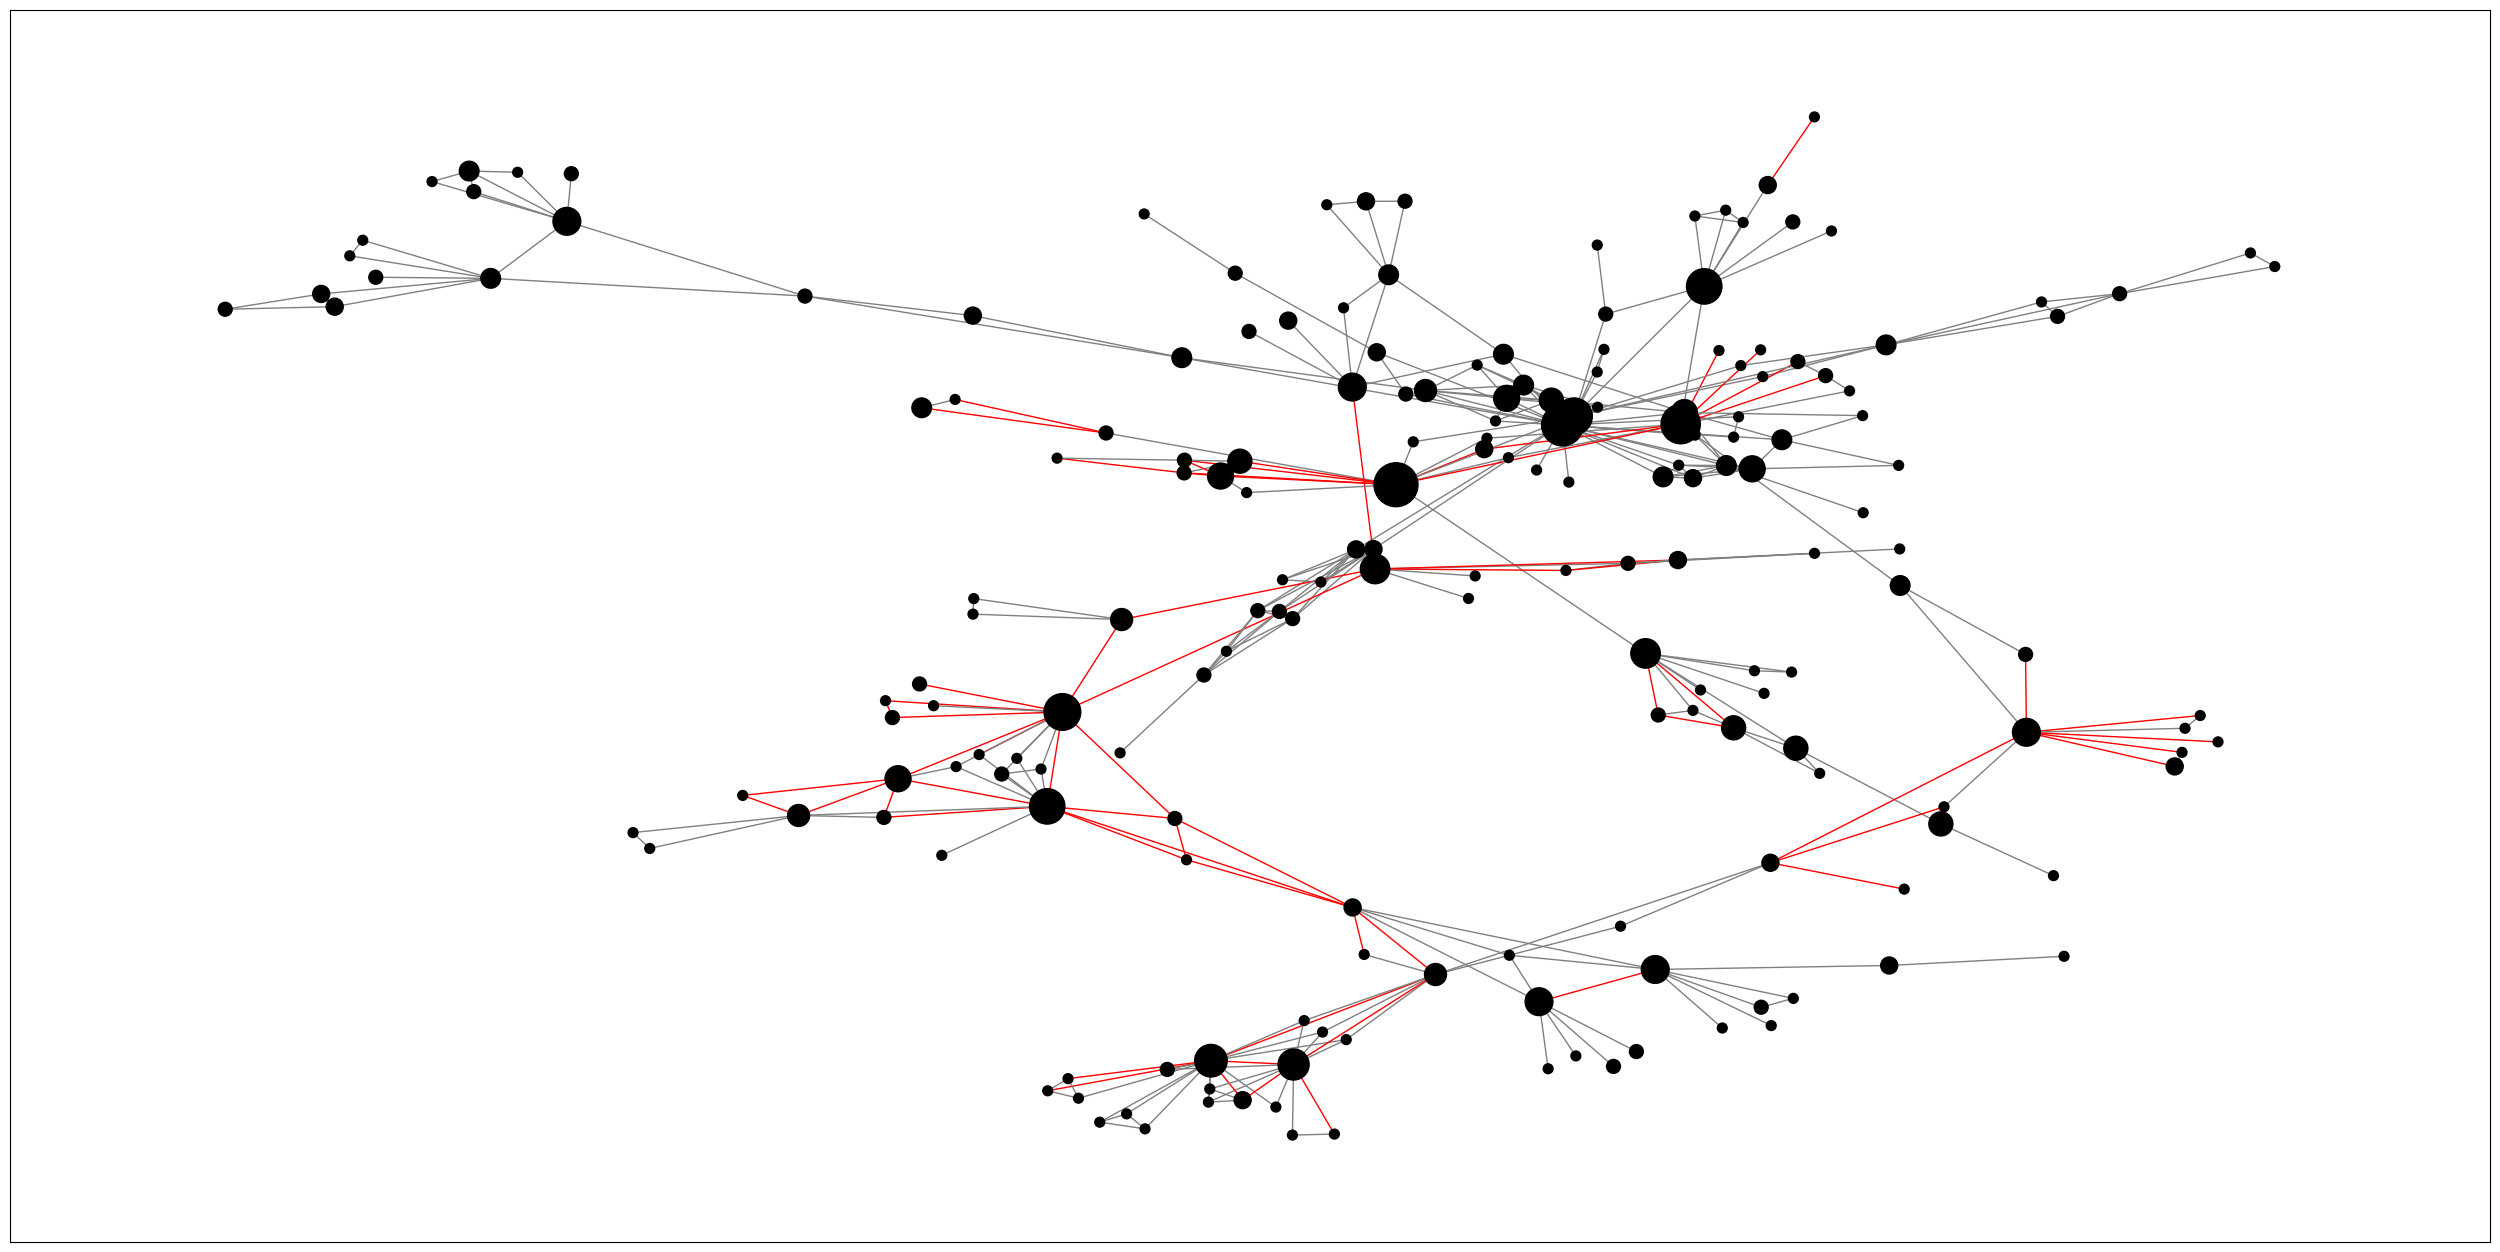

DCFS


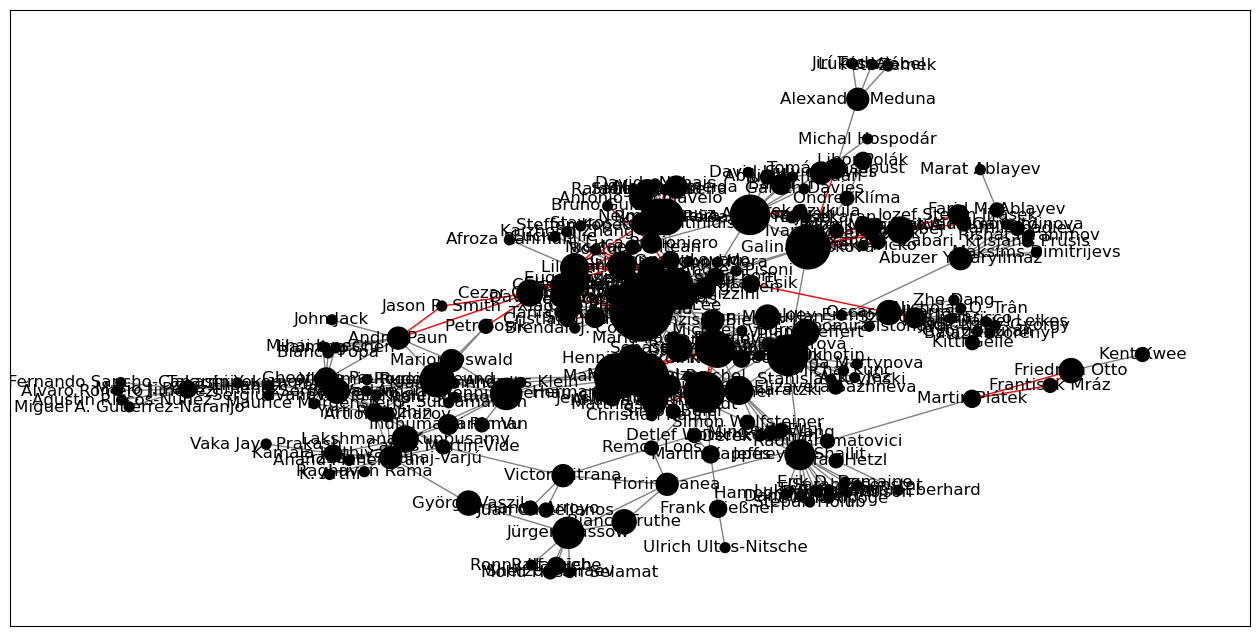

New components:26 9: 0.08333333333333333
CIAA


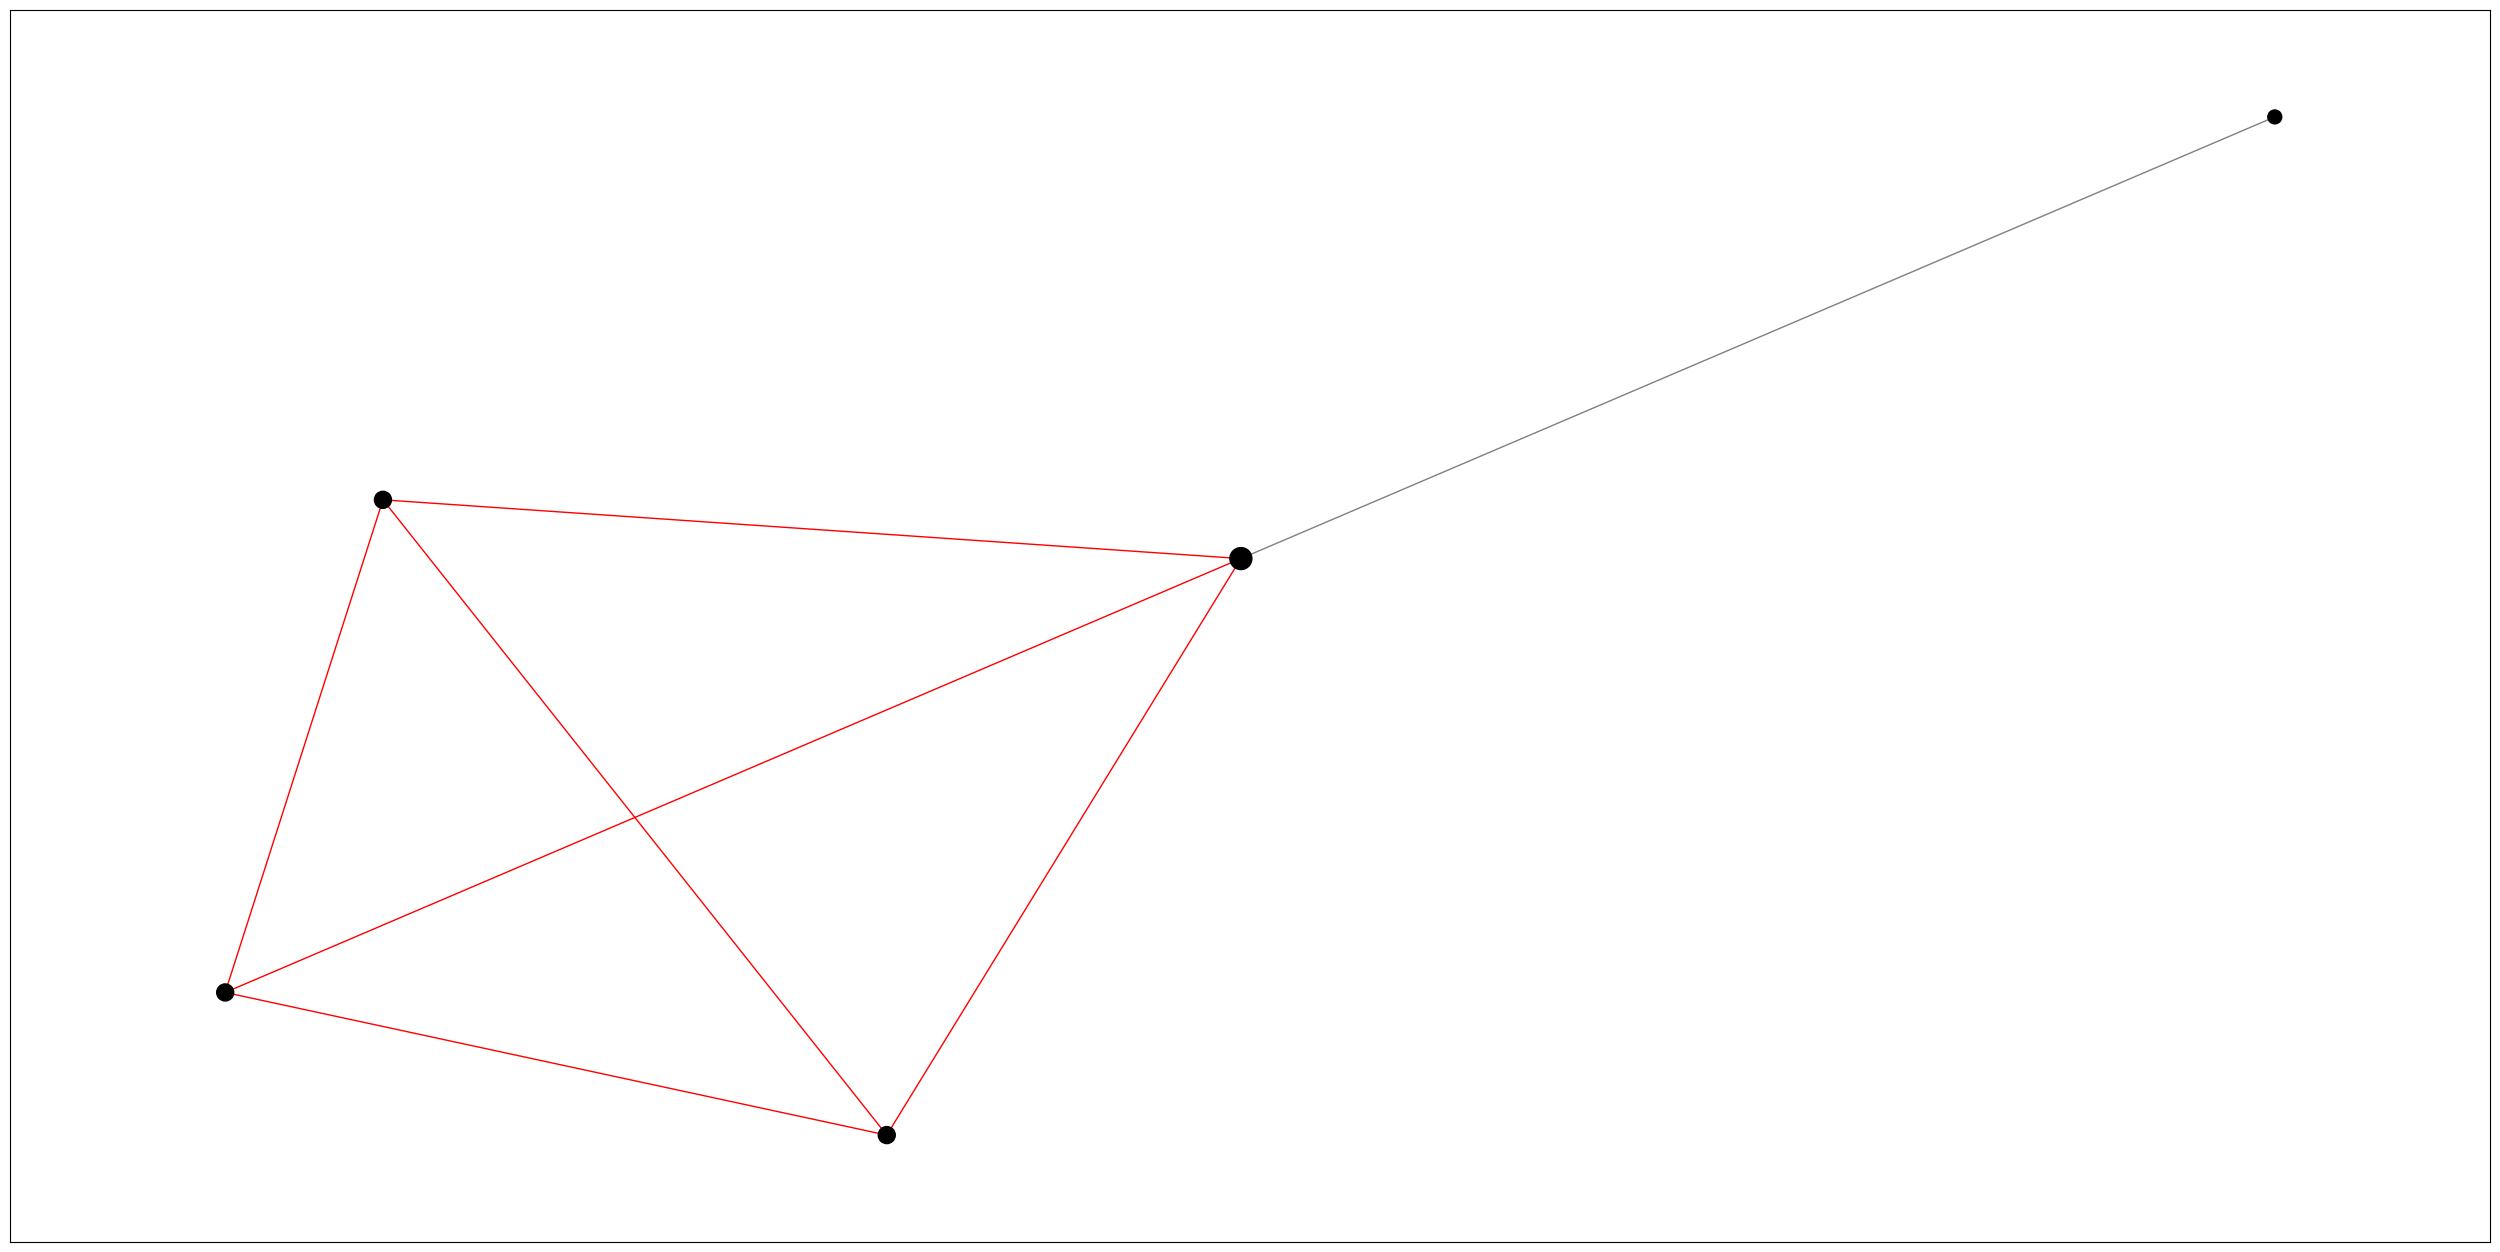

DCFS


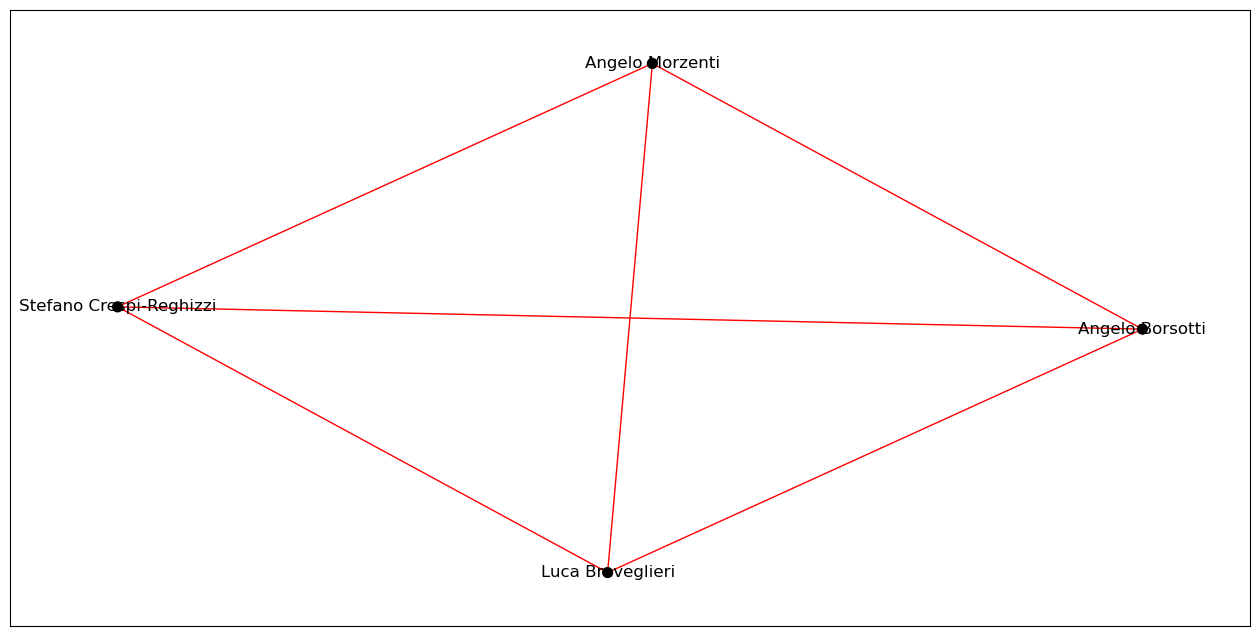

New components:3 0: 0.009280742459396751
CIAA


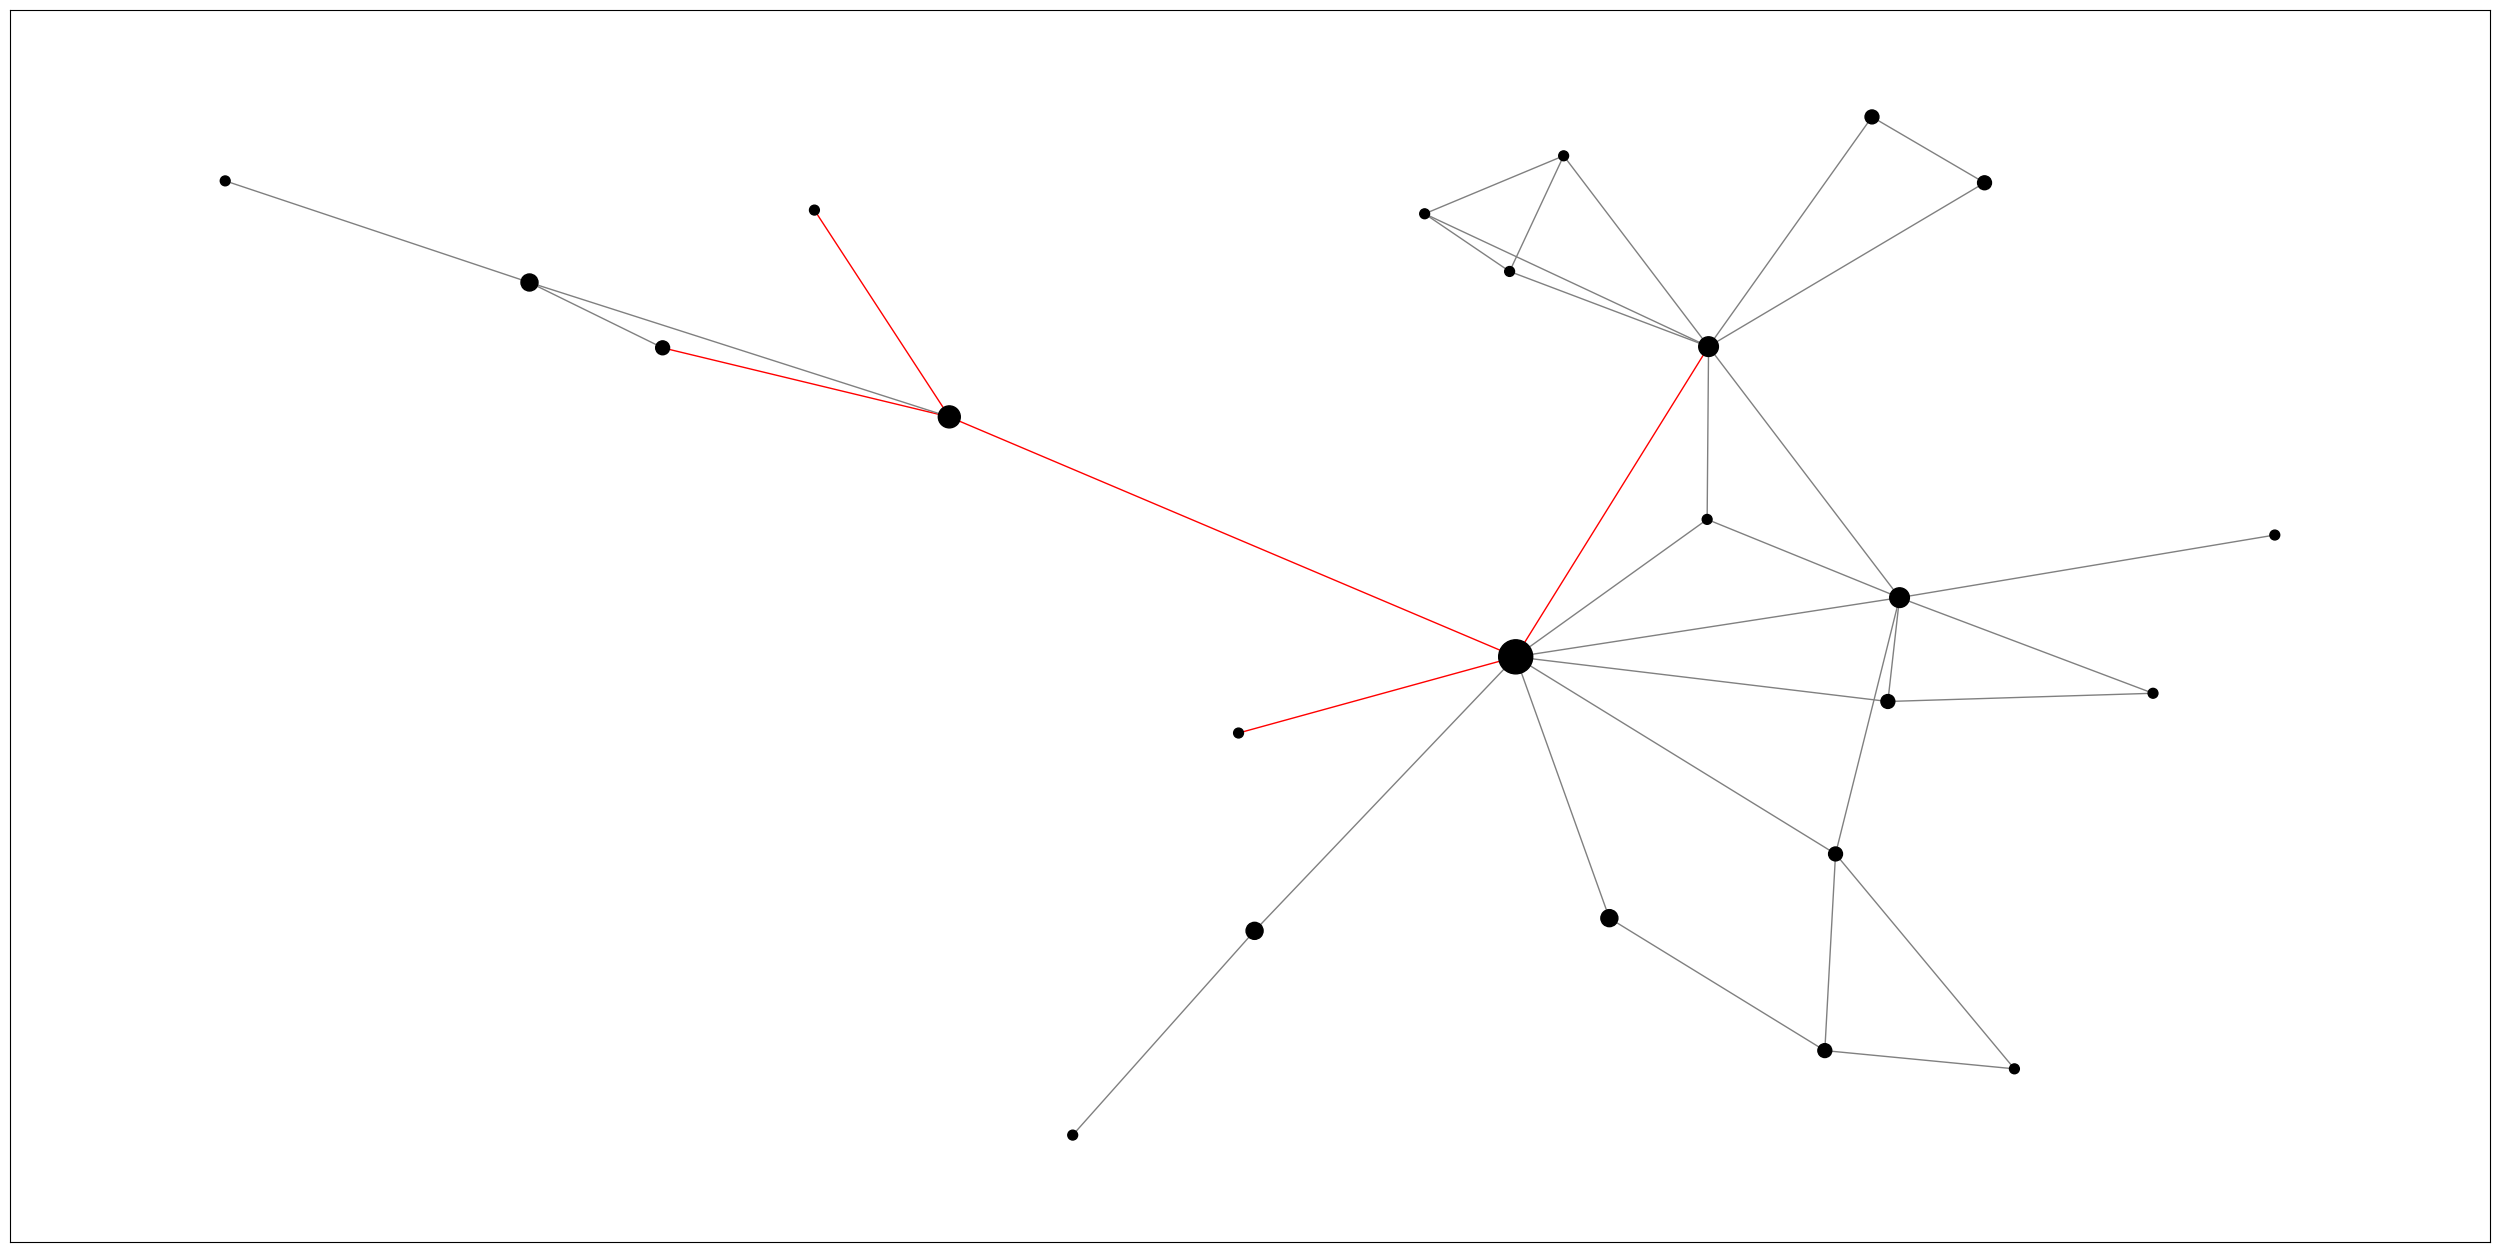

DCFS


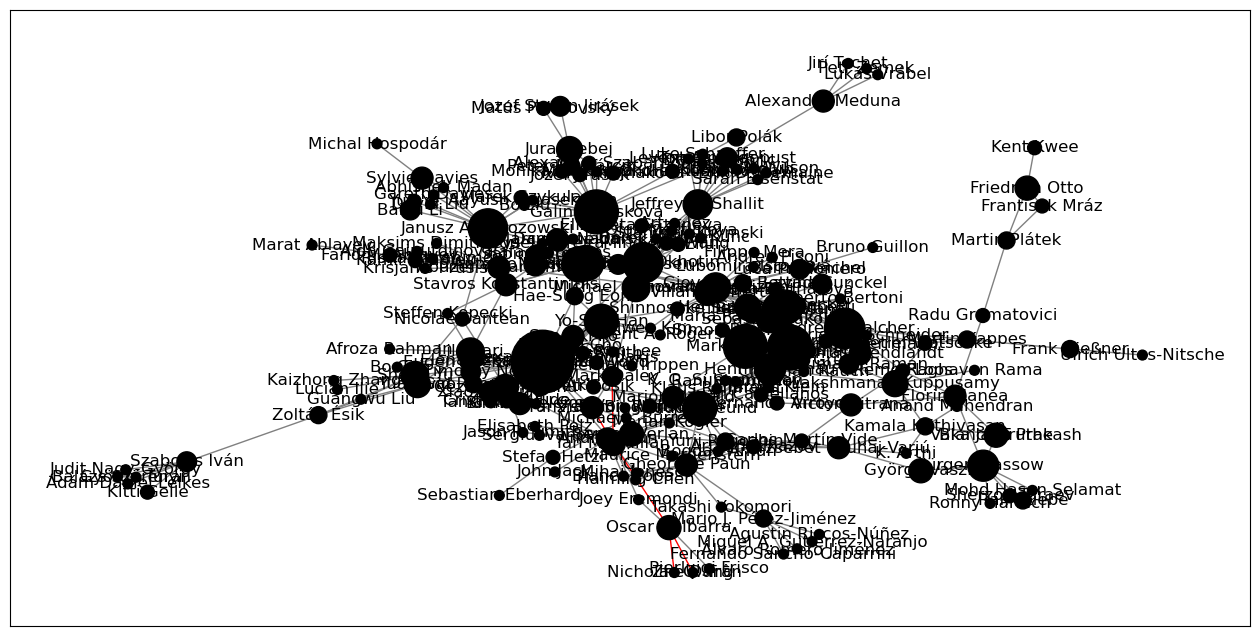

New components:0 1: 0.008426966292134831
CIAA


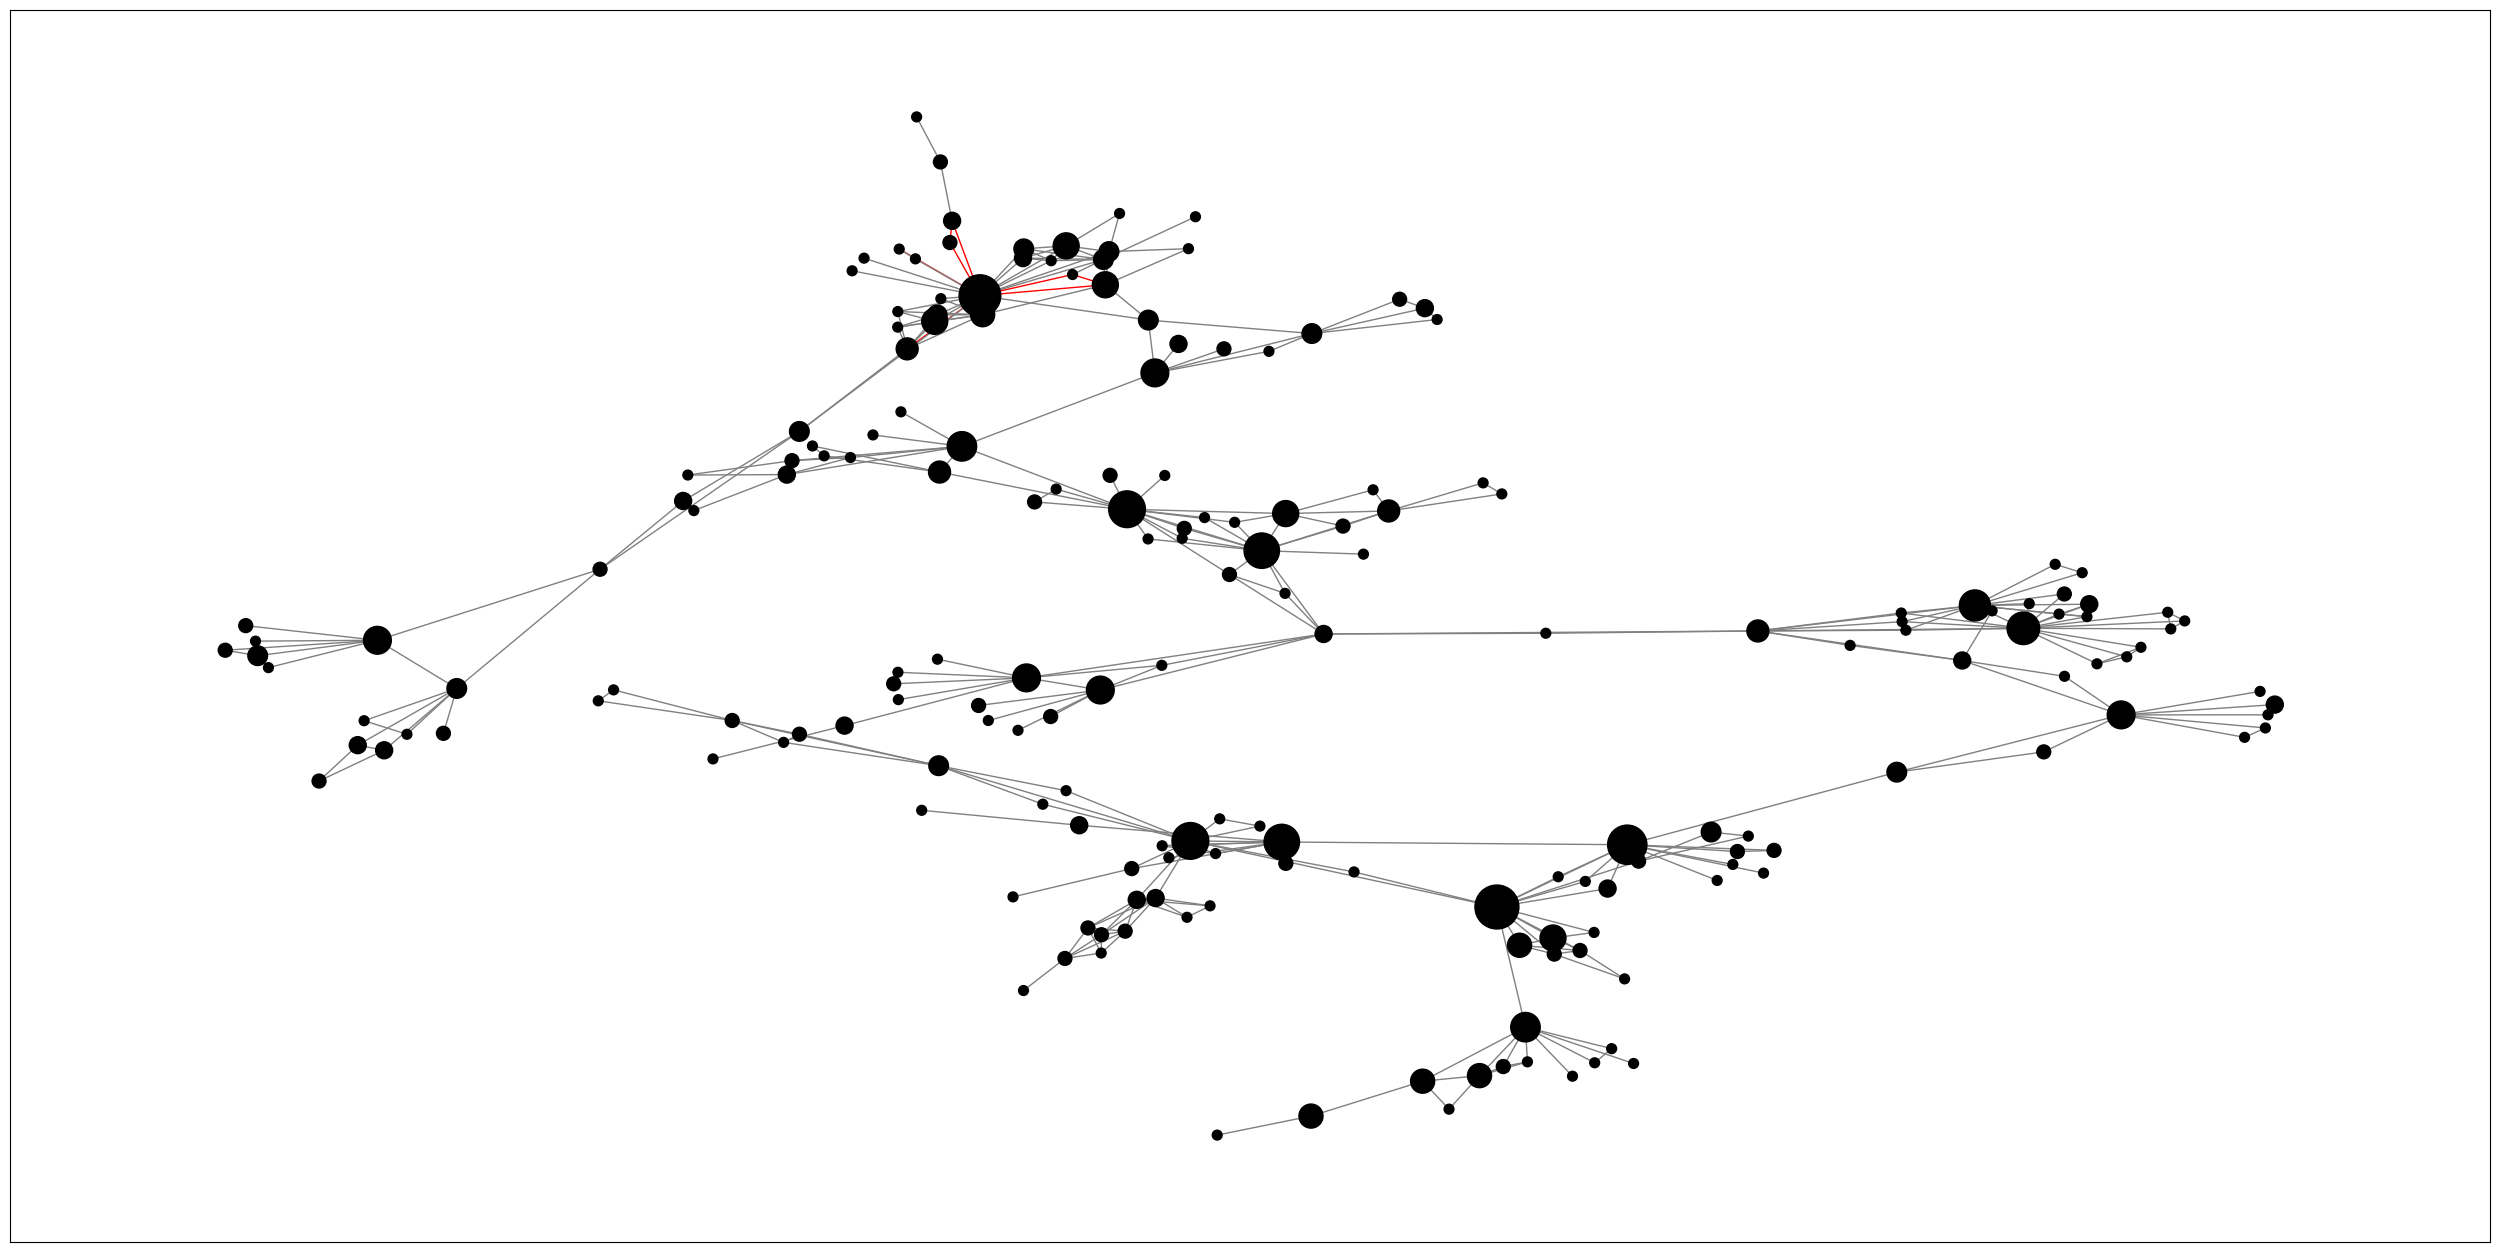

DCFS


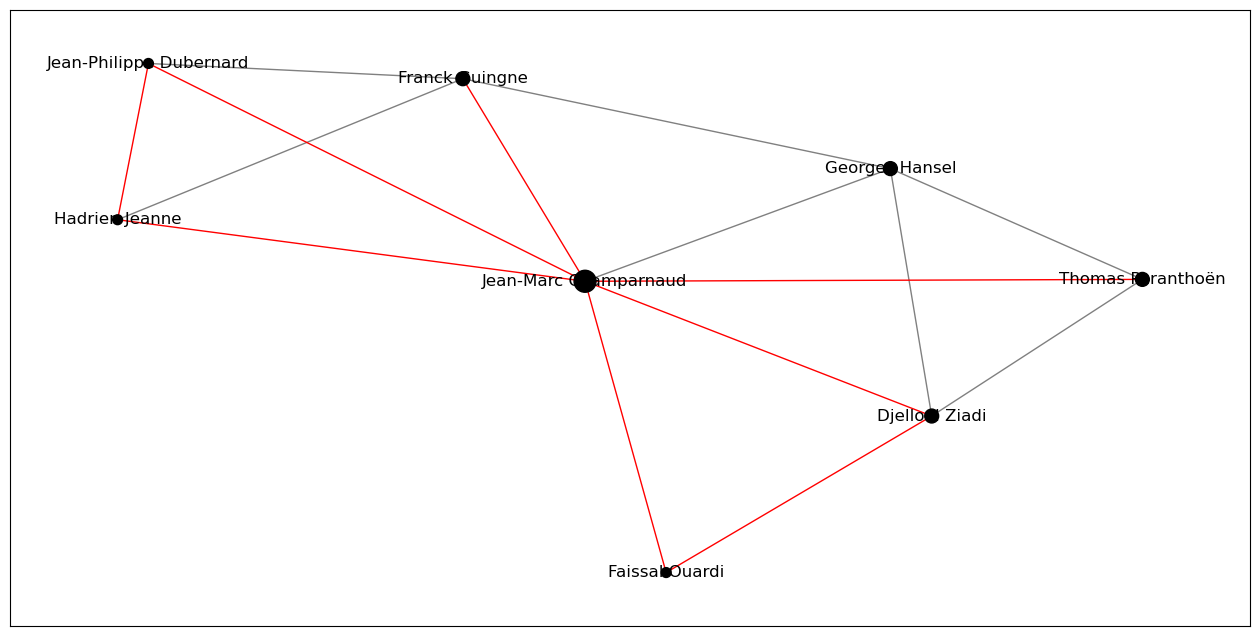

In [282]:
for entry in sorted_component_likeness:
    g = ciaa_subgraphs[entry[0][1]]
    h = dcfs_subgraphs[entry[0][0]]
    if len(g.nodes()) > 5 or len(h.nodes()) > 5 or True:
        g_labels = {node: get_Name(node,'CIAA') for node in g.nodes()}
        h_labels = {node: get_Name(node,'DCFS') for node in h.nodes()}
        nx.set_node_attributes(g, g_labels, 'label')
        nx.set_node_attributes(h, h_labels, 'label')
        g_color_map = ['red' if edge in h.edges() else 'gray' for edge in g.edges()]
        h_color_map = ['red' if edge in g.edges() else 'gray' for edge in h.edges()]
        if  h_color_map.count('red')>3:
            pos_g = nx.spring_layout(g)
            pos_h = nx.spring_layout(h)
            # pos_g = nx.random_layout(g)
            # pos_h = nx.random_layout(h)
            
            # compute node weights
            weight = {node: ciaa_authors.count(node) for node in g.nodes()}
            nx.set_node_attributes(g, weight, 'weight')
            g_node_sizes = [50 * g.nodes[node]['weight'] for node in g.nodes()]   
            weight = {node: dcfs_authors.count(node) for node in h.nodes()}
            nx.set_node_attributes(h, weight, 'weight')
            h_node_sizes = [50 * h.nodes[node]['weight'] for node in h.nodes()]

            # compute edge weights
            # edge_weight = []
            # for edge in list(g.edges()):
            #     paper_keys = [i for i in range(len(ciaa_authors)) if ciaa_authors[i]==edge[0]]
            #     for i in paper_keys:
            #         if edge[1] in ciaa_co_author_list[i]: res += 1
            #     edge_weight.append(res)
            # edge_weight = [weight/max(edge_weight) for weight in edge_weight]
            # nx.set_edge_attributes(g, edge_weight, 'weight')
            # g_edge_weights = [g.edges[edge]['weight'] for edge in g.edges()]
            # edge_weight = []
            # for edge in list(h.edges()):
            #     paper_keys = [i for i in range(len(dcfs_authors)) if dcfs_authors[i]==edge[0]]
            #     for i in paper_keys:
            #         if edge[1] in dcfs_co_author_list[i]: res += 1
            #     edge_weight.append(res)
            # nx.set_edge_attributes(h, edge_weight, 'weight')
            # h_edge_weights = [h.edges[edge]['weight'] for edge in h.edges()]

            # Print components
            print('New components:'+str(entry[0][1])+' '+str(entry[0][0])+': '+str(entry[1]))
            print('CIAA')
            plt.figure(figsize=(32,16))
            # nx.draw_networkx(g,pos_g,labels=g_labels,node_color=g_color_map,node_size=g_node_sizes,width=g_edge_weights)
            nx.draw_networkx(g,pos_g,labels=g_labels,edge_color=g_color_map,node_size=g_node_sizes,with_labels=False,node_color='black')
            plt.show()
            print('DCFS')
            plt.figure(figsize=(16,8))
            nx.draw_networkx(h,pos_h,labels=h_labels,edge_color=h_color_map,node_size=h_node_sizes,with_labels=True,node_color='black')
            # nx.draw_networkx(h,pos_h,labels=h_labels,node_color=h_color_map,node_size=h_node_sizes,width=h_edge_weights)
            plt.show()

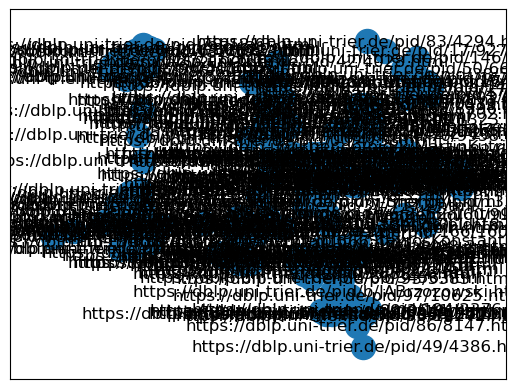

In [283]:
t = G.subgraph(ciaa_components[0])
pos = nx.spring_layout(t)
nx.draw_networkx(t,pos)

In [284]:
g = G.subgraph(ciaa_components[3])
h = H.subgraph(dcfs_components[0])

gcc = nx.clustering(g)
hcc = nx.clustering(h)

print(gcc['https://dblp.uni-trier.de/pid/i/OscarHIbarra.html'])
print(hcc['https://dblp.uni-trier.de/pid/i/OscarHIbarra.html'])

0.1388888888888889
0.1


## Compare Communities

/var/folders/68/zr6z7wd56pl2hspyj9v4d57m0000gn/T/ipykernel_78182/412177213.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_communities)
/Users/nils.dyck/opt/anaconda3/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


10


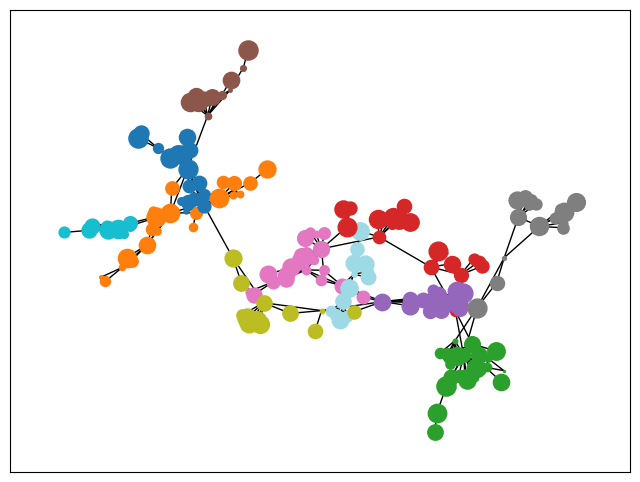

In [285]:
import community
plt.figure(figsize=(8,6))
g = G.subgraph(ciaa_components[0])

g_partition = community.best_partition(g)
g_communities = g_partition

# compute node weights
weight = {node: ciaa_authors.count(node) for node in g.nodes()}
nx.set_node_attributes(g, weight, 'weight')
g_node_sizes = [300 * g.nodes[node]['weight'] for node in g.nodes()]   
weight = {node: dcfs_authors.count(node) for node in h.nodes()}
nx.set_node_attributes(h, weight, 'weight')
h_node_sizes = [300 * h.nodes[node]['weight'] for node in h.nodes()]

# Determine the number of communities
num_communities = max(g_partition.values()) + 1

# Generate a colormap with a sufficient number of colors
color_map = cm.get_cmap('tab20', num_communities)

# Draw the graph with nodes colored by community
pos = nx.spring_layout(g)
i = 0
for node, community_id in g_partition.items():
    nx.draw_networkx_nodes(g, pos, nodelist=[node], node_color=color_map(community_id),node_size=[i])
    i += 1

nx.draw_networkx_edges(g, pos)
plt.savefig('../../Figures/CIAA_communities.png')
print(max(g_partition.values()))

In [286]:
def get_Key(url, venue):
    if venue == 'CIAA':
        book = pd.read_csv('../data/processed/CIAA-authors.csv', sep=';')
    else: book = pd.read_csv('../data/processed/DCFS-authors.csv', sep=';')
    res = book.loc[book['URL']==url]['Key'].to_list()[0]
    return res

In [287]:
communities = []
for i in range(max(g_partition.values())):
    res = []
    for key in g_partition.keys():
        if g_partition[key] == i:
            res.append(key)
    communities.append(res)
i = 0
for community in communities:
    r = g.subgraph(community)
    with open('../../ciaa_community'+str(i)+'.txt', 'w') as f:
        for edge in r.edges():
            f.write(str(get_Key(edge[0],'CIAA'))+' '+str(get_Key(edge[1],'CIAA'))+'\n')
    i += 1

/var/folders/68/zr6z7wd56pl2hspyj9v4d57m0000gn/T/ipykernel_78182/1660301671.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_communities)
/Users/nils.dyck/opt/anaconda3/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


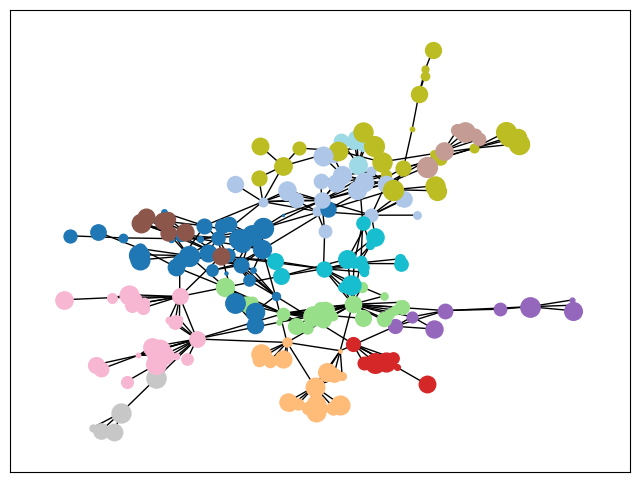

12


<Figure size 640x480 with 0 Axes>

In [288]:
import community

plt.figure(figsize=(8,6))
g = H.subgraph(dcfs_components[0])

g_partition = community.best_partition(g)
h_communities = g_partition

# compute node weights
weight = {node: dcfs_authors.count(node) for node in g.nodes()}
nx.set_node_attributes(g, weight, 'weight')
g_node_sizes = [300 * g.nodes[node]['weight'] for node in g.nodes()]   

# Determine the number of communities
num_communities = max(g_partition.values()) + 1

# Generate a colormap with a sufficient number of colors
color_map = cm.get_cmap('tab20', num_communities)

# Draw the graph with nodes colored by community
pos = nx.spring_layout(g)
i = 0
for node, community_id in g_partition.items():
    nx.draw_networkx_nodes(g, pos, nodelist=[node], node_color=color_map(community_id),node_size=[i])
    i += 1

nx.draw_networkx_edges(g, pos)
plt.show()
plt.savefig('../../Figures/DCFS_communities.png')
print(max(g_partition.values()))

In [289]:
communities = []
for i in range(max(g_partition.values())):
    res = []
    for key in g_partition.keys():
        if g_partition[key] == i:
            res.append(key)
    communities.append(res)
i = 0
for community in communities:
    r = h.subgraph(community)
    with open('../../dcfs_community'+str(i)+'.txt', 'a') as f:
        for edge in r.edges():
            f.write(edge[0]+' '+edge[1]+'\n')
    i += 1

In [290]:
h_com_list = [[] for i in range(max(h_communities.values())+1)]
for key in h_communities.keys():
    h_com_list[h_communities[key]].append(key)
g_com_list = [[] for i in range(max(g_communities.values())+1)]
for key in g_communities.keys():
    g_com_list[g_communities[key]].append(key)
h_com_list.sort(key=len, reverse=True)
g_com_list.sort(key=len, reverse=True)

In [291]:
print(h_com_list)

[['https://dblp.uni-trier.de/pid/97/5115.html', 'https://dblp.uni-trier.de/pid/78/5750-1.html', 'https://dblp.uni-trier.de/pid/181/3362.html', 'https://dblp.uni-trier.de/pid/70/9958.html', 'https://dblp.uni-trier.de/pid/67/3878.html', 'https://dblp.uni-trier.de/pid/10/4683.html', 'https://dblp.uni-trier.de/pid/185/0479.html', 'https://dblp.uni-trier.de/pid/40/3907.html', 'https://dblp.uni-trier.de/pid/21/3882.html', 'https://dblp.uni-trier.de/pid/54/3483.html', 'https://dblp.uni-trier.de/pid/44/40.html', 'https://dblp.uni-trier.de/pid/182/9958.html', 'https://dblp.uni-trier.de/pid/44/9959.html', 'https://dblp.uni-trier.de/pid/91/6093.html', 'https://dblp.uni-trier.de/pid/51/7703.html', 'https://dblp.uni-trier.de/pid/u/UlrichUltesNitsche.html', 'https://dblp.uni-trier.de/pid/65/8396.html', 'https://dblp.uni-trier.de/pid/h/MarkusHolzer1.html', 'https://dblp.uni-trier.de/pid/49/3748.html', 'https://dblp.uni-trier.de/pid/j/HJurgensen.html', 'https://dblp.uni-trier.de/pid/86/1702.html', 'ht

In [292]:
def round_to_sigfigs(number, sigfigs):
    if number == 0:
        return 0
    exponent = decimal.Decimal(str(number)).adjusted()
    scale = 10 ** (sigfigs - exponent - 1)
    rounded_number = round(decimal.Decimal(number) * scale) / scale
    return rounded_number

matrix = []
for i in h_com_list:
    matrix_entry = []
    for j in g_com_list:
        matrix_entry.append(len(set(i)&set(j))/len(set(i)|set(j)))
    matrix.append(matrix_entry)
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] == 0.0: matrix[i][j] = int(0)
        else: matrix[i][j] = round_to_sigfigs(matrix[i][j], 3)
matrix

[[0, 0, 0, 0, 0.39, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.0882, 0, 0],
 [0, 0, 0.0465, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0.0588, 0, 0.346, 0],
 [0, 0, 0.128, 0.135, 0, 0, 0, 0, 0, 0, 0],
 [0, 0.0244, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0.0278, 0.233, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0.333, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0.037, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0625, 0]]

In [293]:
# Convert list to latex table
def list_to_latex_table(data):
    rows = []
    i = 0
    for row in data:
        row_str = str(i)+' & '+' & '.join(str(cell) for cell in row)
        rows.append(row_str)
        i+=1
    table = '\\\\ \\hline \n'.join(rows)
    latex_code = '\\begin{tabular}{ ' + 'c' * len(data[0]) + ' }\n'
    latex_code += table + '\n'
    latex_code += '\\end{tabular}'
    return latex_code

latex_table = list_to_latex_table(matrix)
print(latex_table)

\begin{tabular}{ ccccccccccc }
0 & 0 & 0 & 0 & 0 & 0.39 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline 
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.0882 & 0 & 0\\ \hline 
2 & 0 & 0 & 0.0465 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline 
3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.0588 & 0 & 0.346 & 0\\ \hline 
4 & 0 & 0 & 0.128 & 0.135 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline 
5 & 0 & 0.0244 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline 
6 & 0 & 0.0278 & 0.233 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline 
7 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline 
8 & 0 & 0 & 0 & 0 & 0 & 0.333 & 0 & 0 & 0 & 0 & 0\\ \hline 
9 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline 
10 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline 
11 & 0 & 0.037 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hline 
12 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.0625 & 0
\end{tabular}


In [294]:
likeness_dict = {}
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] >= 0.1:
            likeness_dict[(j,i)]=matrix[i][j]
likeness_dict = sorted(likeness_dict.items(), key=lambda item: item[1], reverse=True)
print(likeness_dict)

[((4, 0), 0.39), ((9, 3), 0.346), ((5, 8), 0.333), ((2, 6), 0.233), ((3, 4), 0.135), ((2, 4), 0.128)]


In [295]:
g_com_list = sorted(g_com_list,key=len,reverse=True)
h_com_list = sorted(h_com_list,key=len,reverse=True)

g_com_list = [sorted([get_Name(author,'CIAA') for author in entry],key=sort_by_lastname) for entry in g_com_list]
h_com_list = [sorted([get_Name(author,'DCFS') for author in entry],key=sort_by_lastname) for entry in h_com_list]

result_dict = {}
for index, sublist in enumerate(g_com_list):
    for entry in sublist:
        result_dict[entry] = index
result_dict = {key: result_dict[key] for key in sorted(result_dict,key=sort_by_lastname)}
dict1 = result_dict
result_dict = {}
for index, sublist in enumerate(h_com_list):
    for entry in sublist:
        result_dict[entry] = index
result_dict = {key: result_dict[key] for key in sorted(result_dict,key=sort_by_lastname)}
dict2 = result_dict

# Combine dictionaries and extract last names
all_keys = set(list(dict1.keys()) + list(dict2.keys()))
last_names = [key.split()[-1] for key in all_keys]

# Sort keys based on last names
sorted_keys = [key for _, key in sorted(zip(last_names, all_keys))]

# Create a LaTeX table
latex_table = "\\begin{tabular}{|c|c|c|}\n\\hline\nName & Value in Dict1 & Value in Dict2 \\\\\n\\hline\n"

for key in sorted_keys:
    value1 = dict1.get(key, '-')
    value2 = dict2.get(key, '-')
    latex_table += f"{key} & {value1} & {value2} \\\\\n"

latex_table += "\\hline\n\\end{tabular}"

# Print the LaTeX table
print(latex_table)

\begin{tabular}{|c|c|c|}
\hline
Name & Value in Dict1 & Value in Dict2 \\
\hline
Houda Abbad & 0 & - \\
Parosh Aziz Abdulla & 10 & - \\
Farid M. Ablayev & - & 9 \\
Marat Ablayev & - & 9 \\
Abejide Ade-Ibijola & 1 & - \\
Jae-Hee Ahn & 3 & - \\
Selim G. Akl & - & 4 \\
Jürgen Albert & 3 & - \\
Artiom Alhazov & - & 2 \\
André Almeida & 5 & - \\
José Bacelar Almeida & 5 & - \\
Marco Almeida & 5 & 8 \\
Levent Alpoge & - & 5 \\
José Alves & 5 & - \\
Bogdan Aman & - & 2 \\
Ivone Amorim & 5 & - \\
Philippe Andary & 0 & - \\
Thomas Ang & - & 5 \\
Marcella Anselmo & 3 & - \\
Fernando Arroyo & - & 1 \\
K. Arthi & - & 1 \\
Mohamed Faouzi Atig & 10 & - \\
Samira Attou & 0 & - \\
Holger Bock Axelsen & 4 & - \\
Christof Baeijs & 0 & - \\
Frédérique Bassino & 6 & - \\
Rafaela Bastos & - & 8 \\
Zuzana Bednárová & - & 0 \\
Simon Beier & 4 & 0 \\
Suna Bensch & 1 & - \\
Mikhail V. Berlinkov & 6 & - \\
Alberto Bertoni & - & 0 \\
Maria Paola Bianchi & 4 & 0 \\
Franziska Biegler & - & 7 \\
Henrik Björklund & 

g:  4
h:  0
CIAA
DCFS
g:  9
h:  3
CIAA
DCFS
g:  5
h:  8
CIAA
DCFS
g:  2
h:  6
CIAA
DCFS
g:  3
h:  4
CIAA
DCFS
g:  2
h:  4
CIAA
DCFS


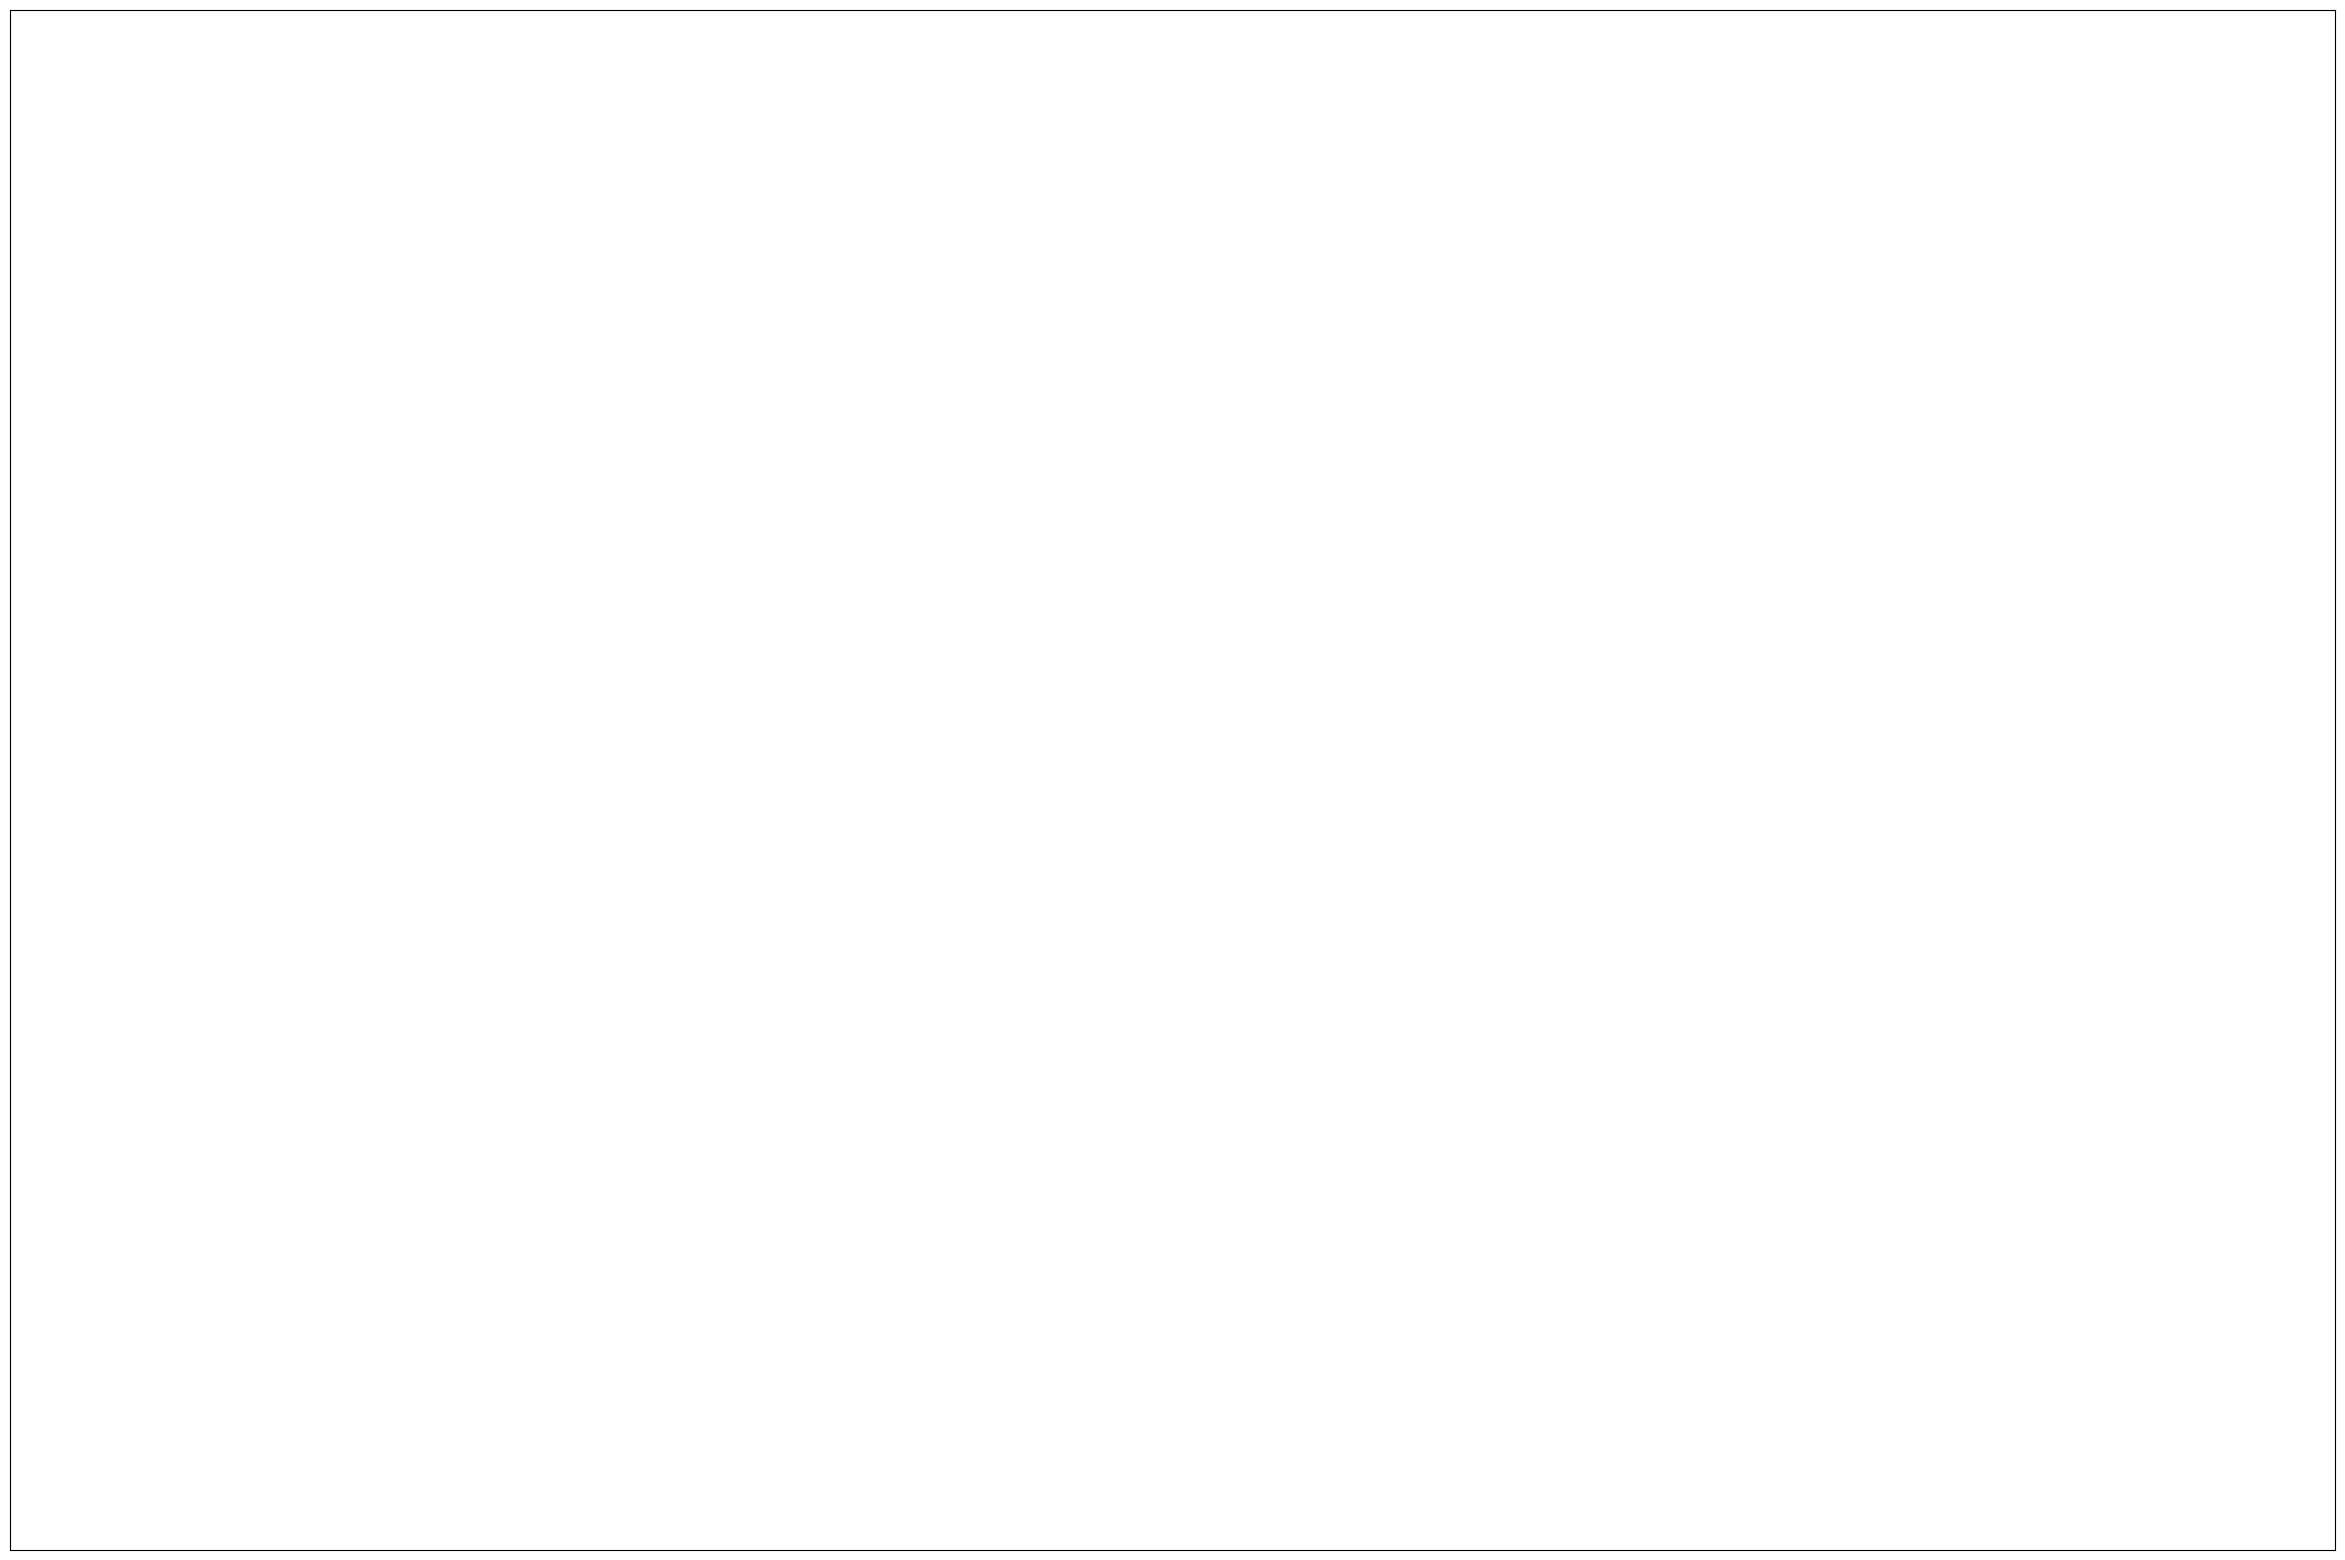

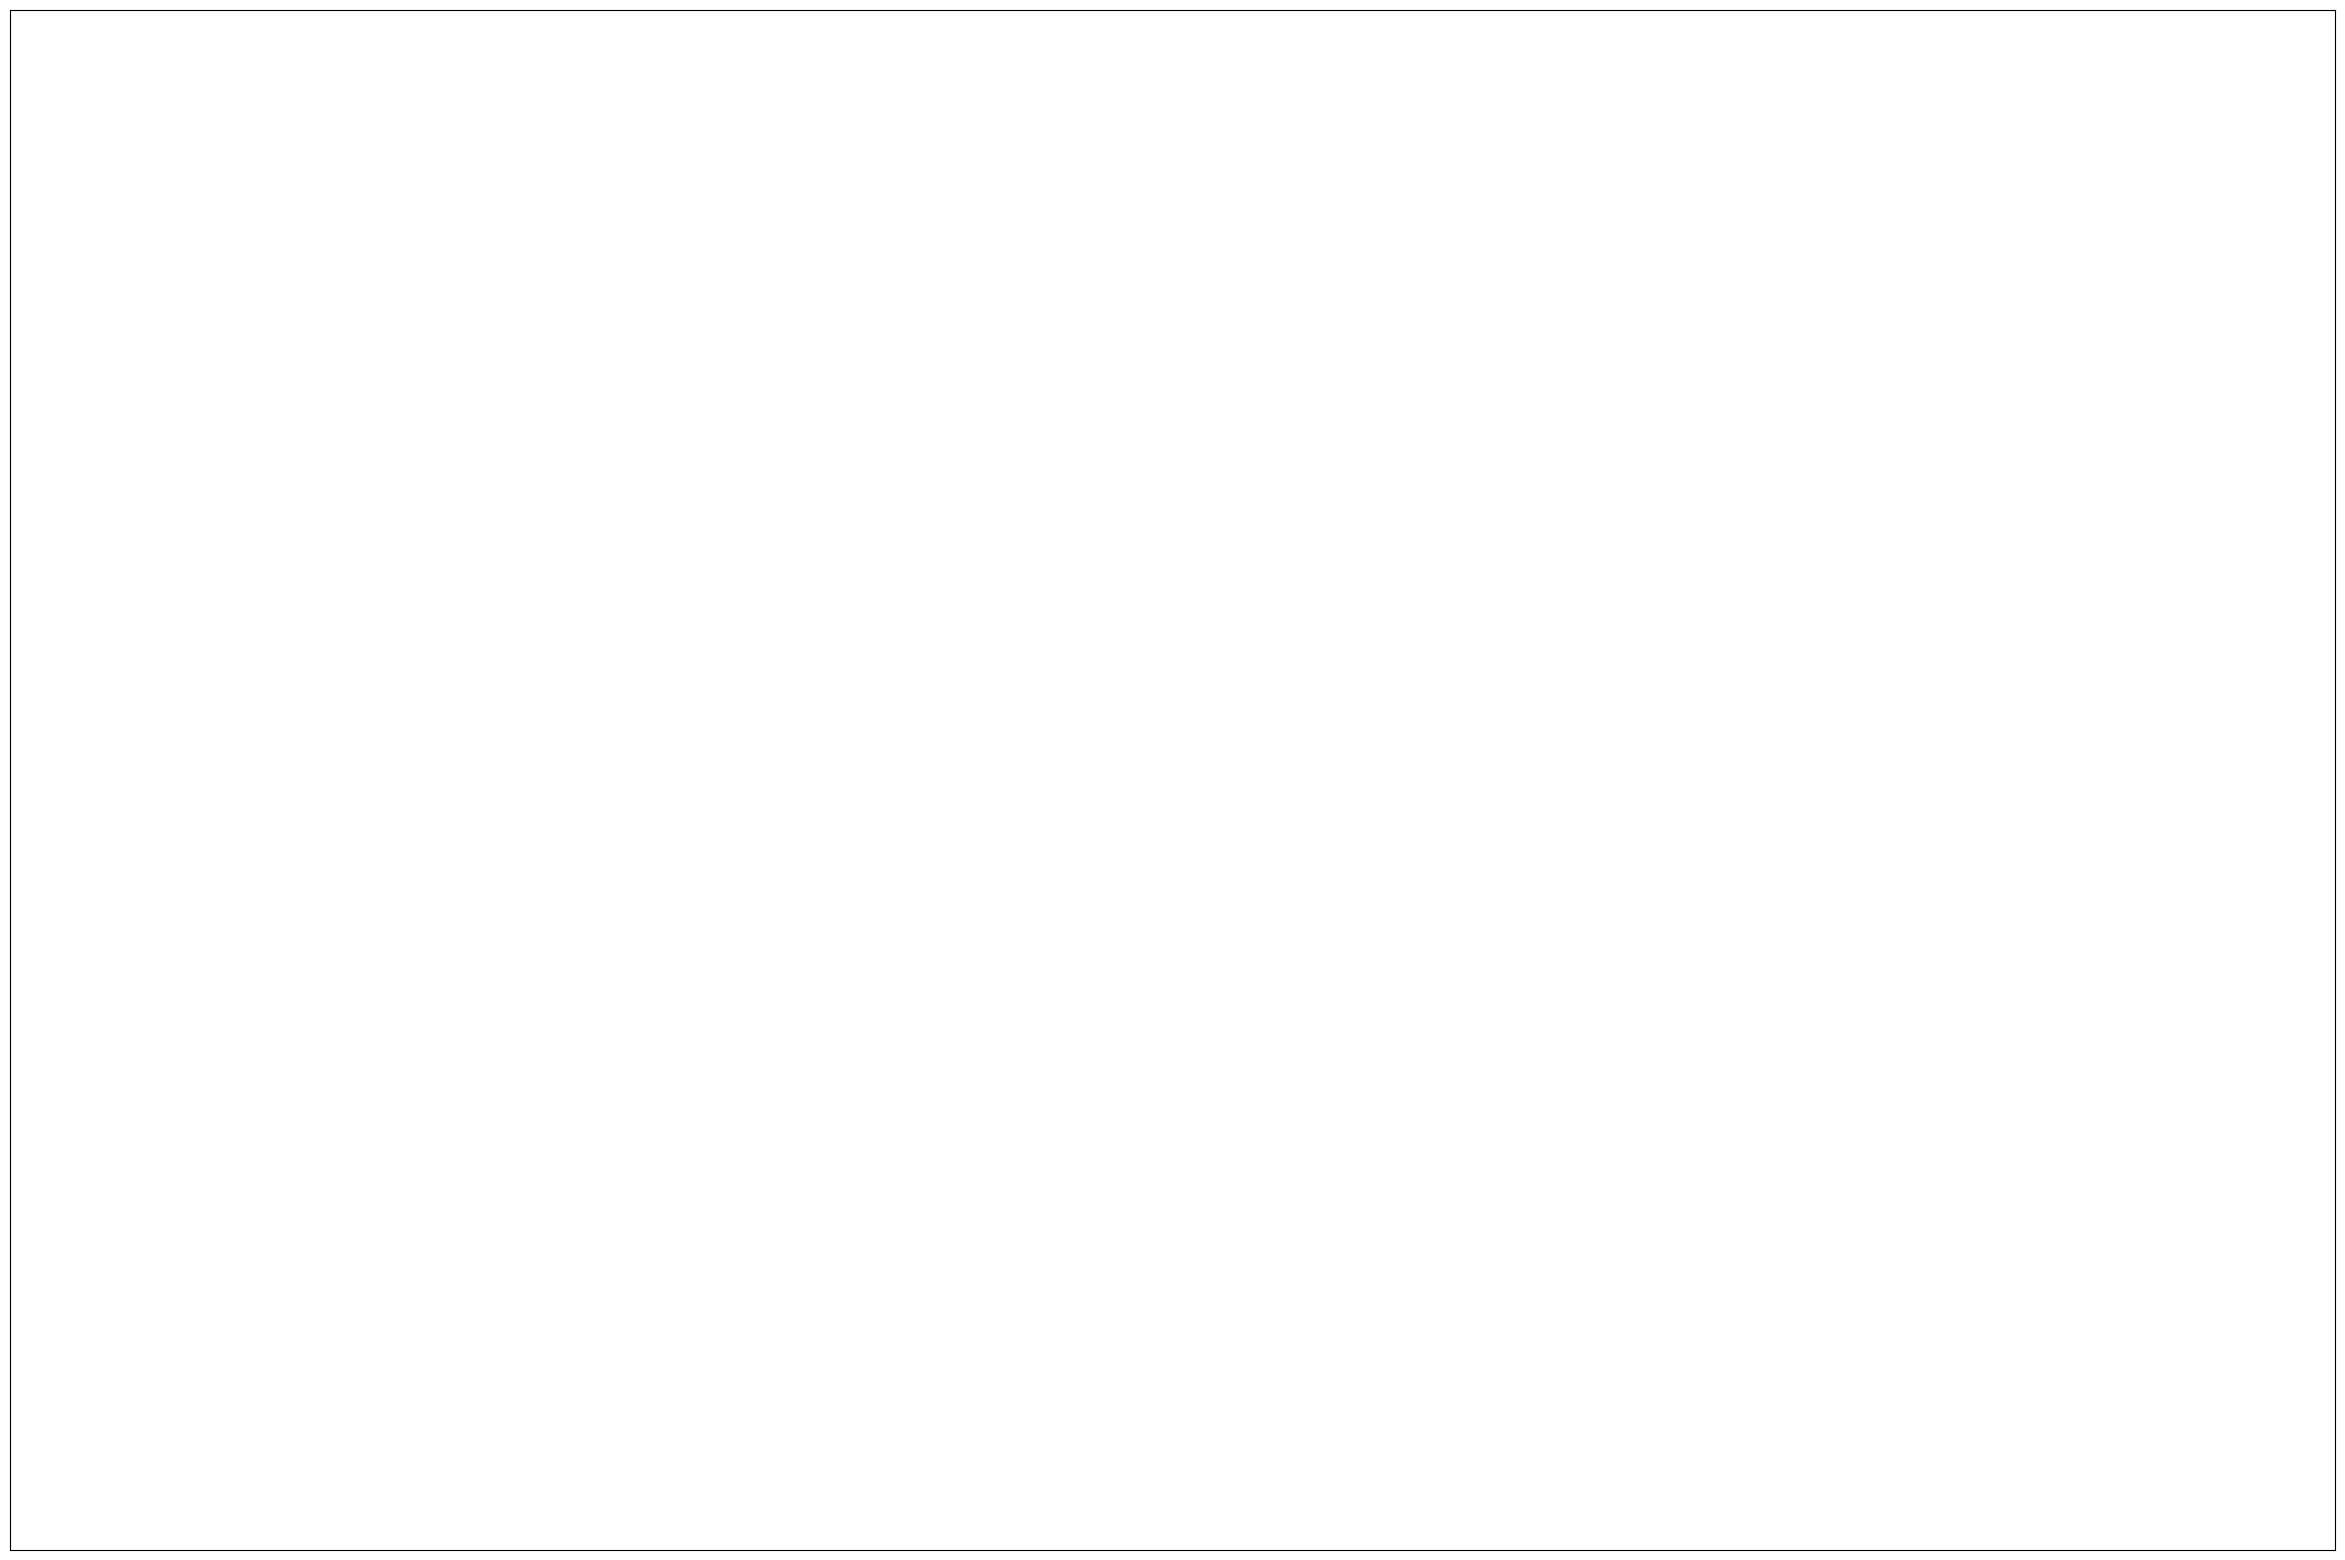

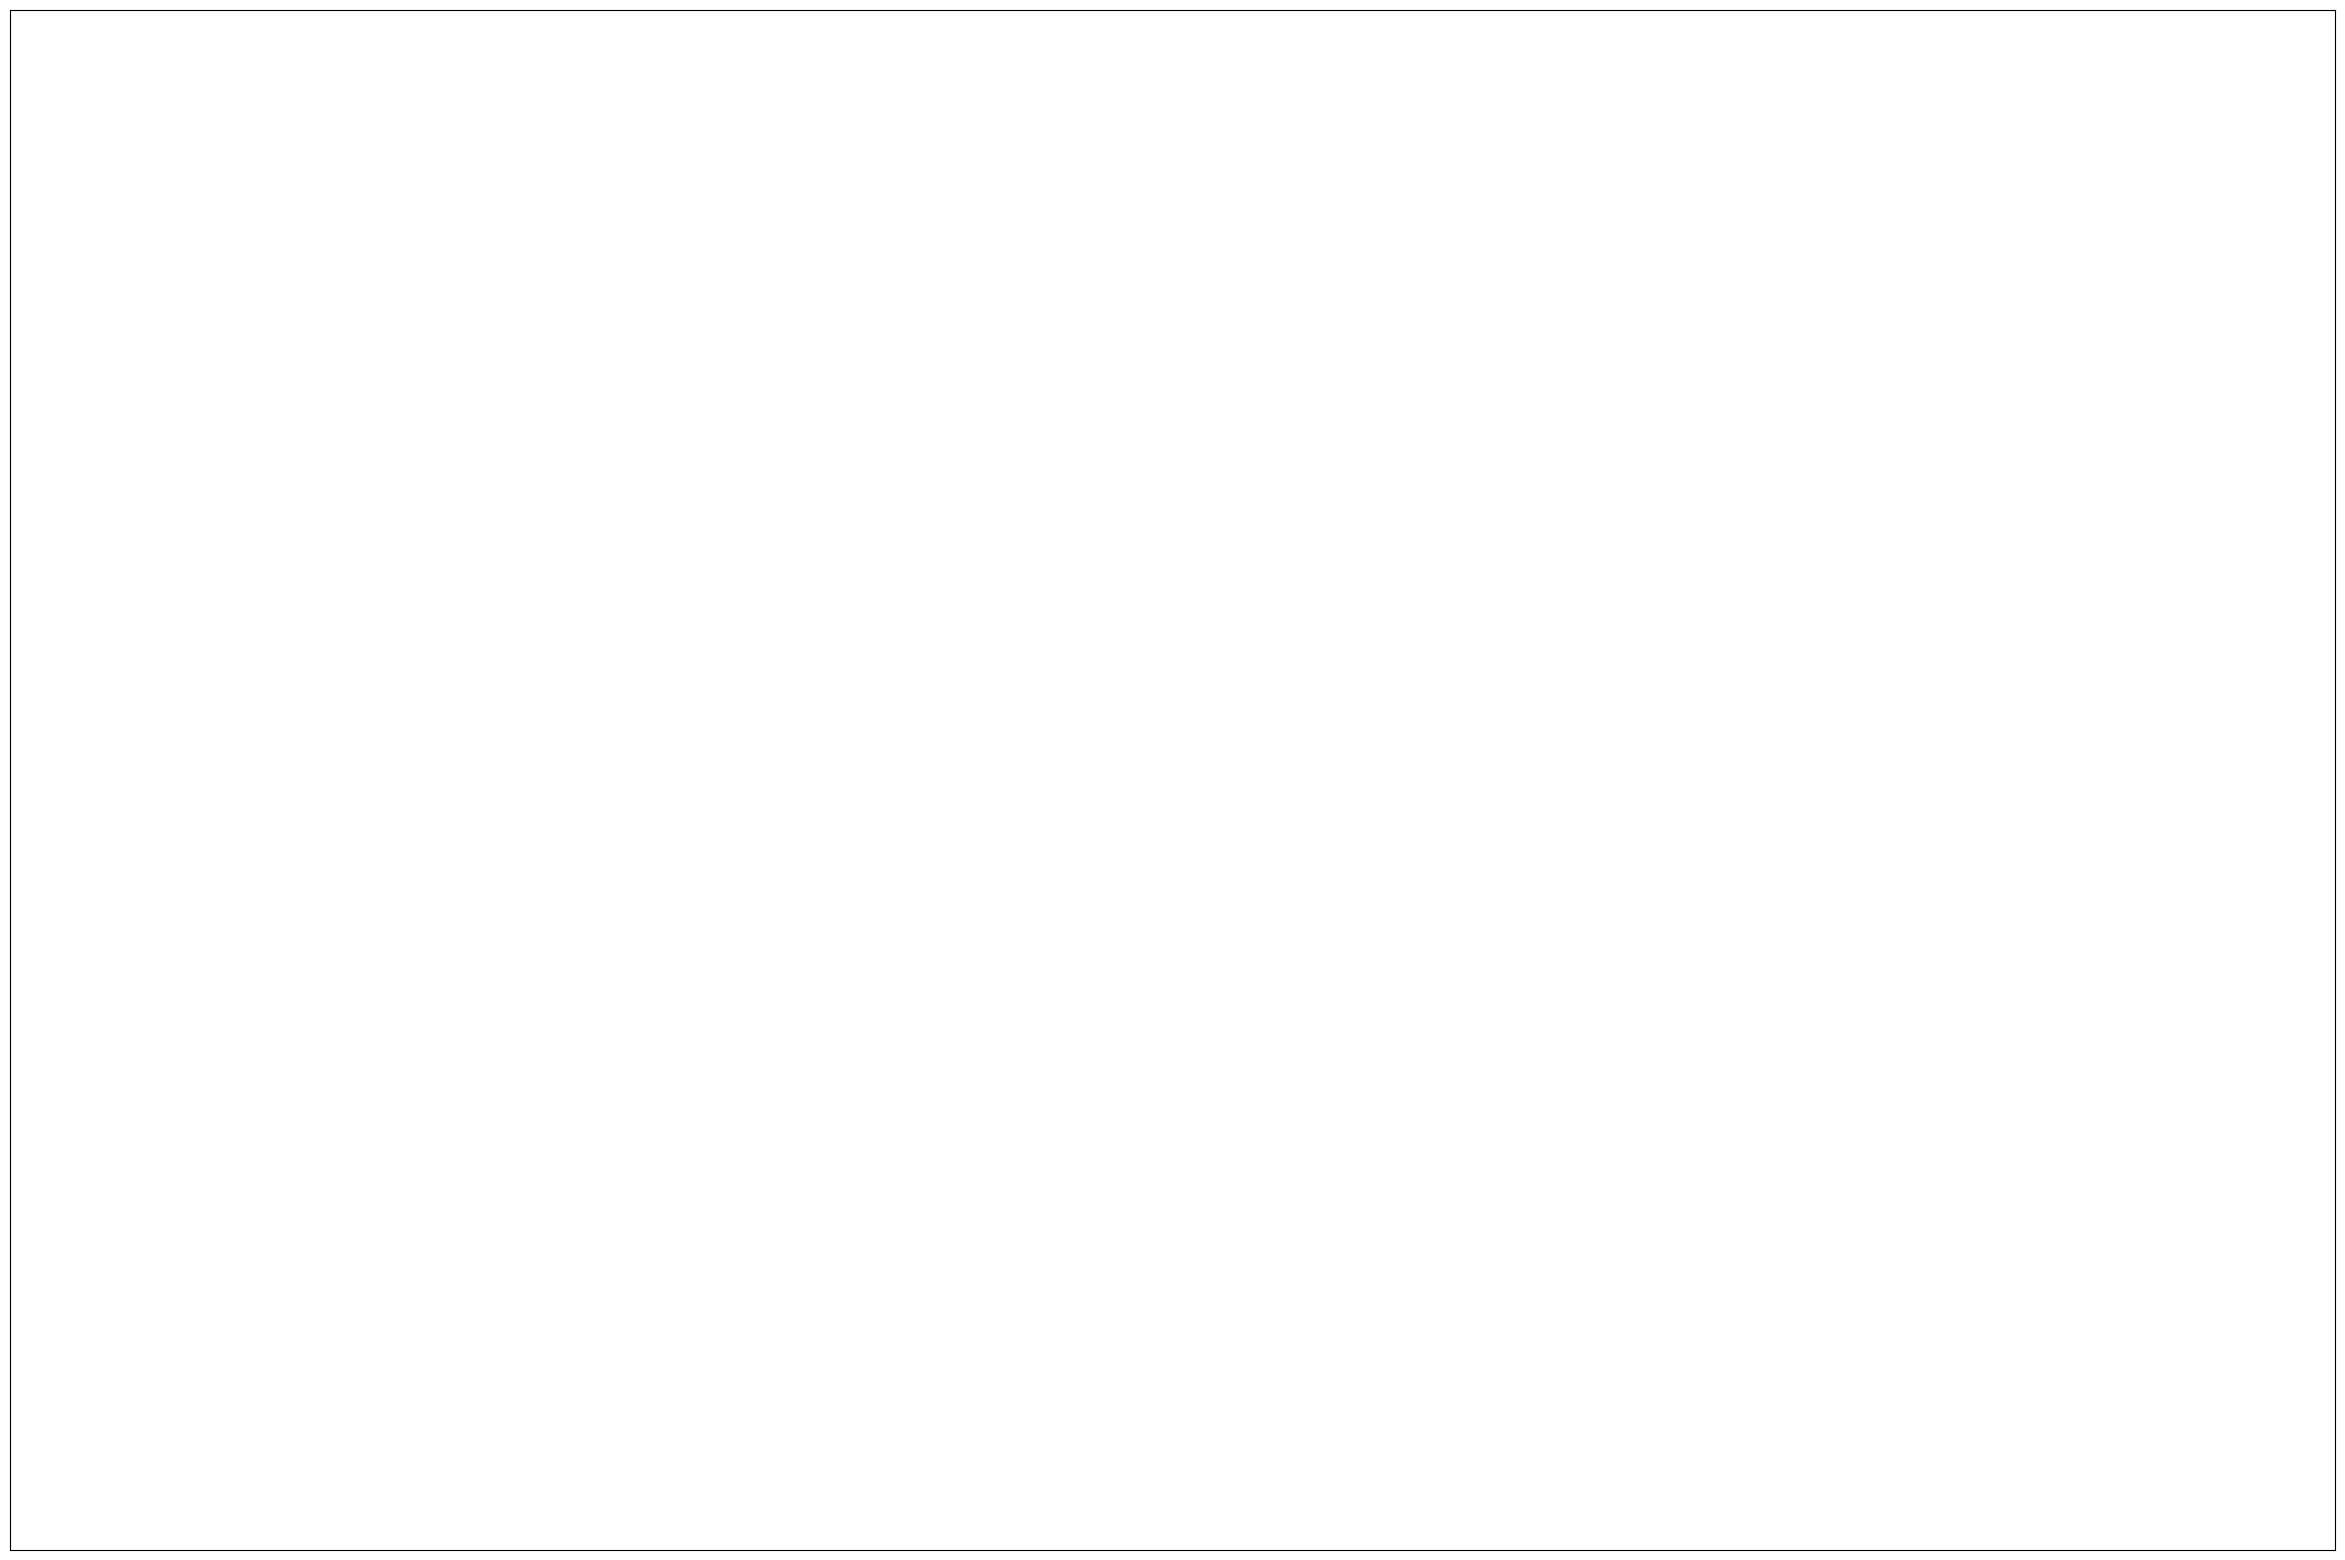

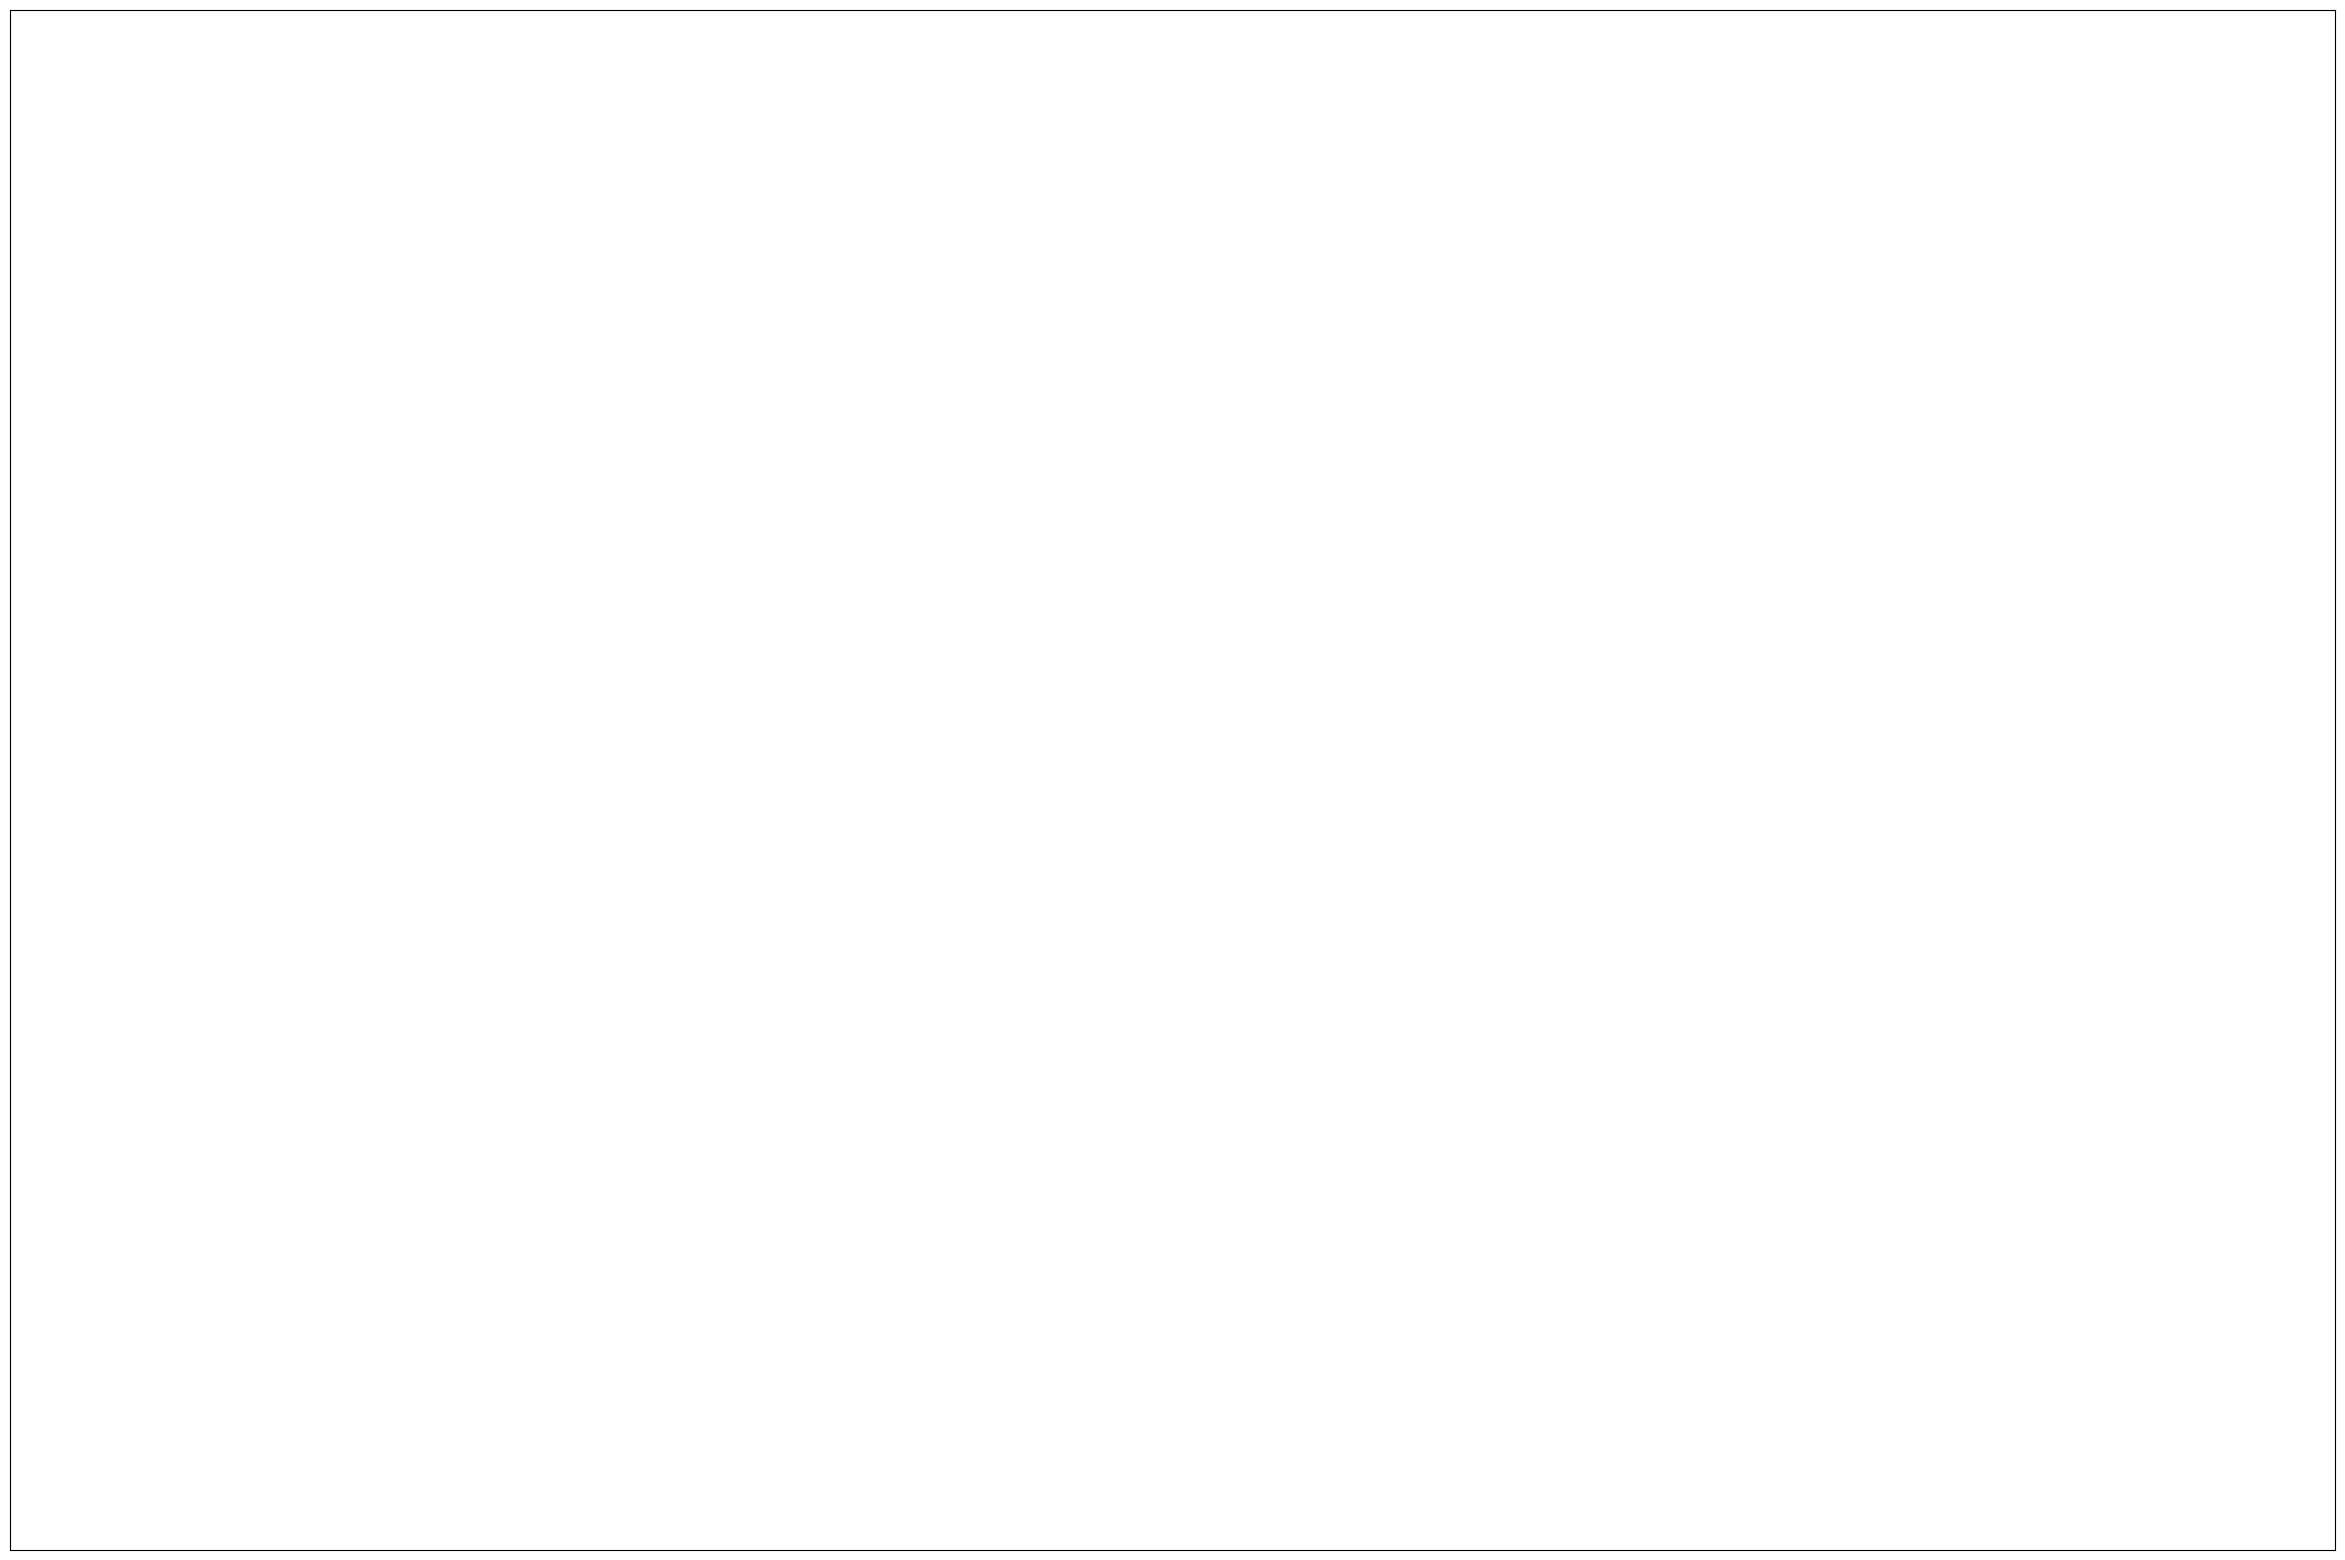

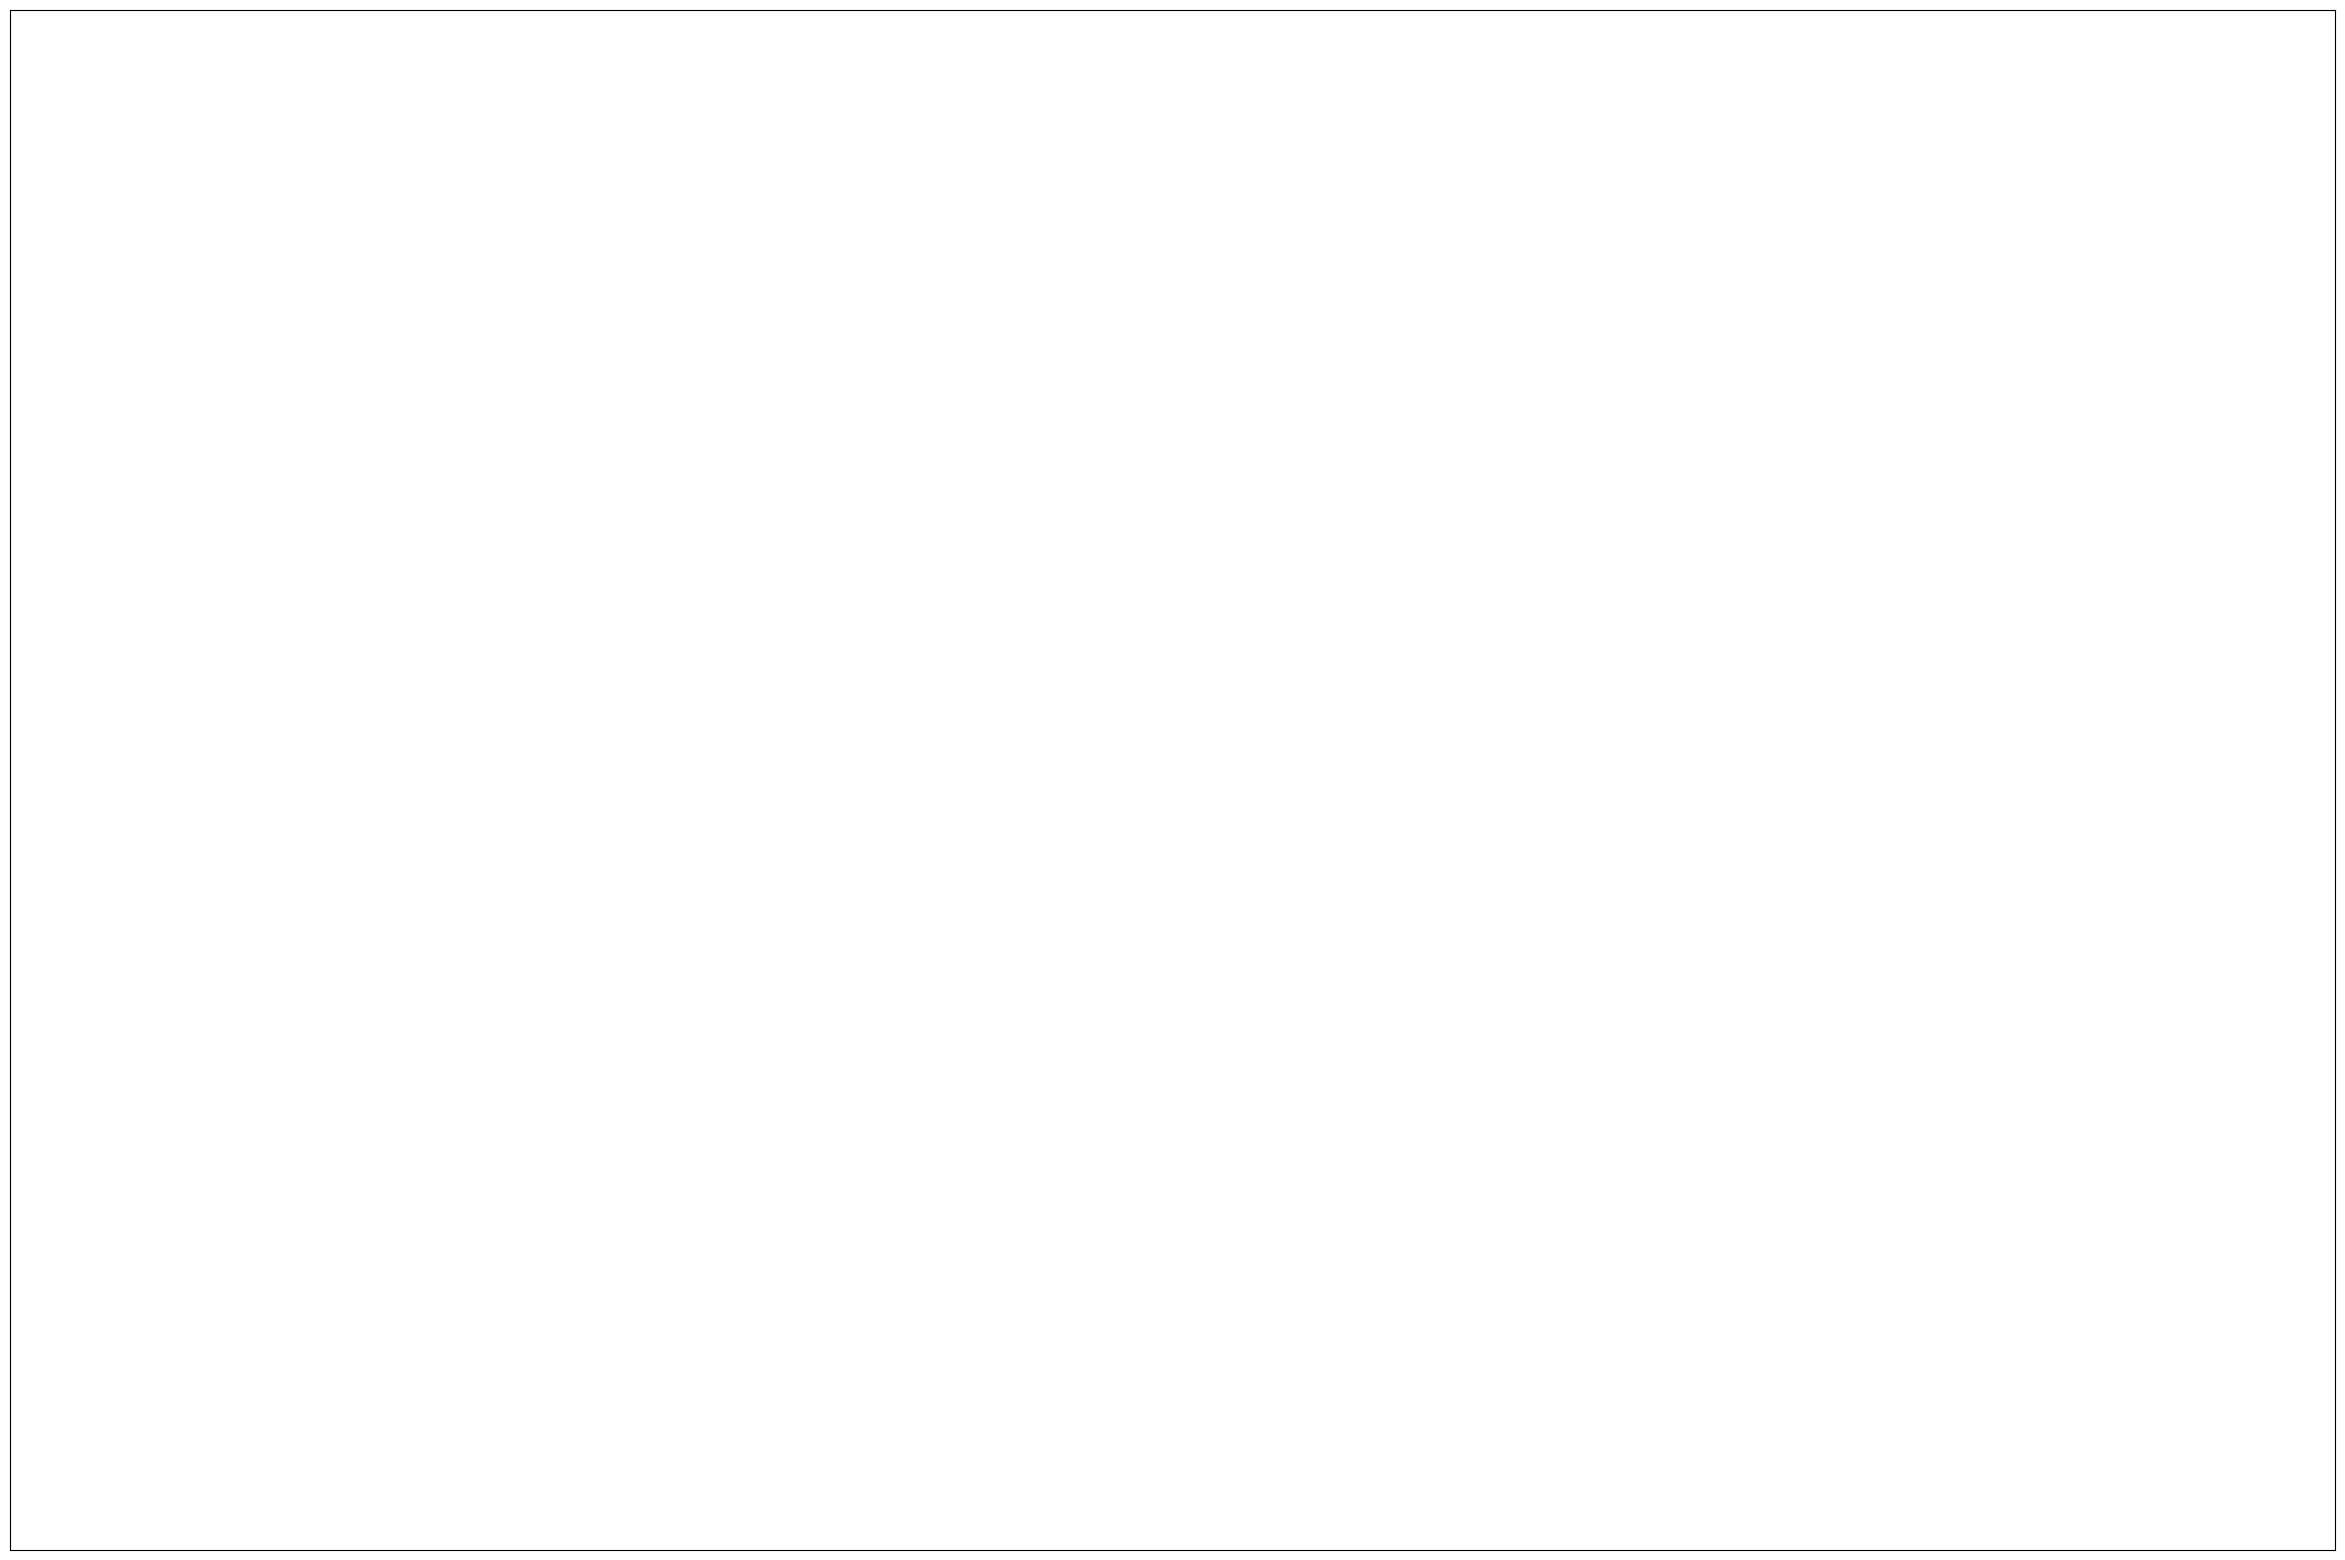

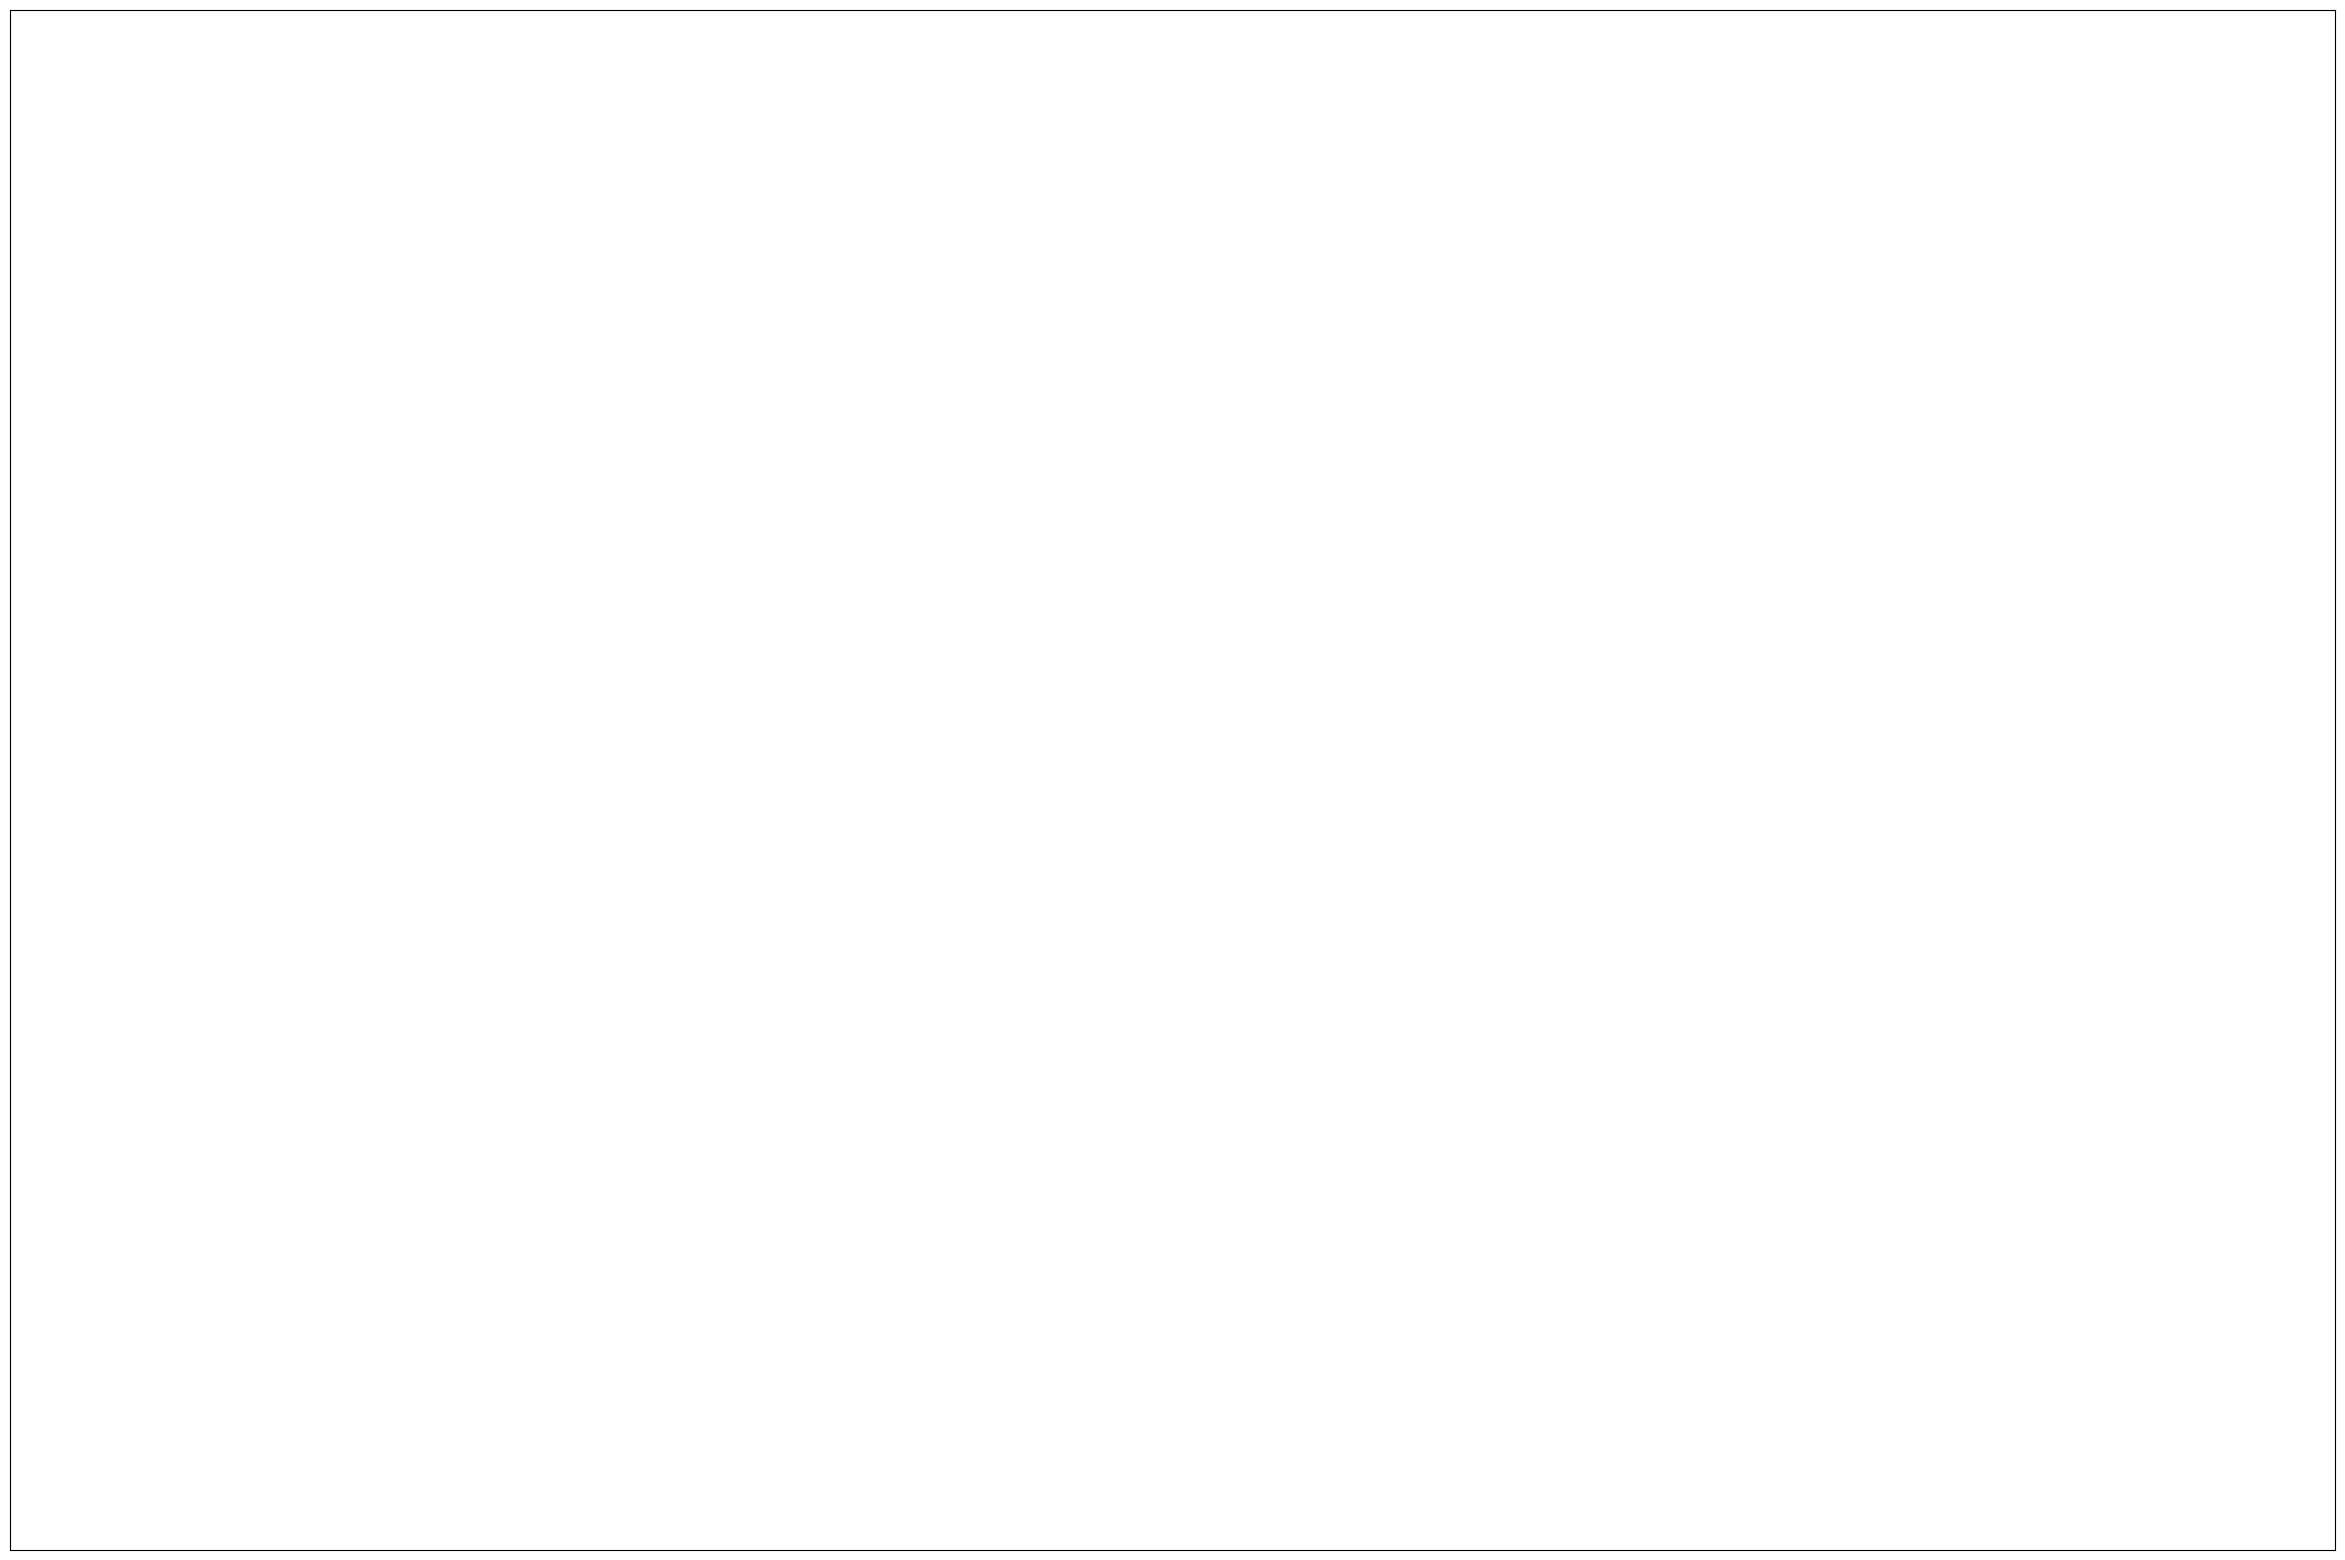

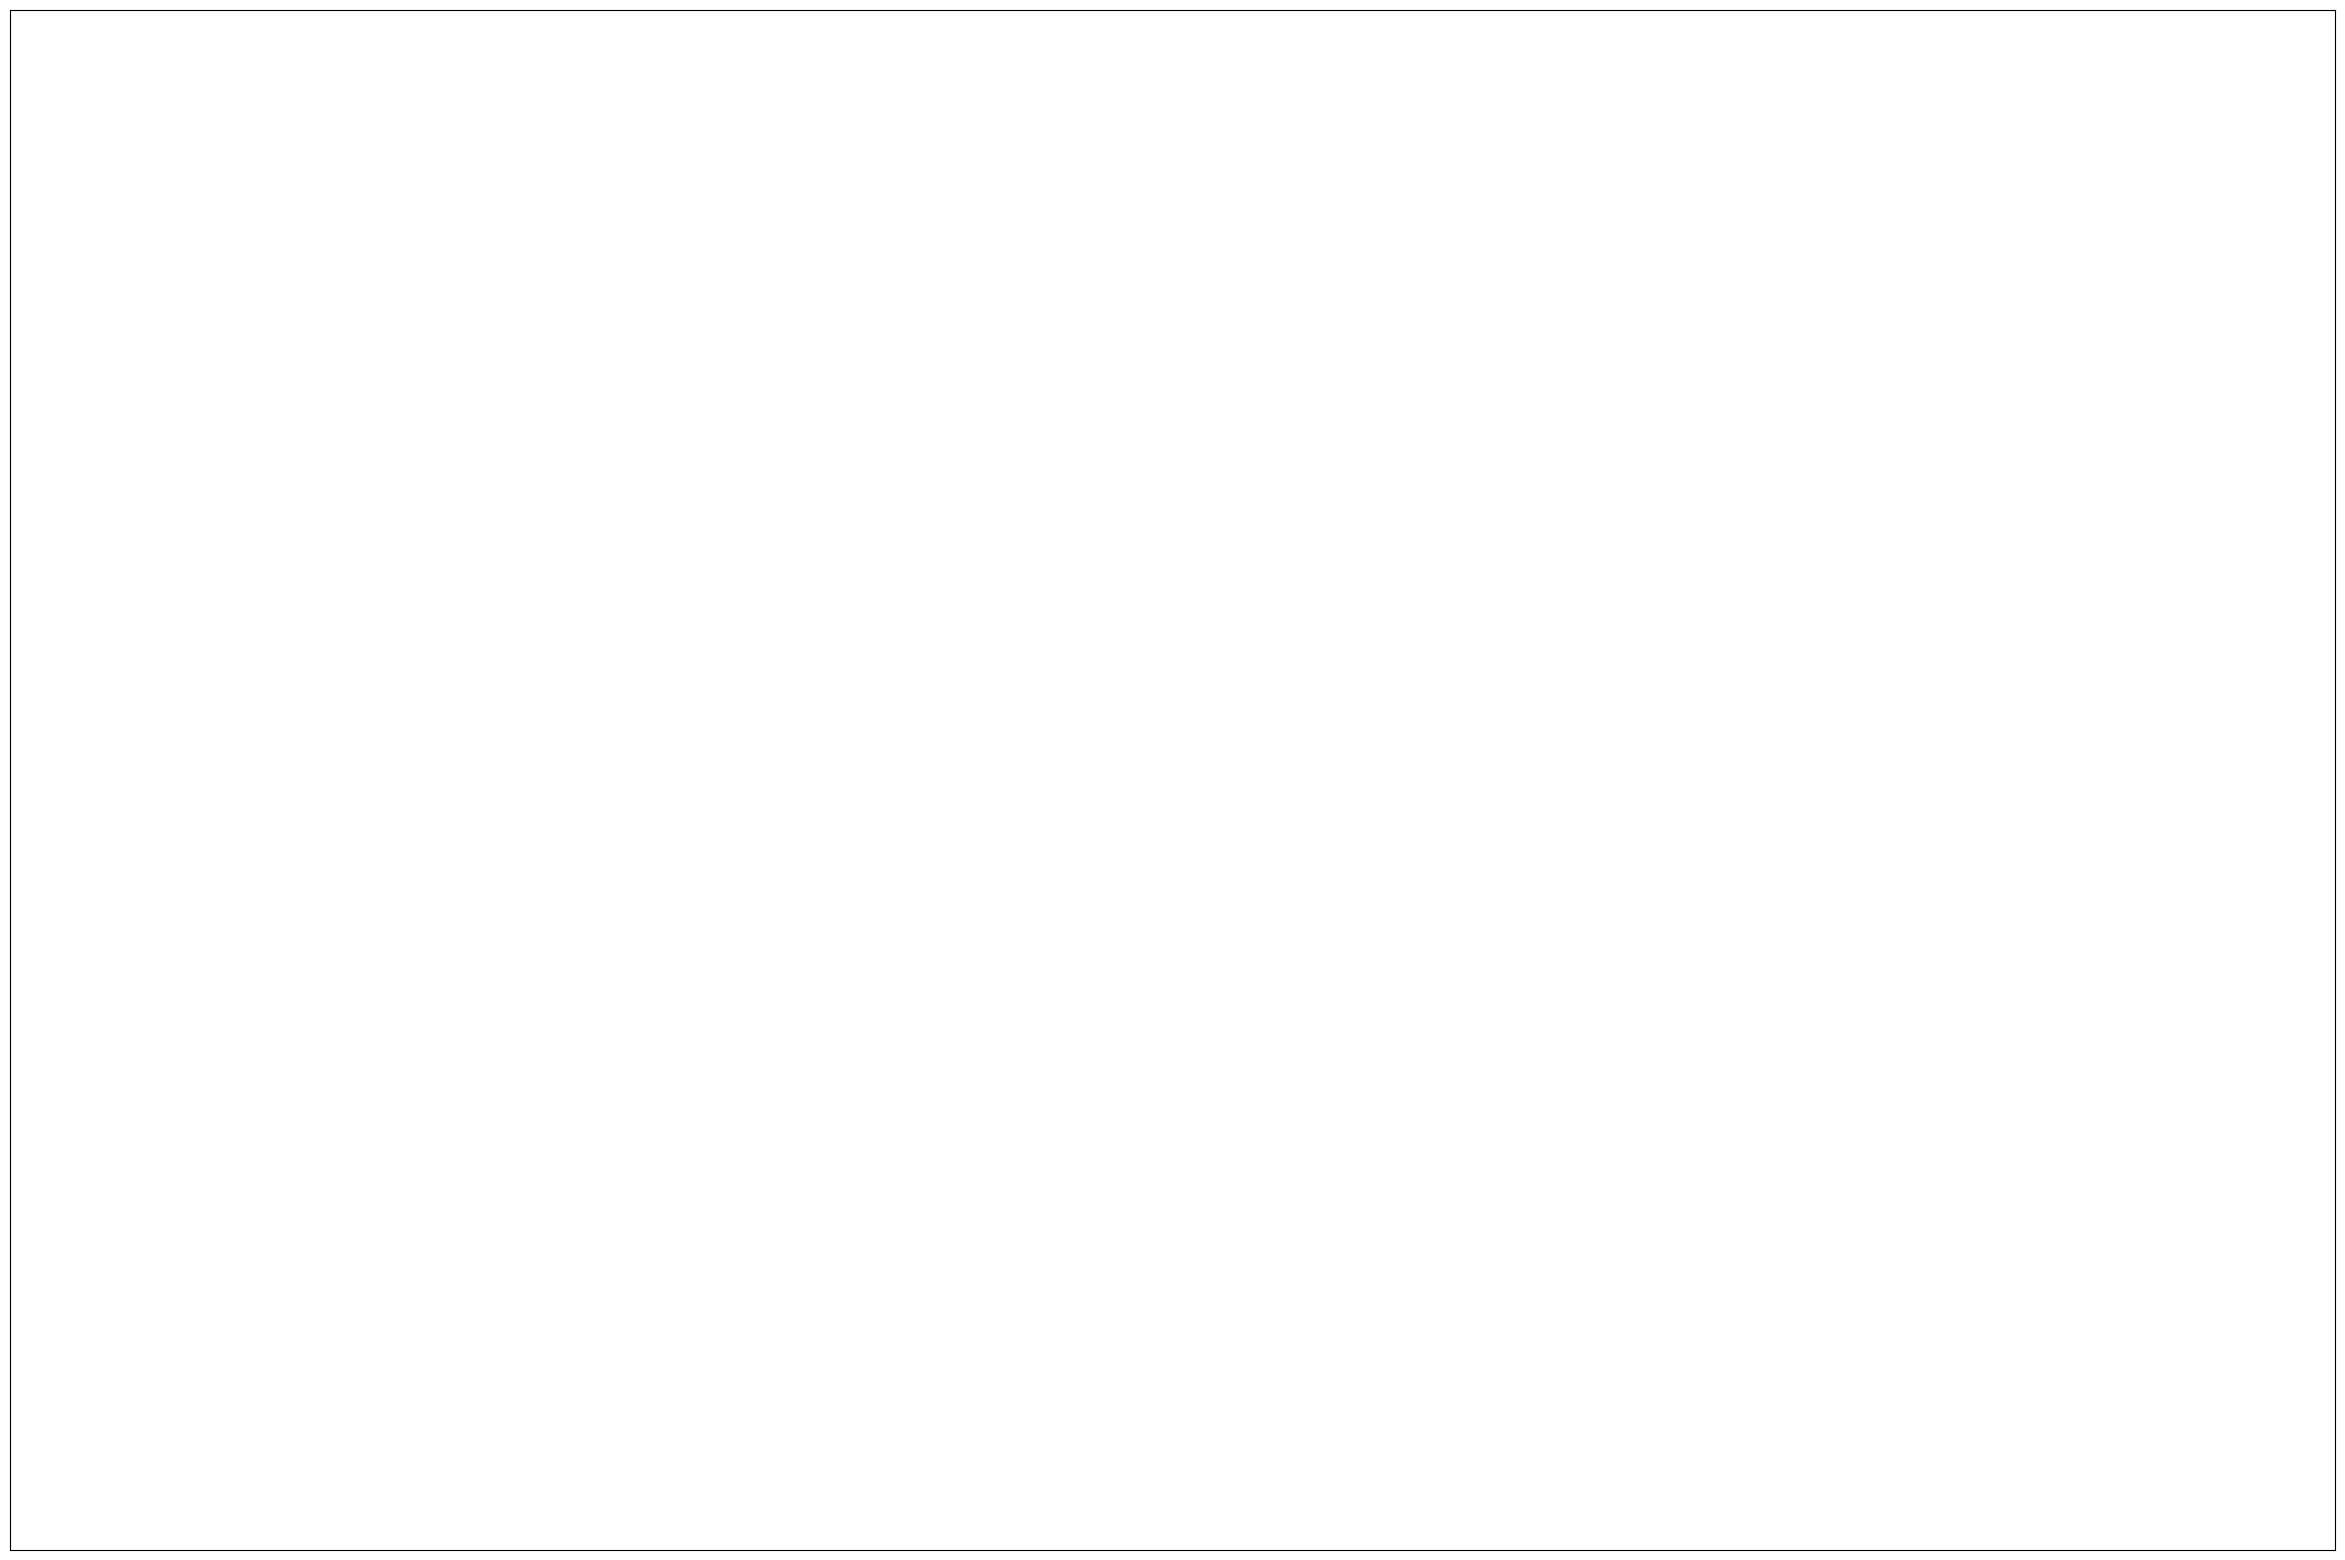

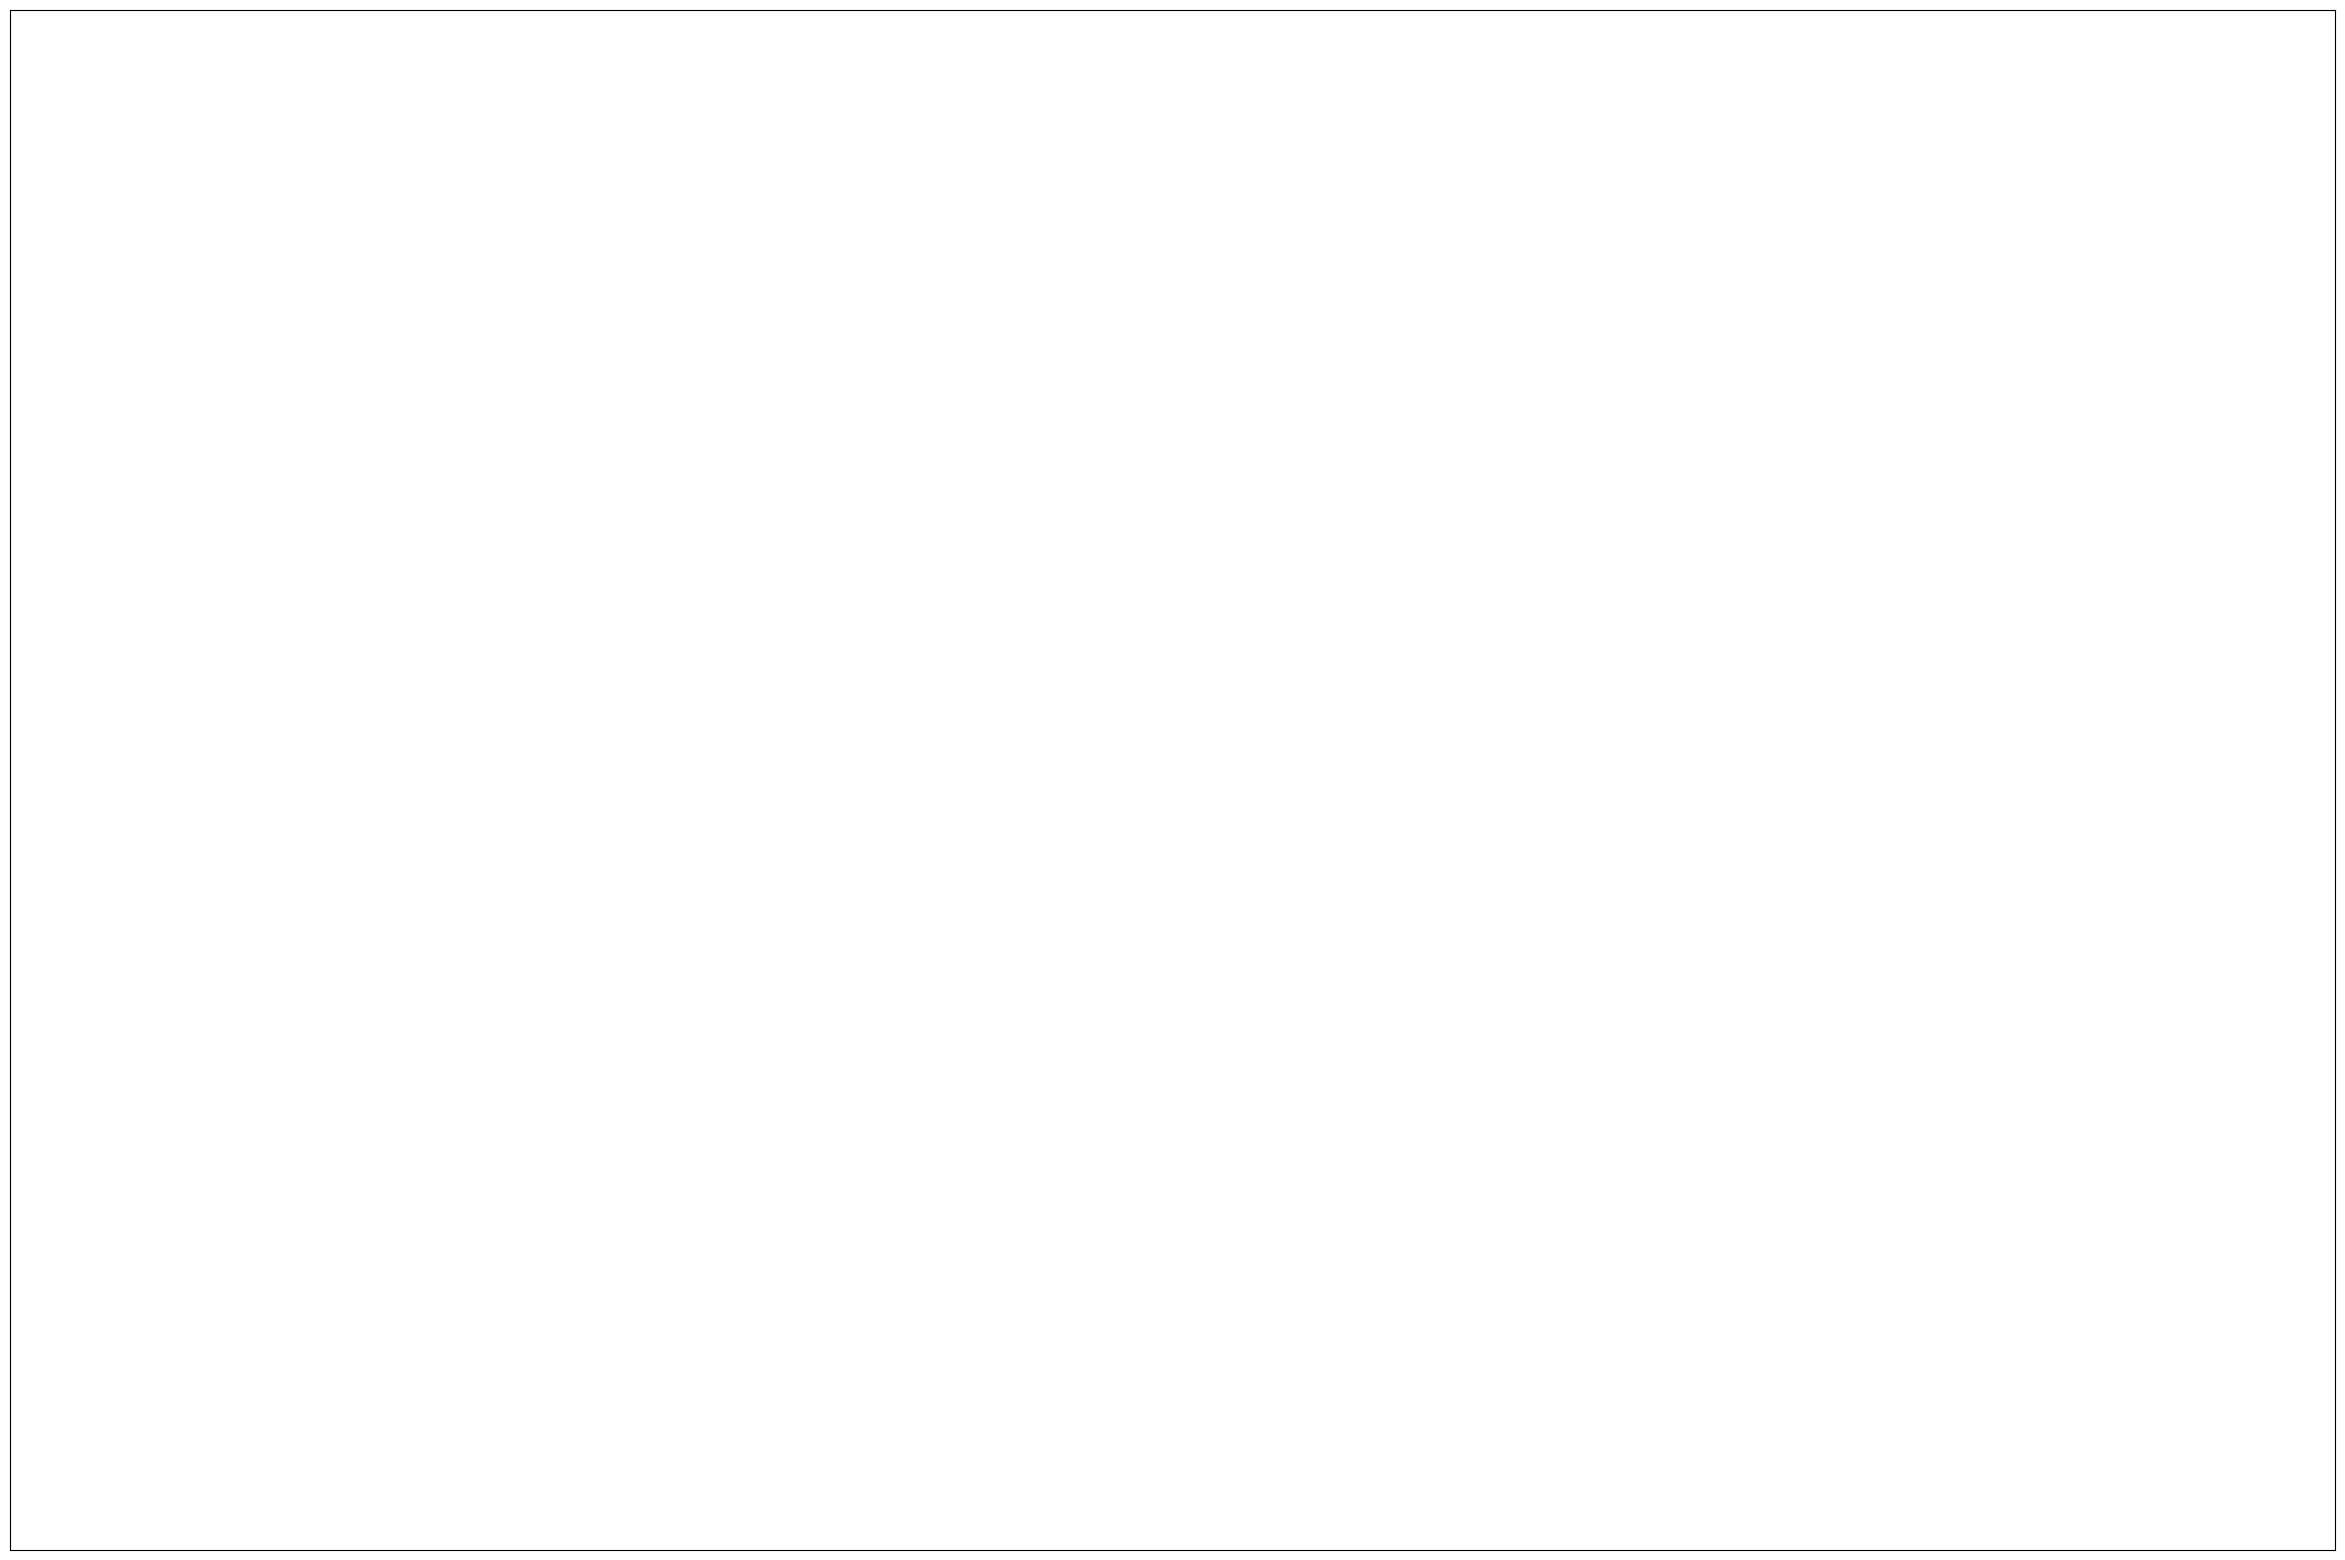

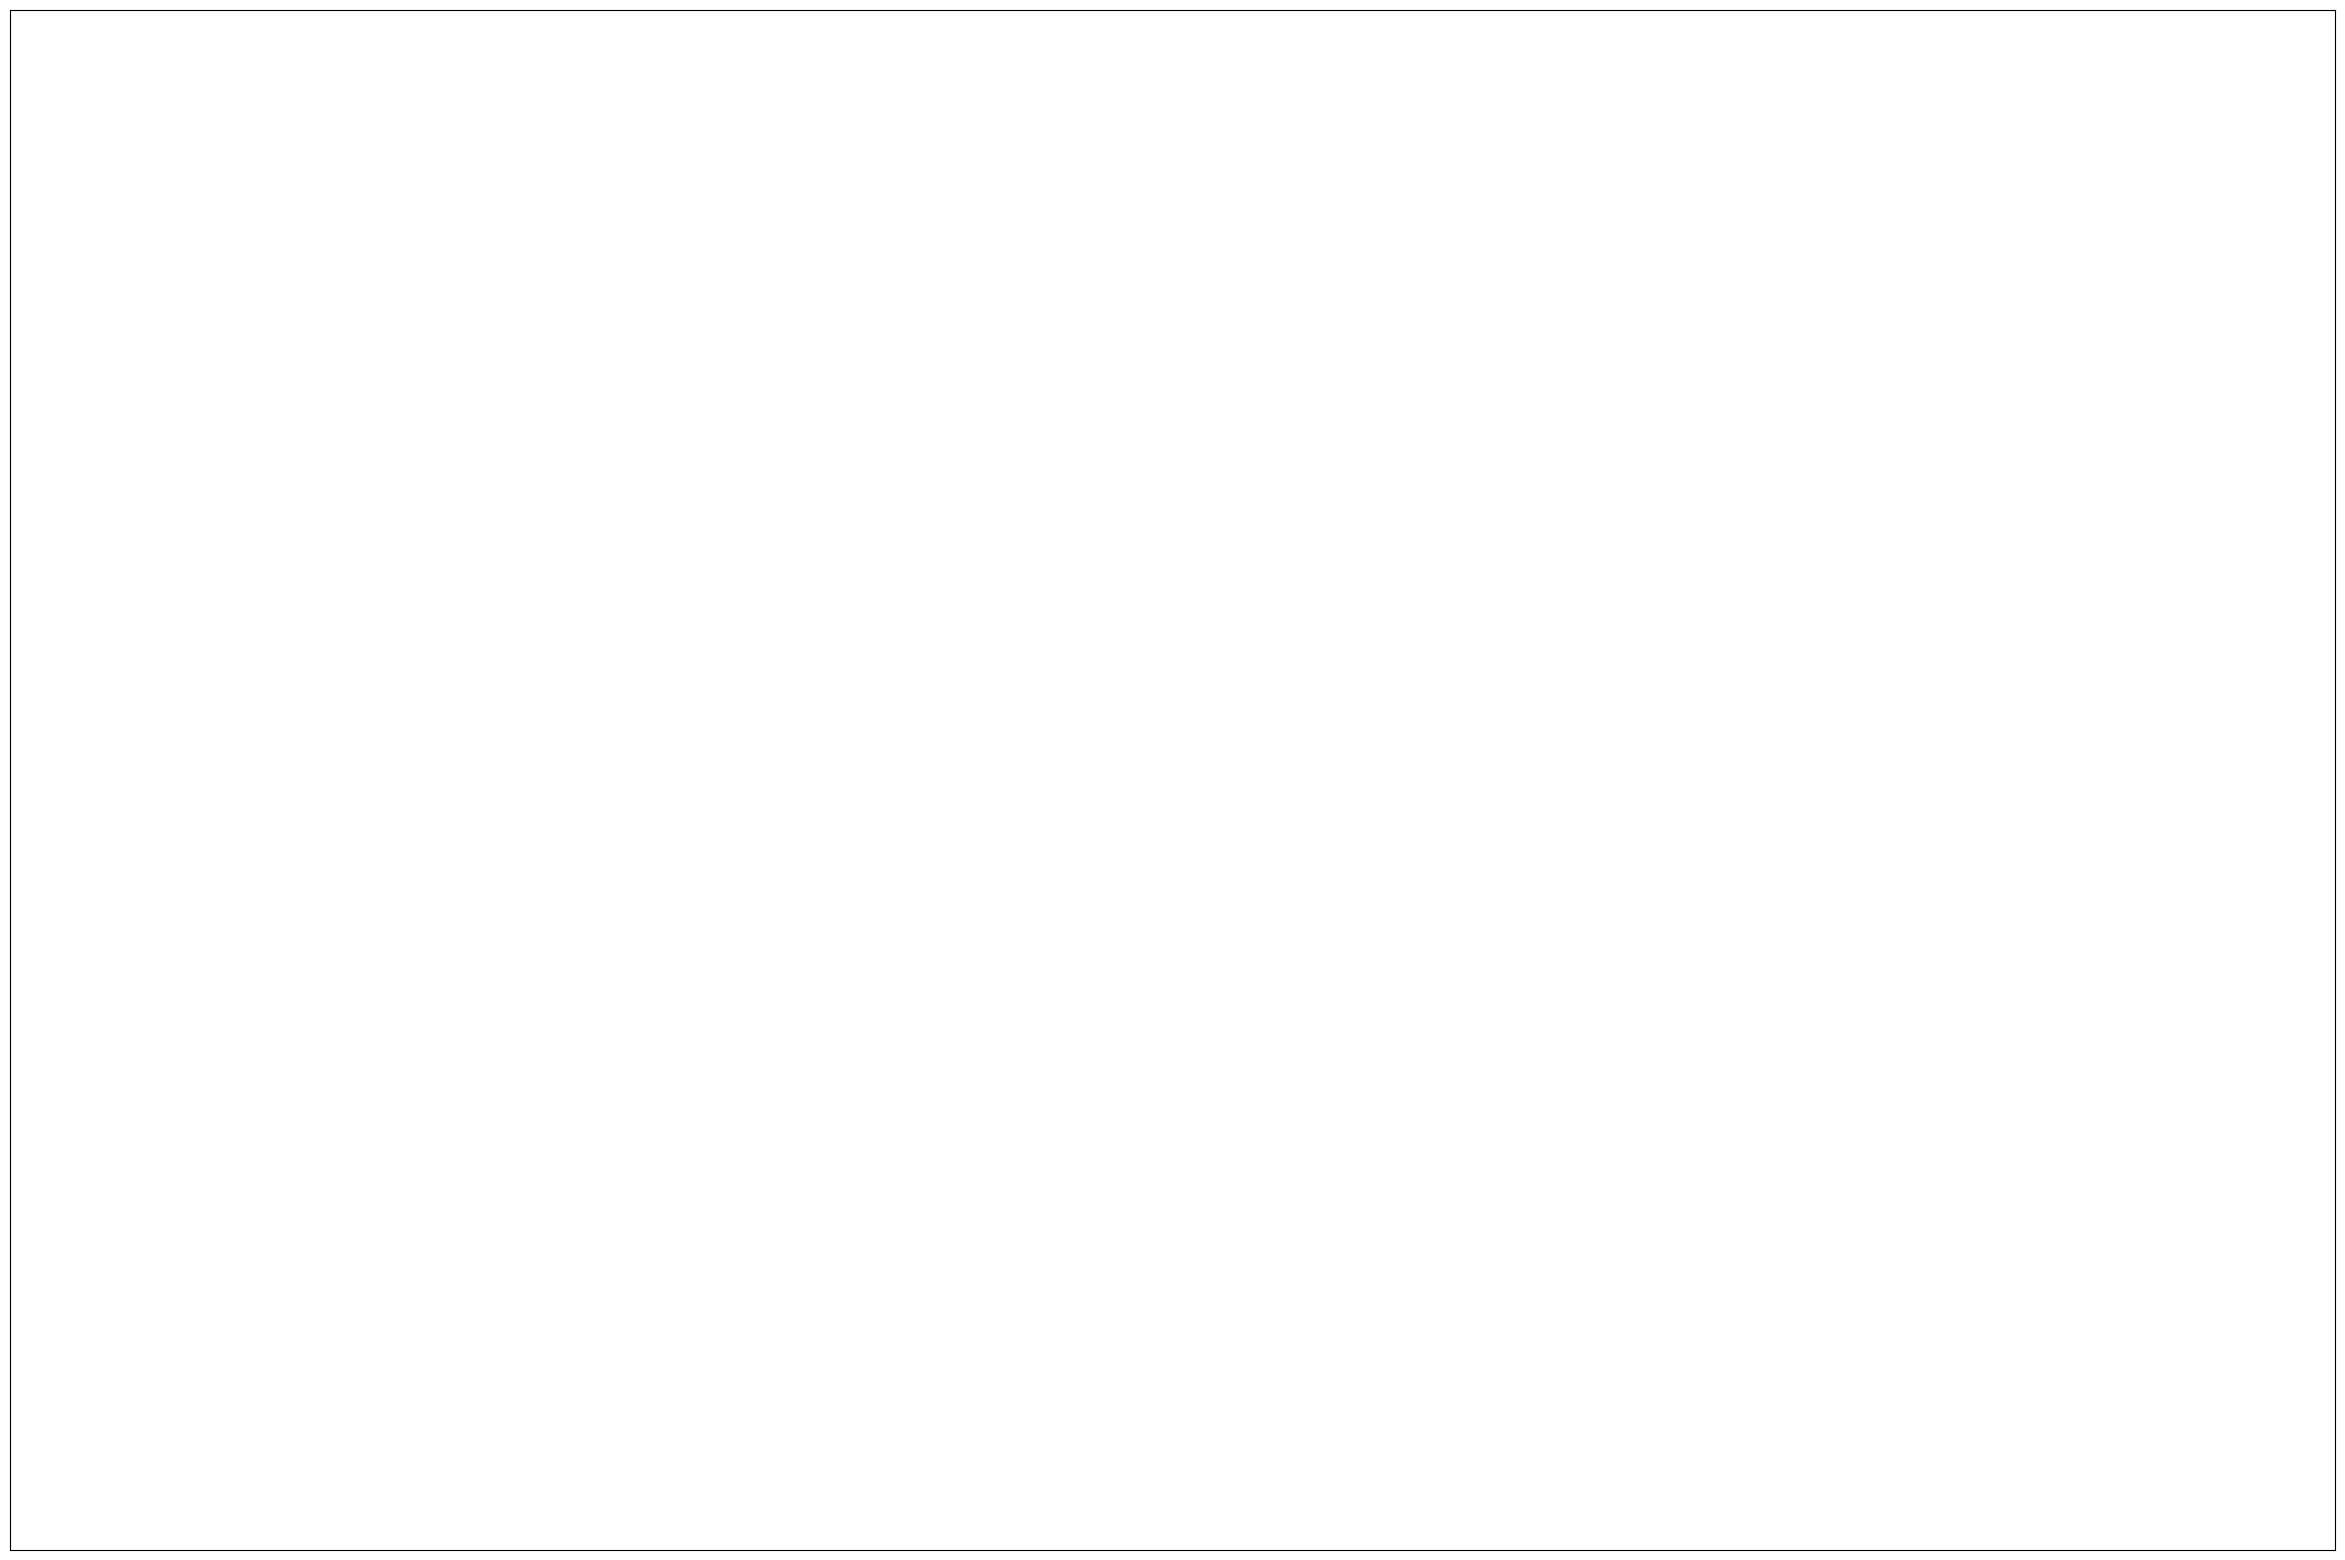

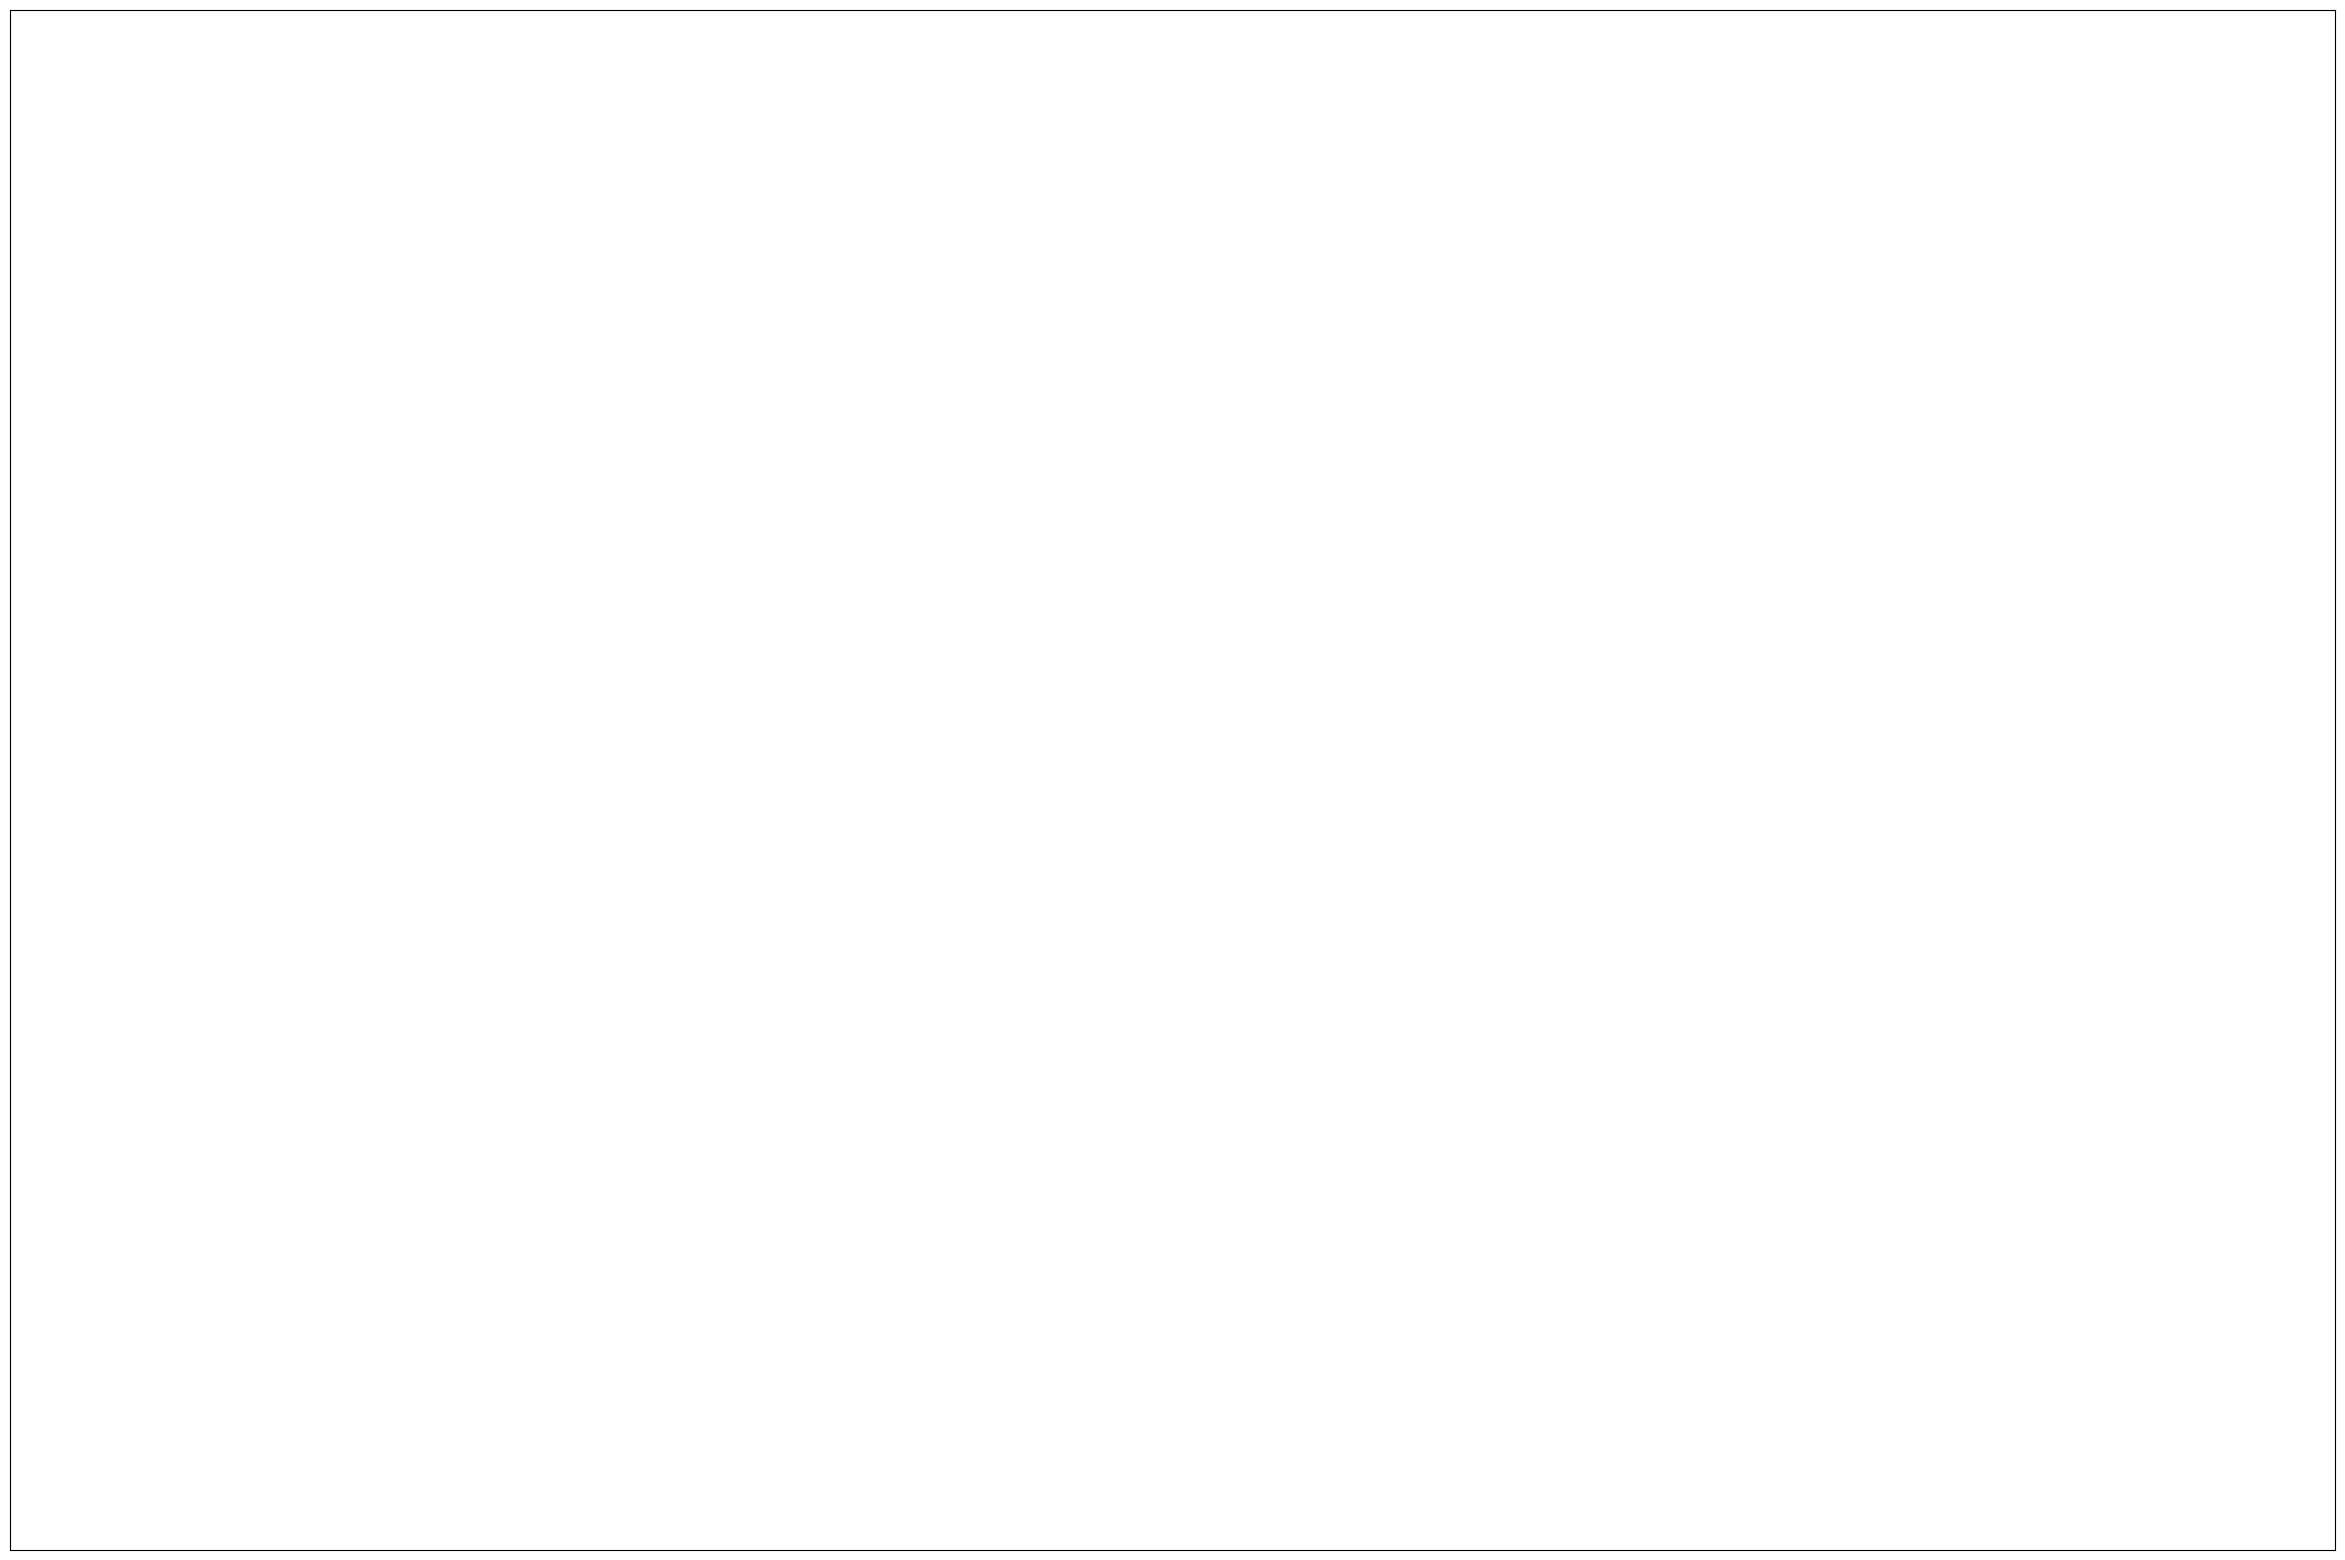

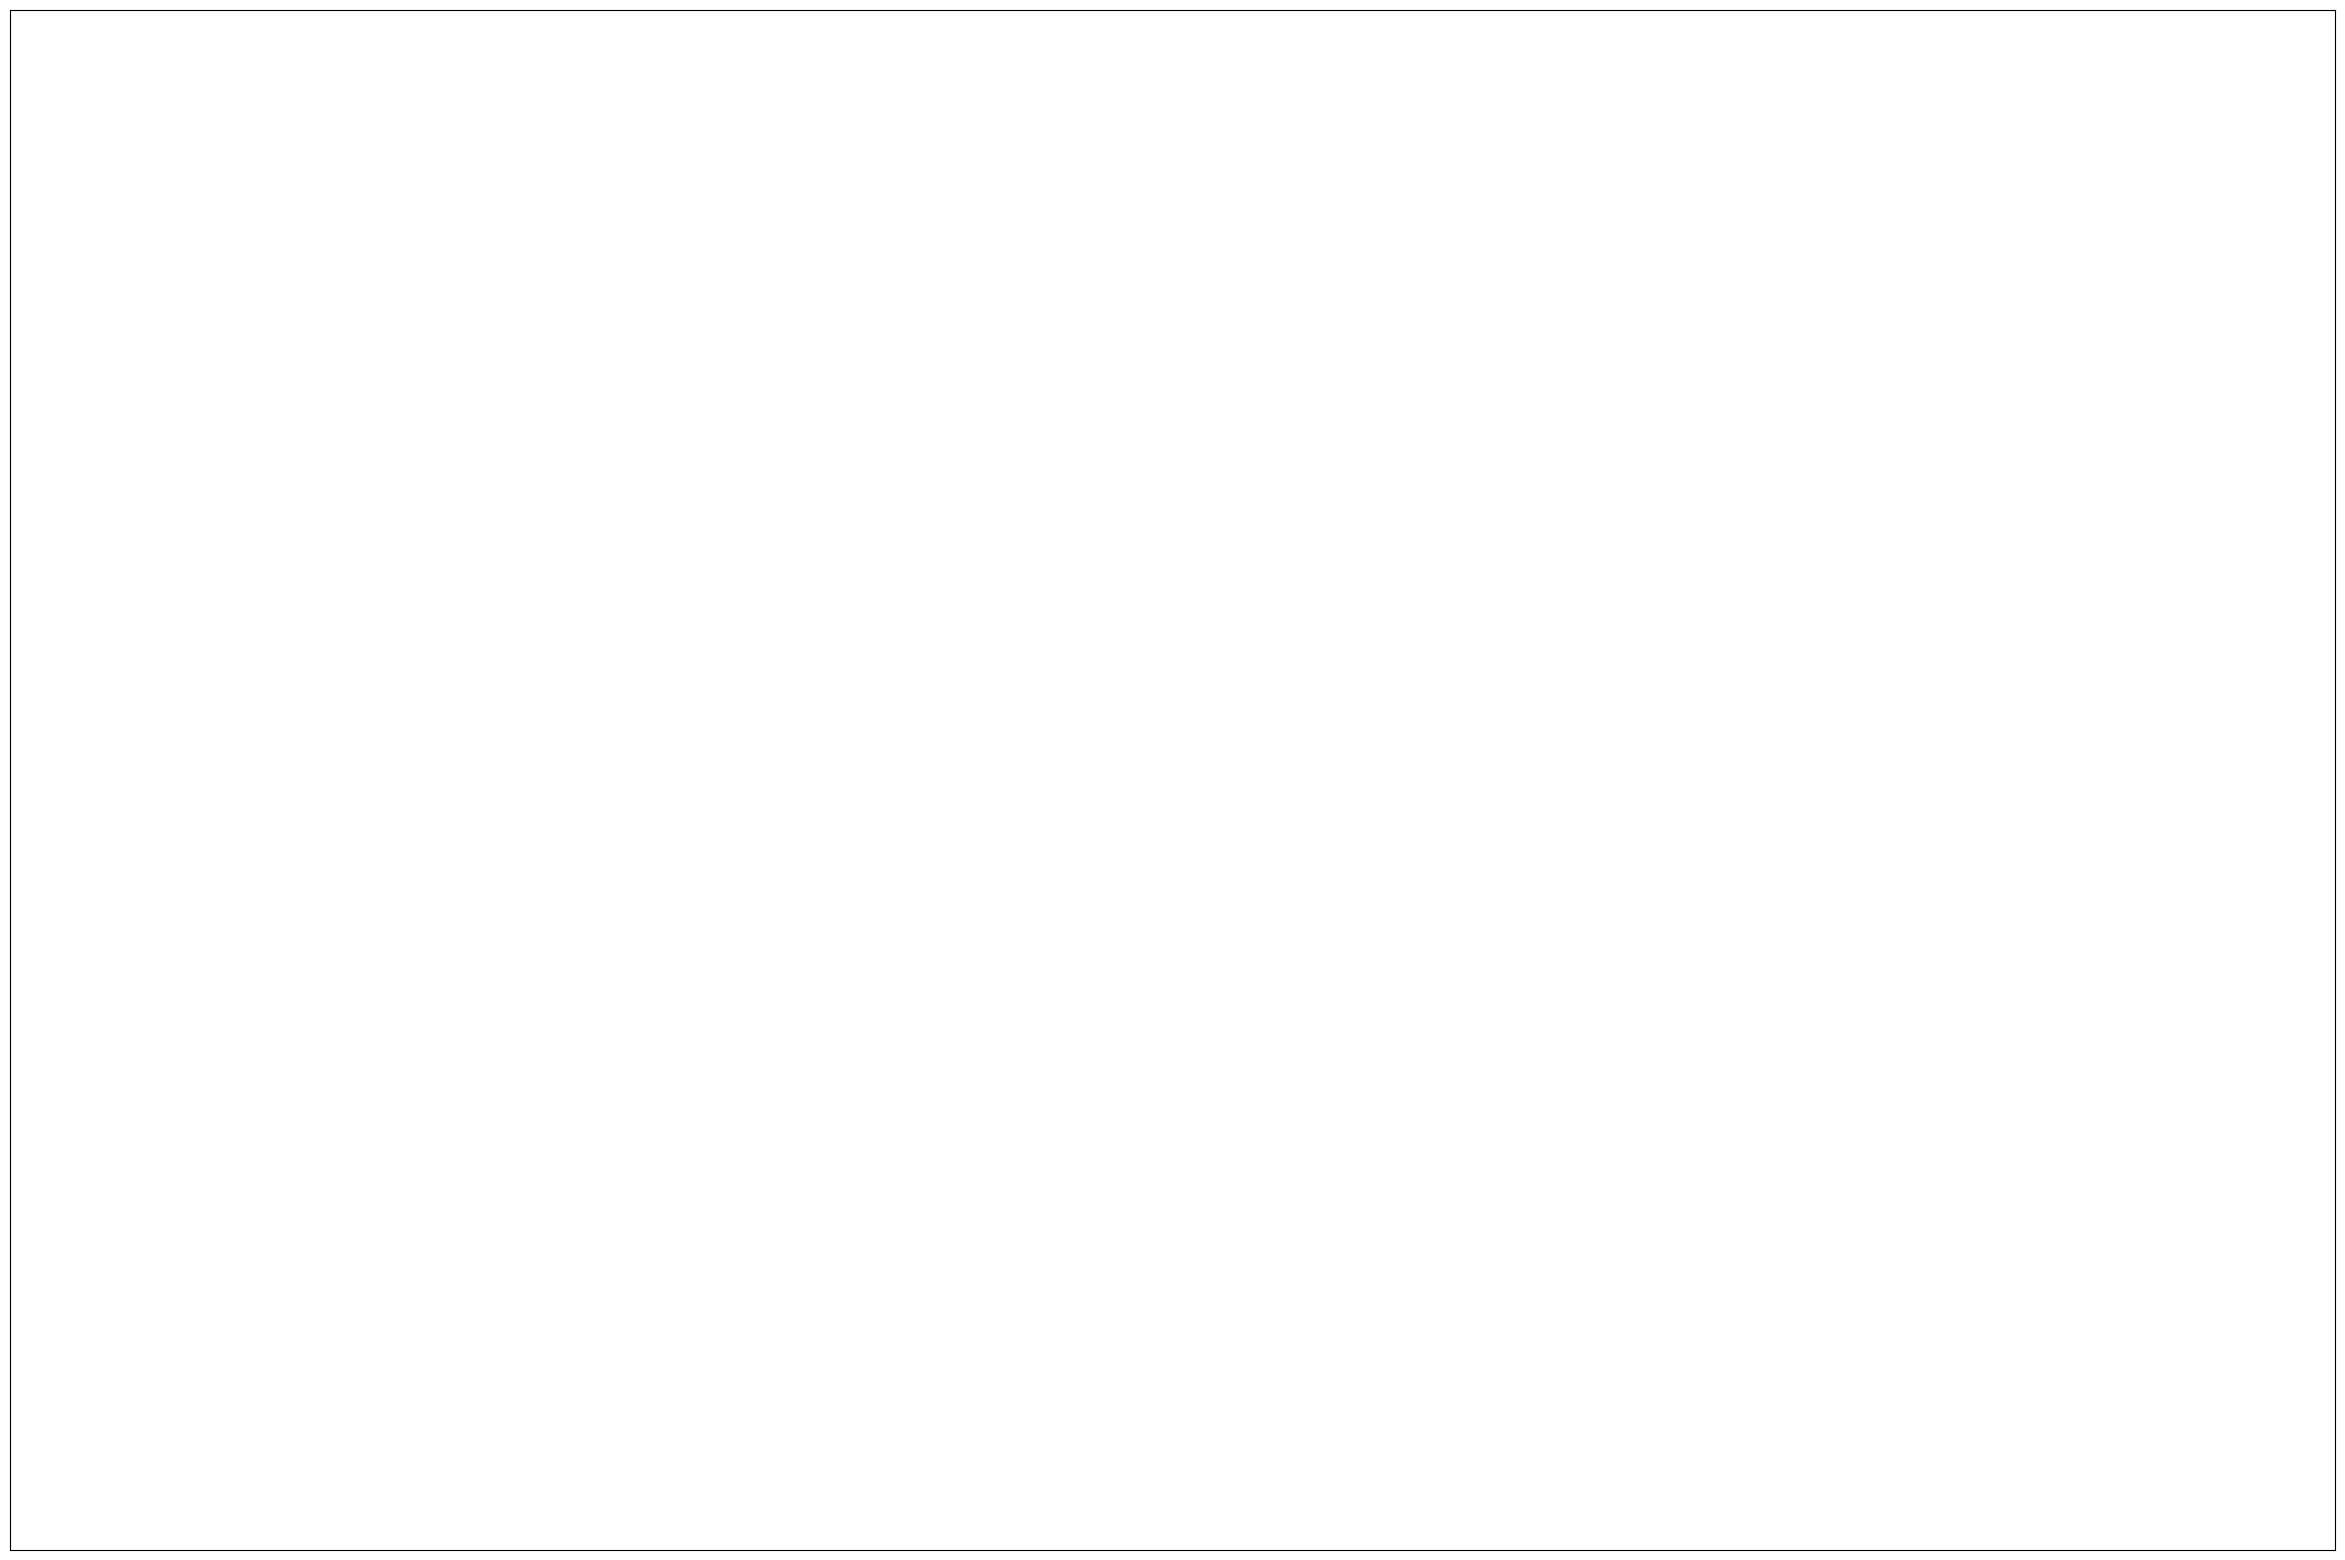

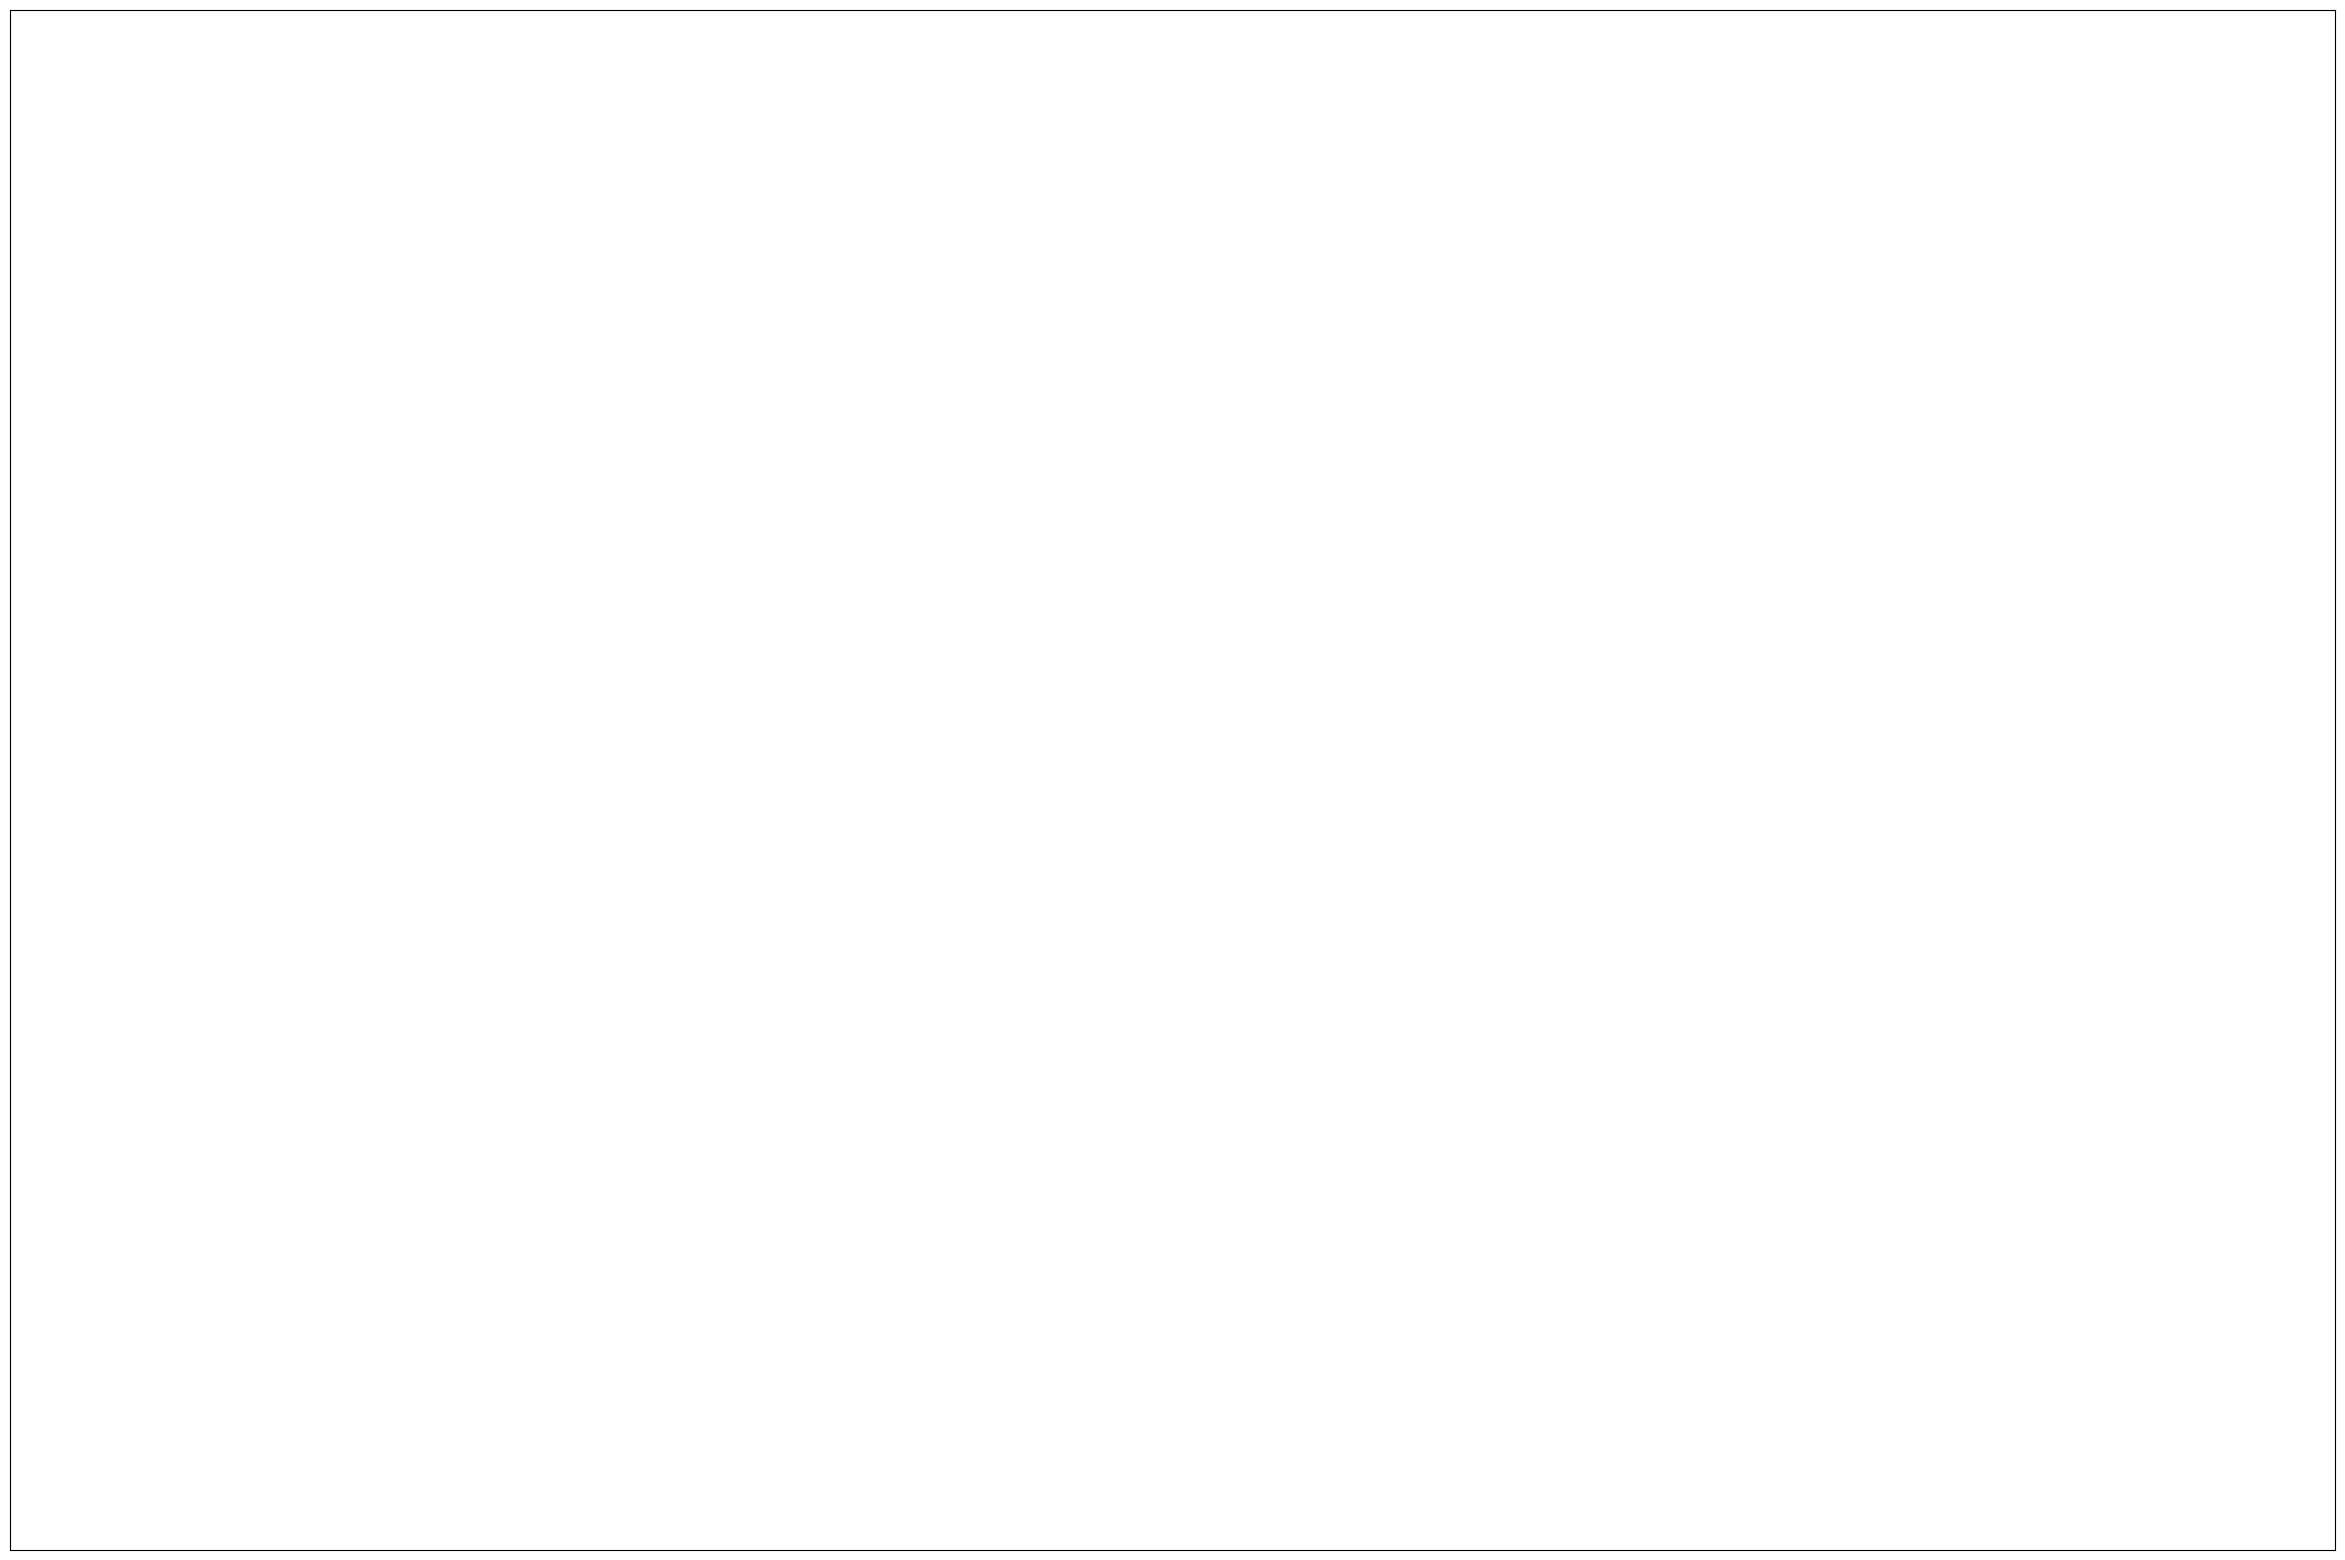

In [296]:
for entry in likeness_dict:
    g = G.subgraph(g_com_list[entry[0][0]])
    h = H.subgraph(h_com_list[entry[0][1]])

    #use real names as labels instead of urls
    g_labels = {node: get_Name(node,'CIAA') for node in g.nodes()}
    h_labels = {node: get_Name(node,'DCFS') for node in h.nodes()}
    nx.set_node_attributes(g, g_labels, 'label')
    nx.set_node_attributes(h, h_labels, 'label')

    # compute node weights
    weight = {node: ciaa_authors.count(node) for node in g.nodes()}
    nx.set_node_attributes(g, weight, 'weight')
    g_node_sizes = [100 * g.nodes[node]['weight'] for node in g.nodes()]   
    weight = {node: dcfs_authors.count(node) for node in h.nodes()}
    nx.set_node_attributes(h, weight, 'weight')
    h_node_sizes = [100 * h.nodes[node]['weight'] for node in h.nodes()]

    #create color map
    g_color_map = []
    for node in g.nodes():
        if node in h.nodes():
            g_color_map.append('red')
        elif node in H.nodes():
            g_color_map.append('orange')
        else: g_color_map.append('gray')
    h_color_map = []
    for node in h.nodes():
        if node in g.nodes():
            h_color_map.append('red')
        elif node in G.nodes():
            h_color_map.append('orange')
        else: h_color_map.append('gray')

    #print graphs
    g_pos = nx.spring_layout(g)
    h_pos = nx.spring_layout(h)
    plt.figure(figsize=(30,20))
    print('g: ',str(entry[0][0]))
    print('h: ',str(entry[0][1]))
    print('CIAA')
    nx.draw_networkx(g,g_pos,labels=g_labels,node_size=g_node_sizes,node_color=g_color_map,with_labels=True, font_size=25)
    #plt.show()
    plt.savefig('../../Figures/gamma_'+str(entry[0][0])+'.png')
    plt.figure(figsize=(30,20))
    print('DCFS')
    nx.draw_networkx(h,h_pos,labels=h_labels,node_size=h_node_sizes,node_color=h_color_map,with_labels=True, font_size=25)
    #plt.show()
    plt.savefig('../../Figures/eta_'+str(entry[0][1])+'.png', bbox_inches='tight')

# Network Portraits

### CIAA

In [297]:
plt.rcParams['font.family'] = 'serif'
plt.rc('font', size=15)
# Find the giant component
components = nx.connected_components(G)
giant_component = max(components, key=len)
print(len(giant_component))

# Calculate the diameter of the giant component
diameter_G = nx.diameter(G.subgraph(giant_component))

print(diameter_G, len(G.nodes()))

B = []
for l in range(diameter_G):
    b = []
    L = [len(nx.descendants_at_distance(G,node,l)) for node in G.nodes()]
    for k in range(len(giant_component)):
        b.append(L.count(k))
    B.append(b)
B_G = B
print(B_G)

192
22 839
[[0, 839, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [85, 201, 218, 151, 73, 38, 29, 16, 7, 7, 3, 4, 1, 3, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [298]:
component = False
if component:
    components = nx.connected_components(G)
    giant_component = max(components, key=len)
    G = G.subgraph(giant_component)
    diameter_G = nx.diameter(G)
    B = []
    for l in range(diameter_G):
        b = []
        L = [len(nx.descendants_at_distance(G,node,l)) for node in G.nodes()]
        for k in range(len(giant_component)):
            b.append(L.count(k))
        B.append(b)
    B_G = B

In [299]:
def delete_zero_columns(matrix):
    # Get the dimensions of the matrix
    num_rows = len(matrix)
    num_cols = len(matrix[0])

    # Create a list to store the indices of the columns to be deleted
    columns_to_delete = []

    # Iterate over each column
    for col in range(num_cols):
        # Assume the column has only 0 entries
        only_zeros = True

        # Check each element in the column
        for row in range(num_rows):
            if matrix[row][col] != 0:
                # If any element is non-zero, mark the column as not to be deleted
                only_zeros = False
                break

        # If the column has only 0 entries, add its index to the list
        if only_zeros:
            columns_to_delete.append(col)

    # Iterate over the list of column indices in reverse order
    for col in reversed(columns_to_delete):
        # Delete the column from each row
        for row in range(num_rows):
            del matrix[row][col]

    # Return the updated matrix
    return matrix


def print_matrix(matrix):
    header = "     " + " ".join(str(j) for j in range(len(matrix[0])))
    print(header)
    for i, row in enumerate(matrix):
        row_str = "{:5} ".format(i) + " ".join("{:5}".format(element) for element in row)
        print(row_str)

B = delete_zero_columns(B)
#B_G = B
print_matrix(B)

     0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
    0     0   839     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
    1    85   201   218   151    73    38    29    16     7     7     3     4     1     3     1     0     1     0     0     0     0     0     1     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
    2   370    51    54    54    38    43    29    32    33    15    23     6    17    13     9     1     9     7     7     9     5     8     1     1     0     0     3     0     1     0     0     0     0     0     0     0     0     0
    3   506    29    17    17    17    14    12    23    35    19    22    15    16    10    15     1     7     5     9     8     7     4     4     1     2     8     6     5     1     0    

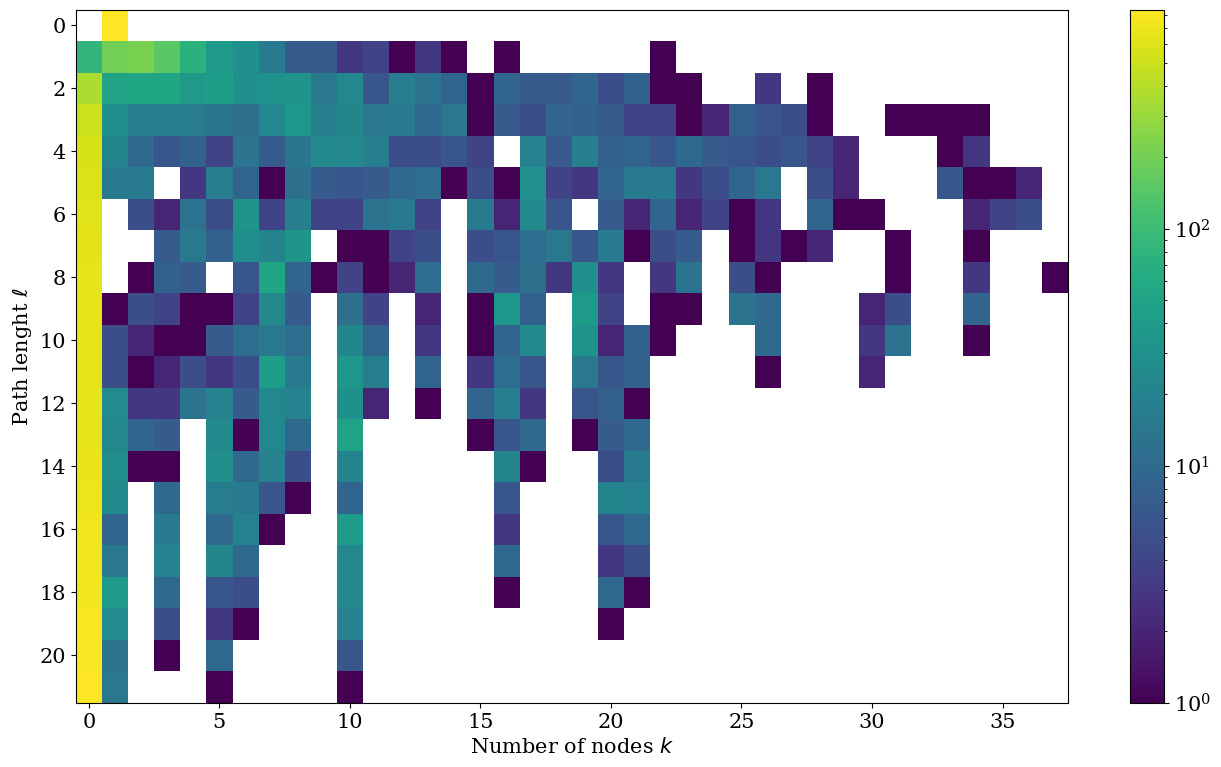

In [300]:
import numpy as np
from matplotlib.colors import LogNorm
plt.figure(figsize=(16,9))
# Plot the heatmap
im = plt.imshow(B, cmap='viridis', interpolation='nearest', aspect='auto', norm=LogNorm())
plt.colorbar(im)  # Add colorbar for reference
#plt.axis((0,37,22,0))
plt.yticks(np.arange(0,diameter_G-1,2))
plt.ylabel(f'Path lenght $\ell$')
plt.xlabel(f'Number of nodes $k$')
if component:
    plt.savefig('../../Figures/portrait_ciaa_component_2021.png',bbox_inches='tight')
else: 
    plt.savefig('../../Figures/portrait_ciaa_2021.png',bbox_inches='tight')

### DCFS

In [301]:
# Find the giant component
components = nx.connected_components(H)
giant_component_H = max(components, key=len)
print(len(giant_component_H))

# Calculate the diameter of the giant component
diameter_H = nx.diameter(H.subgraph(giant_component_H))

print(diameter_H, len(H.nodes()))

B = []
for l in range(diameter_H):
    b = []
    L = [len(nx.descendants_at_distance(H,node,l)) for node in H.nodes()]
    for k in range(len(giant_component_H)):
        b.append(L.count(k))
    B.append(b)
B_H = B

209
13 419


In [302]:
if component:
    components = nx.connected_components(H)
    giant_component_H = max(components, key=len)
    H = H.subgraph(giant_component_H)
    diameter_H = nx.diameter(H)
    B = []
    for l in range(diameter_H):
        b = []
        L = [len(nx.descendants_at_distance(H,node,l)) for node in H.nodes()]
        for k in range(len(giant_component_H)):
            b.append(L.count(k))
        B.append(b)
    B_H = B

In [303]:
def delete_zero_columns(matrix):
    # Get the dimensions of the matrix
    num_rows = len(matrix)
    num_cols = len(matrix[0])

    # Create a list to store the indices of the columns to be deleted
    columns_to_delete = []

    # Iterate over each column
    for col in range(num_cols):
        # Assume the column has only 0 entries
        only_zeros = True

        # Check each element in the column
        for row in range(num_rows):
            if matrix[row][col] != 0:
                # If any element is non-zero, mark the column as not to be deleted
                only_zeros = False
                break

        # If the column has only 0 entries, add its index to the list
        if only_zeros:
            columns_to_delete.append(col)

    # Iterate over the list of column indices in reverse order
    for col in reversed(columns_to_delete):
        # Delete the column from each row
        for row in range(num_rows):
            del matrix[row][col]

    # Return the updated matrix
    return matrix


def print_matrix(matrix):
    header = "     " + " ".join(str(j) for j in range(len(matrix[0])))
    print(header)
    for i, row in enumerate(matrix):
        row_str = "{:5} ".format(i) + " ".join("{:5}".format(element) for element in row)
        print(row_str)

B = delete_zero_columns(B_H)
#B_H = B
print_matrix(B)

     0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
    0     0   419     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
    1    45   116    87    79    37    16     9     7     3     4     4     3     2     2     2     0     2     0     0     0     0     0     0     0     0     0     0     1     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0    

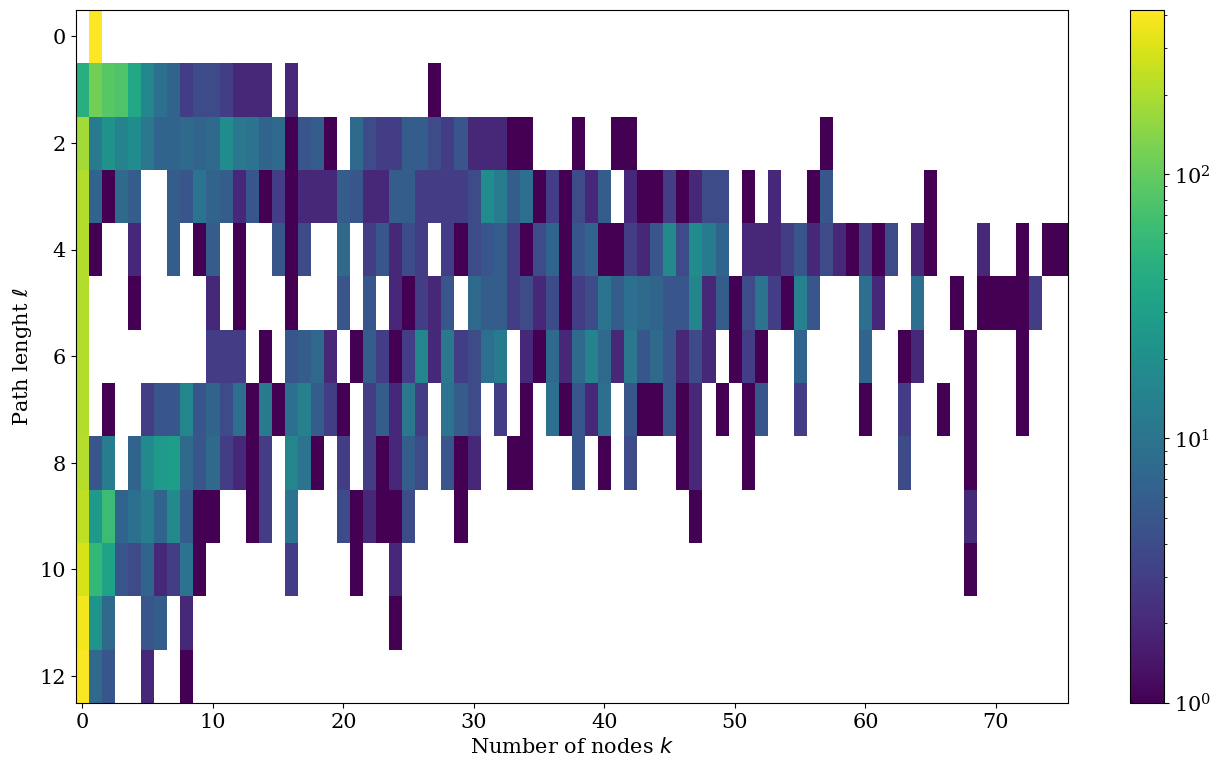

In [304]:
import numpy as np
plt.figure(figsize=(16,9))
# Plot the heatmap
im = plt.imshow(B, cmap='viridis', interpolation='nearest', aspect='auto', norm=LogNorm())
plt.colorbar(im)  # Add colorbar for reference
#plt.axis((0,37,22,0))
plt.yticks(np.arange(0,diameter_H,2))
plt.ylabel(f'Path lenght $\ell$')
plt.xlabel(f'Number of nodes $k$')
if component:
    plt.savefig('../../Figures/portrait_dcfs_component_2021.png',bbox_inches='tight')
else:
    plt.savefig('../../Figures/portrait_dcfs_2021.png',bbox_inches='tight')

### Compute distance

In [305]:
print(B_G)

[[0, 839, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [85, 201, 218, 151, 73, 38, 29, 16, 7, 7, 3, 4, 1, 3, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [370, 51, 54, 54, 38, 43, 29, 32, 33, 15, 23, 6, 17, 13, 9, 1, 9, 7, 7, 9, 5, 8, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [506, 29, 17, 17, 17, 14, 12, 23, 35, 19, 22, 15, 16, 10, 15, 1, 7, 5, 9, 8, 7, 4, 4, 1, 2, 8, 6, 5, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0], [557, 21, 10, 6, 8, 4, 13, 7, 14, 25, 23, 18, 5, 5, 6, 4, 0, 20, 7, 19, 8, 9, 6, 10, 7, 6, 5, 6, 4, 2, 0, 0, 0, 1, 3, 0, 0, 0], [590, 16, 16, 0, 3, 17, 9, 1, 12, 7, 6, 7, 10, 11, 1, 5, 1, 30, 4, 3, 9, 16, 16, 3, 5, 9, 15, 0, 5, 2, 0, 0, 0, 6, 1, 1, 2, 0], [619, 0, 5, 2, 13, 5, 33, 4, 18, 4, 4, 13, 16, 4, 0, 16, 2, 25, 6, 0, 7, 2, 9, 2, 4, 1, 3, 0, 9, 1, 1, 0, 0, 0, 2, 4, 5, 0], [636, 0, 0, 7, 15, 8, 27, 21, 33, 0, 1, 1, 4, 5, 0, 5, 6, 11, 15, 6, 16, 1, 5, 7, 0, 1, 3, 1, 2, 0, 0, 1, 0, 0,

In [306]:
C_G = []
print(len(giant_component))
x = max(len(giant_component),len(giant_component_H))
diameter = max(diameter_G,diameter_H)
for l in range(diameter):    
    if l < diameter_G:    
        c = []
        sum_b = 0
        for k in range(38):
            sum_b += B_G[l][k]
        for k in range(x):
            sum_a = 0
            if k < 38:
                for i in range(k+1):
                    sum_a += B_G[l][i]
            c.append(sum_a/sum_b)
        C_G.append(c)
    else:
        C_G.append(0 for k in range(x))
C_H = []
for l in range(diameter):    
    if l < diameter_H:
        c = []
        sum_b = 0
        for k in range(76):
            sum_b += B_H[l][k]
        for k in range(x):
            sum_a = 0
            if k < 76:    
                for i in range(k+1):
                    sum_a += B_H[l][i]
            c.append(sum_a/sum_b)
        C_H.append(c)
    else:
        C_H.append([0 for k in range(x)])

192


In [307]:
K = []
for l in range(diameter):
    temp = []
    for k in range(209):
        temp.append(abs(C_G[l][k] - C_H[l][k]))
    #print(temp)
    #print(max(temp))
    K.append(max(temp))
K

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

## Dynamic Comparing

In [308]:
ciaa_dynamic = [ciaa.loc[ciaa['Year']<=year] for year in range(1996,2023) if year != 2020]
dcfs_dynamic = [dcfs.loc[dcfs['Year']<=year] for year in range(2001,2023)]

### CIAA

In [309]:
plot = False
no_authors = []
year = 1996
ciaa_graphs = []
diameters = []
no_nodes = []
for conference in ciaa_dynamic:
    authors = conference['Author'].to_list()
    co_authors = conference['Co-Authors'].to_list()    
    G = nx.Graph()
    G.add_nodes_from(set(authors))

    for i in range(len(authors)):    
        entries = co_authors[i].replace('[','').replace(']','').replace('"','').replace("'",'') 
        if entries != '':
            entries = entries.split(', ')
            for entry in entries:
                G.add_edge(authors[i],entry)
    no_authors.append(G.number_of_nodes())

    ciaa_graphs.append(G)

    # Find the giant component
    components = nx.connected_components(G)
    giant_component = max(components, key=len)

    # Calculate the diameter of the giant component
    diameter_G = nx.diameter(G.subgraph(giant_component))
    diameters.append(diameter_G)

    no_nodes.append(len(giant_component))

    B = []
    for l in range(diameter_G):
        b = []
        L = [len(nx.descendants_at_distance(G,node,l)) for node in G.nodes()]
        for k in range(len(giant_component)):
            b.append(L.count(k))
        B.append(b)
    B = delete_zero_columns(B)
    if plot:    
        # Plot the heatmap
        plt.figure(figsize=(16,9))
        im = plt.imshow(B, cmap='viridis', interpolation='nearest', aspect='auto')
        plt.colorbar(im)  # Add colorbar for reference)
        plt.yticks(np.arange(0,diameter_G-1,2))
        plt.ylabel(f'Path lenght $l$')
        plt.xlabel(f'Number of nodes $k$')
        #plt.show()
        plt.savefig('../../Figures/portrait_ciaa'+str(year)+'.png')
    if year == 2019: year += 1
    year += 1
new_graphs = ciaa_graphs

In [310]:
max_d = max(diameters)
max_nodes = max(no_nodes)
year = 1996
B_ciaa = {}
for i in range(len(ciaa_graphs)):
    B_adv = []
    if year != 2020:
        for l in range(max_d):
            b = []
            if l < diameters[i]:
                L = [len(nx.descendants_at_distance(G,node,l)) for node in G.nodes()]
                for k in range(max_nodes):
                    if k < no_nodes[i]:
                        b.append(L.count(k))
                    else: b.append(0)
            else:
                for k in range(max_nodes):
                    b.append(0)
            B_adv.append(b)
        B_ciaa[year] = B_adv
    year += 1
B_new = B_ciaa


In [311]:
B_ciaa.keys()

dict_keys([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021])

In [312]:
C = {}
for key in B_ciaa.keys():    
    B_G = B_ciaa[key]
    for next in B_ciaa.keys():
        B_H = B_ciaa[next]
        C_G = []
        for l in range(max_d):        
            c = []
            sum_b = 0
            for k in range(max_nodes):
                sum_b += B_G[l][k]
            for k in range(max_nodes):
                sum_a = 0
                for i in range(k+1):
                    sum_a += B_G[l][i]
                if sum_a != 0:
                    c.append(sum_a/sum_b)
                else:
                    c.append(0)
            C_G.append(c)
        C_H = []
        for l in range(max_d):    
            c = []
            sum_b = 0
            for k in range(max_nodes):
                sum_b += B_H[l][k]
            for k in range(max_nodes):
                sum_a = 0   
                for i in range(k+1):
                    sum_a += B_H[l][i]
                if sum_a != 0:  
                    c.append(sum_a/sum_b)
                else: c.append(0)
            C_H.append(c)
        C[(key,next)] = (C_G,C_H)

In [313]:
K = {}
for key in C.keys():
    kol = []
    C_G = C[key][0]
    C_H = C[key][1]
    for l in range(max_d):
        temp = []
        for k in range(max_nodes):
            temp.append(abs(C_G[l][k] - C_H[l][k]))
        kol.append(max(temp))
    K[key] = kol
K.items()

dict_items([((1996, 1996), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 1997), [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 1998), [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 1999), [0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 2000), [0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 2001), [0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 2002), [0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 2003), [0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 2004), [0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 2005), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((1996, 2006), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((

In [314]:
Alpha = {}
for key in C.keys():
    alpha = []
    B_G = B_ciaa[key[0]]
    B_H = B_ciaa[key[1]]
    for l in range(max_d):
        s_1 = 0
        s_2 = 0
        for k in range(max_d):
            s_1 += B_G[l][k]
            s_2 += B_H[l][k]
        alpha.append(s_1+s_2)
    Alpha[key] = alpha

In [315]:
Delta = {}
for key in K.keys():
    s = 0
    t = 0
    for l in range(max_d):
        s += Alpha[key][l] * K[key][l]
        t += Alpha[key][l]
    Delta[key] = s/t
Delta

{(1996, 1996): 0.0,
 (1996, 1997): 0.3258336681398152,
 (1996, 1998): 0.3258336681398152,
 (1996, 1999): 0.5850642927794263,
 (1996, 2000): 0.5876136642909806,
 (1996, 2001): 0.5876136642909806,
 (1996, 2002): 0.5895303326810176,
 (1996, 2003): 0.5907317073170731,
 (1996, 2004): 0.6607359482410028,
 (1996, 2005): 0.7066433566433566,
 (1996, 2006): 0.7066433566433566,
 (1996, 2007): 0.6607359482410028,
 (1996, 2008): 0.7066433566433566,
 (1996, 2009): 0.7712649945474372,
 (1996, 2010): 0.7940598919980363,
 (1996, 2011): 0.7940598919980363,
 (1996, 2012): 0.7940598919980363,
 (1996, 2013): 0.841593505144907,
 (1996, 2014): 0.841593505144907,
 (1996, 2015): 0.841593505144907,
 (1996, 2016): 0.8632548284573385,
 (1996, 2017): 0.8632548284573385,
 (1996, 2018): 0.8632548284573385,
 (1996, 2019): 0.9116051203708582,
 (1996, 2021): 0.9116051203708582,
 (1997, 1996): 0.3258336681398152,
 (1997, 1997): 0.0,
 (1997, 1998): 0.0,
 (1997, 1999): 0.32528370594119416,
 (1997, 2000): 0.328932859353271

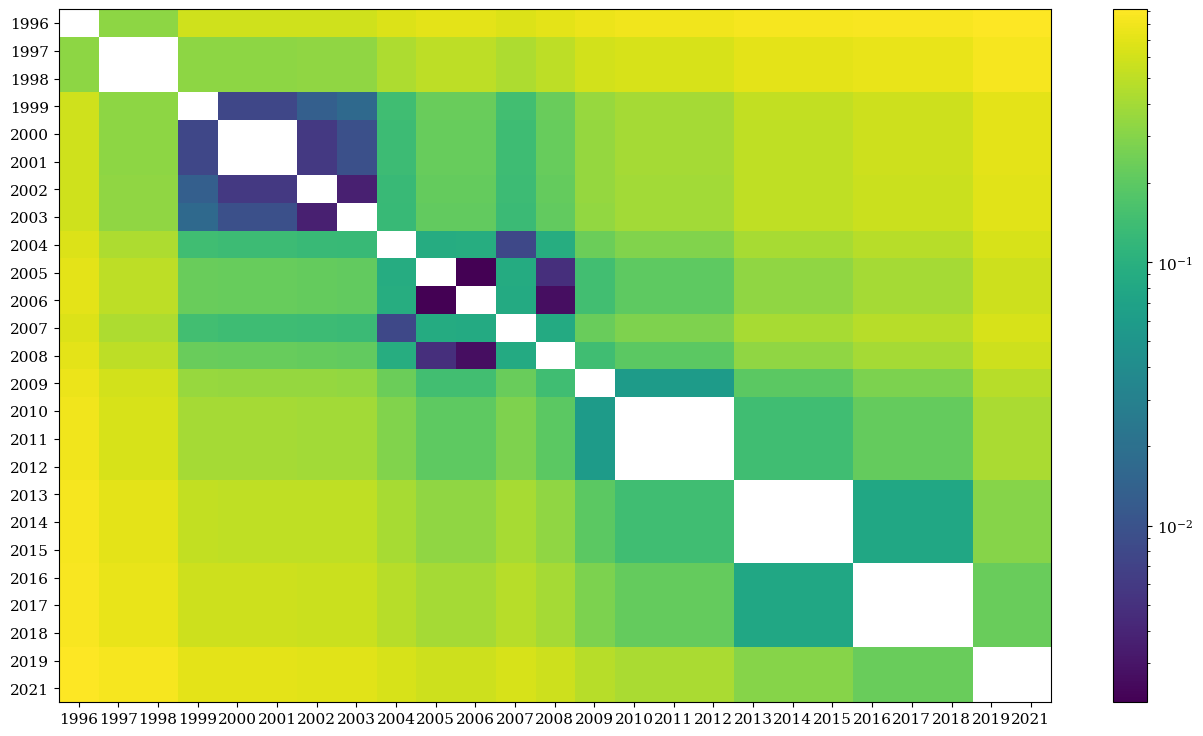

In [316]:
plt.rc('font', size=11)
years = [i for i in range(1996,2022) if i != 2020]
matrix = []
for year in years:
    m = []
    for next_year in years:
        m.append(Delta[(year,next_year)])
    matrix.append(m)

plt.figure(figsize=(16,9))
im = plt.imshow(matrix, cmap='viridis', interpolation='nearest', aspect='auto', norm=LogNorm())
plt.colorbar(im)  # Add colorbar for reference)
plt.xticks(np.arange(0,25,1),years)
plt.yticks(np.arange(0,25,1),years)
plt.grid(False)
plt.savefig('../../Figures/portrait_ciaa_dynamic.png',bbox_inches='tight')

### DCFS

In [317]:
no_authors = []
year = 2001
ciaa_graphs = []
diameters = []
no_nodes = []
for conference in dcfs_dynamic:
    authors = conference['Author'].to_list()
    co_authors = conference['Co-Authors'].to_list()    
    G = nx.Graph()
    G.add_nodes_from(set(authors))

    for i in range(len(authors)):    
        entries = co_authors[i].replace('[','').replace(']','').replace('"','').replace("'",'') 
        if entries != '':
            entries = entries.split(', ')
            for entry in entries:
                G.add_edge(authors[i],entry)
    no_authors.append(G.number_of_nodes())

    ciaa_graphs.append(G)

    # Find the giant component
    components = nx.connected_components(G)
    giant_component = max(components, key=len)

    # Calculate the diameter of the giant component
    diameter_G = nx.diameter(G.subgraph(giant_component))
    diameters.append(diameter_G)

    no_nodes.append(len(giant_component))

    B = []
    for l in range(diameter_G):
        b = []
        L = [len(nx.descendants_at_distance(G,node,l)) for node in G.nodes()]
        for k in range(len(giant_component)):
            b.append(L.count(k))
        B.append(b)
    B = delete_zero_columns(B)
    if plot:
        # Plot the heatmap
        plt.figure(figsize=(16,9))
        im = plt.imshow(B, cmap='viridis', interpolation='nearest', aspect='auto')
        plt.colorbar(im)  # Add colorbar for reference)
        plt.yticks(np.arange(0,diameter_G-1,2))
        plt.ylabel(f'Path lenght $l$')
        plt.xlabel(f'Number of nodes $k$')
        #plt.show()
        plt.savefig('../../Figures/portrait_dcfs'+str(year)+'.png')
    year += 1

In [318]:
max_d = max(diameters)
max_nodes = max(no_nodes)
year = 2001
B_ciaa = {}
for i in range(len(ciaa_graphs)):
    B_adv = []
    if year != 2020 or True:
        for l in range(max_d):
            b = []
            if l < diameters[i]:
                L = [len(nx.descendants_at_distance(G,node,l)) for node in G.nodes()]
                for k in range(max_nodes):
                    if k < no_nodes[i]:
                        b.append(L.count(k))
                    else: b.append(0)
            else:
                for k in range(max_nodes):
                    b.append(0)
            B_adv.append(b)
        B_ciaa[year] = B_adv
    year += 1
B_dcfs = B_ciaa


In [319]:
C = {}
for key in B_ciaa.keys():    
    B_G = B_ciaa[key]
    for next in B_ciaa.keys():
        B_H = B_ciaa[next]
        C_G = []
        for l in range(max_d):        
            c = []
            sum_b = 0
            for k in range(max_nodes):
                sum_b += B_G[l][k]
            for k in range(max_nodes):
                sum_a = 0
                for i in range(k+1):
                    sum_a += B_G[l][i]
                if sum_a != 0:
                    c.append(sum_a/sum_b)
                else:
                    c.append(0)
            C_G.append(c)
        C_H = []
        for l in range(max_d):    
            c = []
            sum_b = 0
            for k in range(max_nodes):
                sum_b += B_H[l][k]
            for k in range(max_nodes):
                sum_a = 0   
                for i in range(k+1):
                    sum_a += B_H[l][i]
                if sum_a != 0:  
                    c.append(sum_a/sum_b)
                else: c.append(0)
            C_H.append(c)
        C[(key,next)] = (C_G,C_H)

In [320]:
K = {}
for key in C.keys():
    kol = []
    C_G = C[key][0]
    C_H = C[key][1]
    for l in range(max_d):
        temp = []
        for k in range(max_nodes):
            temp.append(abs(C_G[l][k] - C_H[l][k]))
        kol.append(max(temp))
    K[key] = kol
K.items()

dict_items([((2001, 2001), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((2001, 2002), [0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((2001, 2003), [0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((2001, 2004), [0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ((2001, 2005), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0]), ((2001, 2006), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0]), ((2001, 2007), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0]), ((2001, 2008), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0]), ((2001, 2009), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0]), ((2001, 2010), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0]), ((2001, 2011), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), ((2001, 2012), [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [321]:
Alpha = {}
for key in C.keys():
    alpha = []
    B_G = B_ciaa[key[0]]
    B_H = B_ciaa[key[1]]
    for l in range(max_d):
        s_1 = 0
        s_2 = 0
        for k in range(max_d):
            s_1 += B_G[l][k]
            s_2 += B_H[l][k]
        alpha.append(s_1+s_2)
    Alpha[key] = alpha

In [322]:
Delta = {}
for key in K.keys():
    s = 0
    t = 0
    for l in range(max_d):
        s += Alpha[key][l] * K[key][l]
        t += Alpha[key][l]
    Delta[key] = s/t
Delta

{(2001, 2001): 0.0,
 (2001, 2002): 0.4330175913396482,
 (2001, 2003): 0.4330175913396482,
 (2001, 2004): 0.5144843568945539,
 (2001, 2005): 0.7036775106082037,
 (2001, 2006): 0.809285389167046,
 (2001, 2007): 0.809285389167046,
 (2001, 2008): 0.8258882194057761,
 (2001, 2009): 0.8398318042813455,
 (2001, 2010): 0.8258882194057761,
 (2001, 2011): 0.8619439868204284,
 (2001, 2012): 0.8619439868204284,
 (2001, 2013): 0.8517076623606441,
 (2001, 2014): 0.8517076623606441,
 (2001, 2015): 0.8619439868204284,
 (2001, 2016): 0.8398318042813455,
 (2001, 2017): 0.8398318042813455,
 (2001, 2018): 0.8398318042813455,
 (2001, 2019): 0.8398318042813455,
 (2001, 2020): 0.8398318042813455,
 (2001, 2021): 0.8258882194057761,
 (2001, 2022): 0.8258882194057761,
 (2002, 2001): 0.4330175913396482,
 (2002, 2002): 0.0,
 (2002, 2003): 0.0,
 (2002, 2004): 0.1114151534994376,
 (2002, 2005): 0.4239960873368467,
 (2002, 2006): 0.6145055295321364,
 (2002, 2007): 0.6145055295321364,
 (2002, 2008): 0.644292931525507

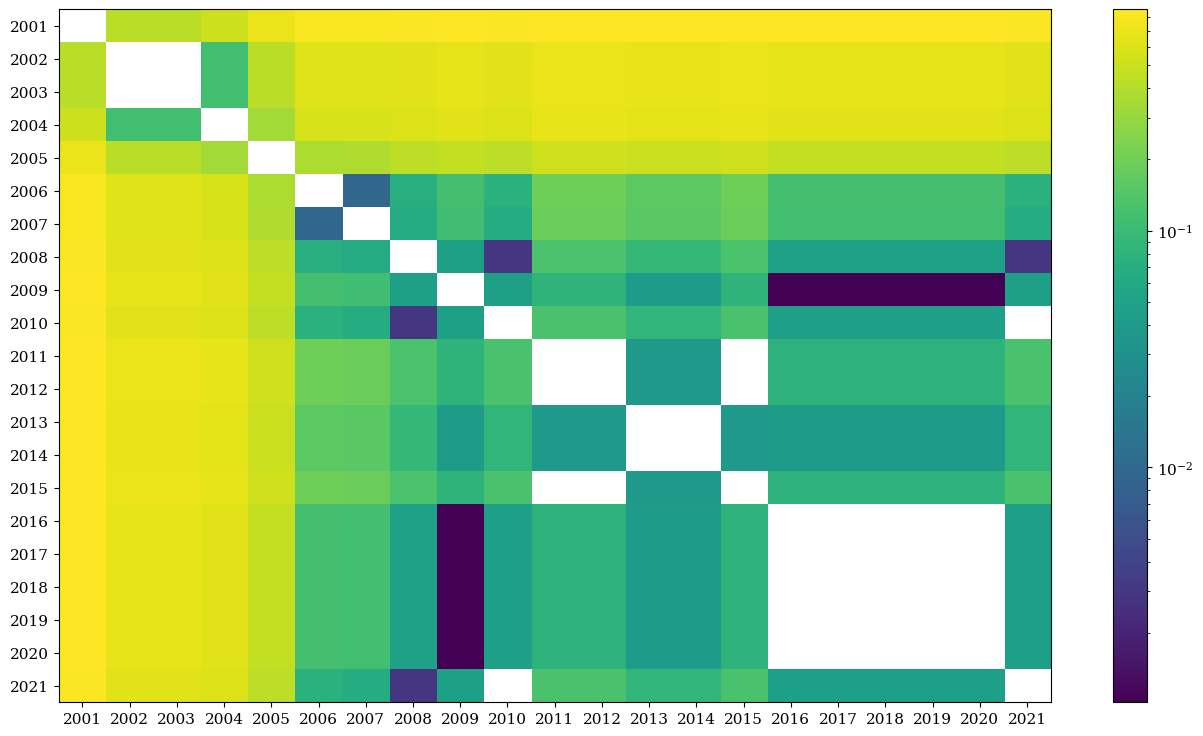

In [323]:
years = [i for i in range(2001,2022)]
matrix = []
for year in years:
    m = []
    for next_year in years:
        m.append(Delta[(year,next_year)])
    matrix.append(m)

plt.figure(figsize=(16,9))
im = plt.imshow(matrix, cmap='viridis', interpolation='nearest', aspect='auto', norm=LogNorm())
plt.colorbar(im)  # Add colorbar for reference)
plt.xticks(np.arange(0,21,1),years)
plt.yticks(np.arange(0,21,1),years)
plt.grid(False)
plt.savefig('../../Figures/portrait_dcfs_dynamic.png',bbox_inches='tight')


## IT approach

In [324]:
B_ciaa = B_new
B_dcfs = B_dcfs
dcfs_graphs = ciaa_graphs
ciaa_graphs = new_graphs
G = ciaa_graphs[-1]
H = dcfs_graphs[-1]

# Find the giant component
components = nx.connected_components(G)
giant_component = max(components, key=len)
d_c = nx.diameter(G.subgraph(giant_component))
components = nx.connected_components(H)
giant_component = max(components, key=len)
d_d = nx.diameter(H.subgraph(giant_component))

d_max = max(d_c,d_d)
N_max = max(G.number_of_nodes(), H.number_of_nodes())

In [325]:
compare_components = False
if compare_components:
    I = G.subgraph(max(nx.connected_components(G), key=len))
    J = H.subgraph(max(nx.connected_components(H), key=len))
else:
    I = G
    J = H
d_max = max(nx.diameter(G.subgraph(max(nx.connected_components(G), key=len))),nx.diameter(H.subgraph(max(nx.connected_components(H), key=len))))
N_max = max(I.number_of_nodes(), J.number_of_nodes())

In [326]:
# Find the giant component
components = nx.connected_components(I)
giant_component = max(components, key=len)
print(len(giant_component))

B = []
for l in range(d_max):
    if l < d_c:
        b = []
        L = [len(nx.descendants_at_distance(I,node,l)) for node in I.nodes()]
        for k in range(N_max):
            if k < len(I.nodes()):
                b.append(L.count(k))
            else: b.append(0)
    else: b = [0 for i in range(N_max)]
    B.append(b)
B_G = B
print(B_G)

192
[[0, 839, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [327]:
# Find the giant component
components = nx.connected_components(J)
giant_component_H = max(components, key=len)
print(len(giant_component_H))

B = []
for l in range(d_max):
    if l < d_d:
        b = []
        L = [len(nx.descendants_at_distance(J,node,l)) for node in J.nodes()]
        for k in range(N_max):
            if k < (len(J.nodes())):
                b.append(L.count(k))
            else: b.append(0)
    else: b = [0 for i in range(N_max)]
    B.append(b)
B_H = B

209


In [328]:
import math

N_G = I.number_of_nodes()
N_H = J.number_of_nodes()
N_max = max(N_G,N_H)

# Computes the probability distribution for a given B-Matrix with N nodes.
def Prob(B,N):
    res = []
    for l in range(d_max):
        row = []
        for k in range(N_max):
            row.append(k*B[l][k]/N**2)
        res.append(row)
    return res

# Computes the misture distribution
def M(P,Q):
    result = []
    for l in range(d_max):
        row = []
        for k in range(N_max):
            row.append(0.5*(P[l][k]+Q[l][k]))
        result.append(row)
    return result

# Computes the Kullback-Liebler divergence
def KL(P,Q):
    sum_a = 0
    for l in range(d_max):
        sum_b = 0
        for k in range(N_max):
            if P[l][k] != 0 and Q[l][k] != 0:
                sum_b += P[l][k]*math.log2(P[l][k]/Q[l][k])
            else: sum_b += 0
        sum_a += sum_b
    return sum_a

# Computes the Jensen-Shannon divergence
def Djs(P,Q):
    return 0.5*KL(P,M(P,Q))+0.5*KL(Q,M(P,Q))

In [329]:
P = Prob(B_G,N_G)
Q = Prob(B_H,N_H)

print(Djs(P,Q))

0.11438748741949434


In [330]:
B_G = []
no_nodes = []
for G in ciaa_graphs[:-1]:
    # Find the giant component
    components = nx.connected_components(G)
    giant_component = max(components, key=len)
    #print(len(giant_component))

    B = []
    for l in range(d_max):
        if l < d_c:
            b = []
            L = [len(nx.descendants_at_distance(G,node,l)) for node in G.nodes()]
            for k in range(N_max):
                if k < len(G.nodes()):
                    b.append(L.count(k))
                else: b.append(0)
        else: b = [0 for i in range(N_max)]
        B.append(b)
    B_G.append(B)
    no_nodes.append(G.number_of_nodes())

In [331]:
D_ciaa = []
for i in range(len(B_G)):
    row = []
    P = Prob(B_G[i],no_nodes[i])
    for j in range(len(B_G)):
        Q = Prob(B_G[j],no_nodes[j])
        row.append(Djs(P,Q))
    D_ciaa.append(row)

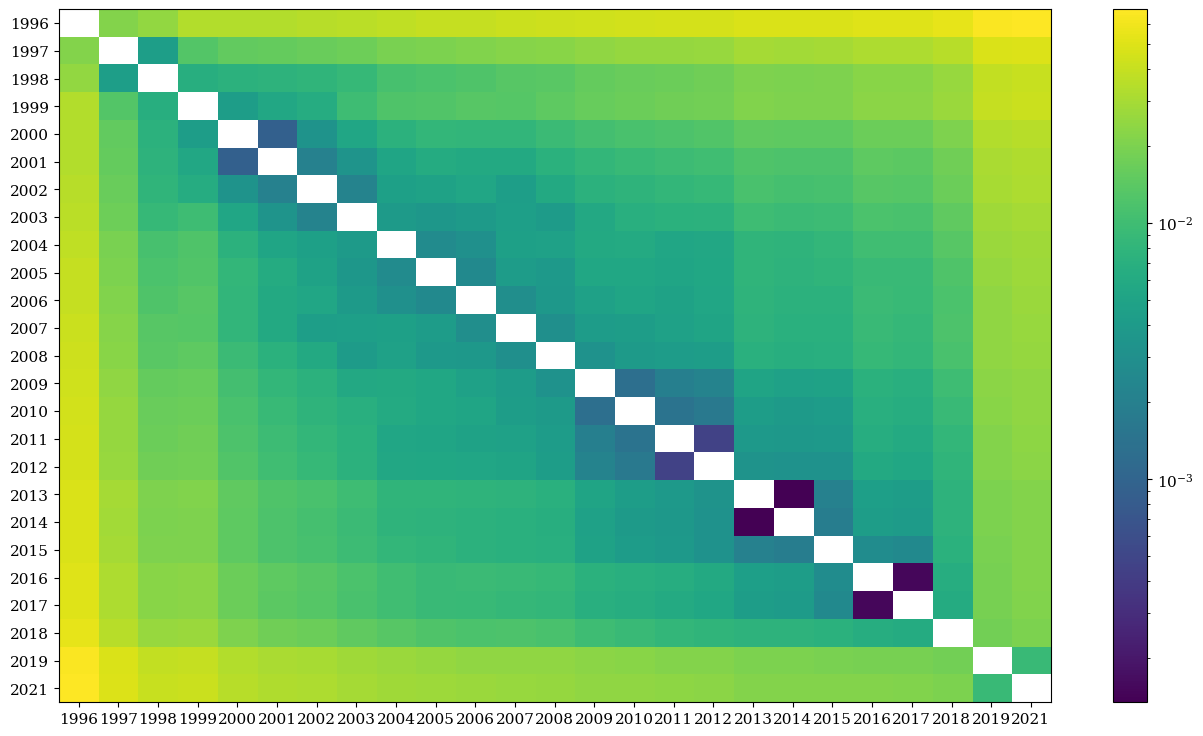

In [332]:
years = [year for year in range(1996,2022) if year != 2020]
plt.figure(figsize=(16,9))
im = plt.imshow(D_ciaa, cmap='viridis', interpolation='nearest', aspect='auto',norm=LogNorm())
plt.colorbar(im)  # Add colorbar for reference)
plt.xticks(np.arange(0,25,1),years)
plt.yticks(np.arange(0,25,1),years)
plt.grid(False)
plt.savefig('../../Figures/portrait_ciaa_dynamic_divergence.png',bbox_inches='tight')

In [333]:
B_H = []
no_nodes = []
for H in dcfs_graphs[:-1]:
    # Find the giant component
    components = nx.connected_components(H)
    giant_component_H = max(components, key=len)
    #print(len(giant_component_H))

    B = []
    for l in range(d_max):
        if l < d_d:
            b = []
            L = [len(nx.descendants_at_distance(H,node,l)) for node in H.nodes()]
            for k in range(N_max):
                if k < (len(H.nodes())):
                    b.append(L.count(k))
                else: b.append(0)
        else: b = [0 for i in range(N_max)]
        B.append(b)
    B_H.append(B)
    no_nodes.append(H.number_of_nodes())

In [334]:
D_dcfs = []
for i in range(len(B_H)):
    row = []
    P = Prob(B_H[i],no_nodes[i])
    for j in range(len(B_H)):
        Q = Prob(B_H[j],no_nodes[j])
        row.append(Djs(P,Q))
    D_dcfs.append(row)

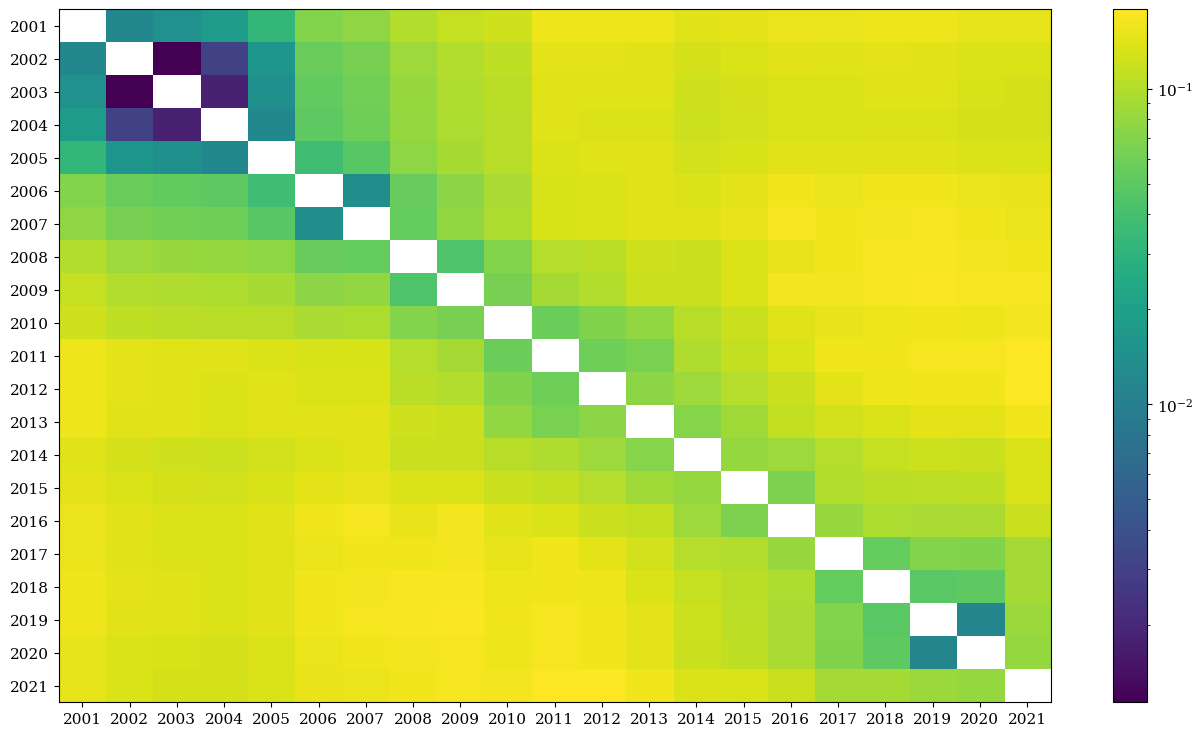

In [335]:
years = [year for year in range(2001,2022)]
plt.figure(figsize=(16,9))
im = plt.imshow(D_dcfs, cmap='viridis', interpolation='nearest', aspect='auto',norm=LogNorm())
plt.colorbar(im)  # Add colorbar for reference)
plt.xticks(np.arange(0,21,1),years)
plt.yticks(np.arange(0,21,1),years)
plt.grid(False)
plt.savefig('../../Figures/portrait_dcfs_dynamic_divergence.png',bbox_inches='tight')